In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd

In [3]:
pd.set_option('display.max_columns', None)

In [ ]:
main_dataset = pd.read_csv('/content/drive/MyDrive/Final project/main_dataset.csv', parse_dates = ['Date'])

In [ ]:
news_dataset = pd.read_csv('/content/drive/MyDrive/Final project/news_dataset.csv', parse_dates = ['date'])

In [ ]:
news_dataset.rename(columns = {'date':'Date'}, inplace = True)

In [ ]:
main_dataset.head()

Date    Oil   Gold $  Silver $  Platinum $  Palladium $  Euro_USD  \
0 2010-06-14  75.11  1223.75     18.43      1556.0        457.0    1.2249   
1 2010-06-15  75.29  1225.00     18.42      1558.0        460.0    1.2258   
2 2010-06-16  76.12  1234.50     18.51      1568.0        471.0    1.2277   
3 2010-06-17  77.52  1245.00     18.50      1577.0        482.0    1.2363   
4 2010-06-18  77.05  1256.00     18.77      1578.0        484.0    1.2372   

   TIPS        VIX Inflation_index  BTC  BTC Volume  BNB  LTC  XMR  ETH  \
0   NaN  28.580000            1.82  NaN         NaN  NaN  NaN  NaN  NaN   
1   NaN  25.870001            1.83  NaN         NaN  NaN  NaN  NaN  NaN   
2   NaN  25.920000            1.79  NaN         NaN  NaN  NaN  NaN  NaN   
3   NaN  25.049999            1.73  NaN         NaN  NaN  NaN  NaN  NaN   
4   NaN  23.950001            1.76  NaN         NaN  NaN  NaN  NaN  NaN   

     SP500  
0  1089.63  
1  1115.23  
2  1114.61  
3  1116.04  
4  1117.51

In [ ]:
main_dataset['Date']= main_dataset['Date'].dt.floor('d')
news_dataset['Date']= news_dataset['Date'].dt.floor('d')

# EDA of datasets

In [ ]:
main_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4878 entries, 0 to 4877
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             4878 non-null   datetime64[ns]
 1   Oil              3396 non-null   float64       
 2   Gold $           3418 non-null   float64       
 3   Silver $         3418 non-null   float64       
 4   Platinum $       3418 non-null   float64       
 5   Palladium $      3418 non-null   float64       
 6   Euro_USD         3371 non-null   float64       
 7   TIPS             1710 non-null   float64       
 8   VIX              3424 non-null   float64       
 9   Inflation_index  3424 non-null   object        
 10  BTC              4742 non-null   float64       
 11  BTC Volume       4742 non-null   float64       
 12  BNB              2160 non-null   float64       
 13  LTC              3717 non-null   float64       
 14  XMR              3325 non-null   float64

In [ ]:
main_dataset.describe(include='all').T

<ipython-input-10-c297c5aa38b5>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  main_dataset.describe(include='all').T


count unique                  top freq      first  \
Date               4878   4854  2012-07-03 00:00:00    2 2010-01-04   
Oil              3396.0    NaN                  NaN  NaN        NaT   
Gold $           3418.0    NaN                  NaN  NaN        NaT   
Silver $         3418.0    NaN                  NaN  NaN        NaT   
Platinum $       3418.0    NaN                  NaN  NaN        NaT   
Palladium $      3418.0    NaN                  NaN  NaN        NaT   
Euro_USD         3371.0    NaN                  NaN  NaN        NaT   
TIPS             1710.0    NaN                  NaN  NaN        NaT   
VIX              3424.0    NaN                  NaN  NaN        NaT   
Inflation_index    3424    270                    .  139        NaT   
BTC              4742.0    NaN                  NaN  NaN        NaT   
BTC Volume       4742.0    NaN                  NaN  NaN        NaT   
BNB              2160.0    NaN                  NaN  NaN        NaT   
LTC              3717.0    NaN                  NaN  NaN        NaT   
XMR              3325.0    NaN                  NaN  NaN        NaT   
ETH              1993.0    NaN                  NaN  NaN        NaT   
SP500            3305.0    NaN                  NaN  NaN        NaT   

                      last               mean                 std      min  \
Date            2023-06-16                NaN                 NaN      NaN   
Oil                    NaT          77.684984           26.509316     9.12   
Gold $                 NaT        1464.349013          259.313896   1049.4   
Silver $               NaT          21.467417            6.324564   12.005   
Platinum $             NaT        1180.008195          311.542609    593.0   
Palladium $            NaT          1156.5012           657.32185    395.0   
Euro_USD               NaT           1.198036            0.112191   0.9565   
TIPS                   NaT         101.122158            4.445223    94.25   
VIX                    NaT          18.603823            7.184068     9.14   
Inflation_index        NaT                NaN                 NaN      NaN   
BTC                    NaT        8057.835941        12685.420127     0.05   
BTC Volume             NaT  9920176423.299452  15601297932.004074      0.0   
BNB                    NaT         135.545417          159.458921     0.08   
LTC                    NaT          52.082432           54.674272     0.98   
XMR                    NaT          85.285242           81.257501     0.19   
ETH                    NaT         193.327356          192.771347     0.38   
SP500                  NaT        2495.403168          1003.61953  1022.58   

                       25%          50%             75%             max  
Date                   NaN          NaN             NaN             NaN  
Oil                   55.5        74.51        105.9925          133.18  
Gold $           1249.0125     1350.875          1713.5         2067.15  
Silver $             16.67       19.345        24.95375            48.7  
Platinum $           930.0       1039.5          1466.0          1887.0  
Palladium $          690.0        806.0         1627.25          3015.0  
Euro_USD            1.1115       1.1728          1.2993          1.4882  
TIPS                  98.0       99.405          104.65          111.52  
VIX                  13.62    16.809999           21.57       82.690002  
Inflation_index        NaN          NaN             NaN             NaN  
BTC               114.0825        829.7         9042.41        58305.04  
BTC Volume       100869.75  130903652.0  17591437828.25  288674641546.0  
BNB                  11.81       23.555        283.3875          568.92  
LTC                    3.6         41.1           79.05          317.53  
XMR                   3.93         66.1           142.5          397.34  
ETH                  11.44       163.73          264.78          998.99  
SP500              1689.37      2204.71         3096.63         4796.56

In [ ]:
news_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              5391 non-null   datetime64[ns]
 1   Polarity_avg      5391 non-null   float64       
 2   Subjectivity_avg  5391 non-null   float64       
 3   Class             5391 non-null   object        
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 168.6+ KB


In [ ]:
news_dataset.head()

Date  Polarity_avg  Subjectivity_avg     Class
0 2015-07-01        0.2500             0.833  positive
1 2015-07-02        0.6486             0.725  positive
2 2015-07-03        0.3818             0.698  positive
3 2015-07-04       -0.4404             0.868  negative
4 2015-07-05        0.0000             1.000   neutral

In [ ]:
news_dataset.describe(include='all').T

<ipython-input-13-da9ef64b99f9>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  news_dataset.describe(include='all').T


count unique                  top  freq      first  \
Date                5391   2834  2022-03-19 00:00:00     3 2015-07-01   
Polarity_avg      5391.0    NaN                  NaN   NaN        NaT   
Subjectivity_avg  5391.0    NaN                  NaN   NaN        NaT   
Class               5391      3             positive  2265        NaT   

                       last      mean       std     min       25%       50%  \
Date             2023-04-05       NaN       NaN     NaN       NaN       NaN   
Polarity_avg            NaT  0.101295  0.252071 -0.9135   -0.0127  0.134441   
Subjectivity_avg        NaT  0.853319  0.065275  0.3425  0.830759  0.866154   
Class                   NaT       NaN       NaN     NaN       NaN       NaN   

                       75%      max  
Date                   NaN      NaN  
Polarity_avg      0.225329  0.92445  
Subjectivity_avg   0.88609      1.0  
Class                  NaN      NaN

In [ ]:
display(main_dataset.shape, news_dataset.shape)

(4878, 17)

(5391, 4)

# Calculating the days in our 2 datasets

In [ ]:
start_date_main = main_dataset['Date'].min().date()
print(start_date_main)

2010-01-04


In [ ]:
end_date_main = main_dataset['Date'].max().date()
print(end_date_main)

2023-06-16


In [ ]:
total_days_main = end_date_main - start_date_main
print(total_days_main)

4911 days, 0:00:00


In [ ]:
start_date_news = news_dataset['Date'].min().date()
print(start_date_news)

2015-07-01


In [ ]:
end_date_news = news_dataset['Date'].max().date()
print(end_date_news)

2023-04-05


In [ ]:
total_days_news = end_date_news - start_date_news
print(total_days_news)

2835 days, 0:00:00


In [ ]:
main_dataset['Inflation_index'].value_counts()

.       139
0.94     65
0.96     52
0.92     48
0.91     45
       ... 
2.05      1
2.10      1
2.13      1
2.06      1
0.23      1
Name: Inflation_index, Length: 270, dtype: int64

In [ ]:
main_dataset['Inflation_index'] = main_dataset['Inflation_index'].replace('.', 0)

In [ ]:
main_dataset['Inflation_index'] = pd.to_numeric(main_dataset['Inflation_index'])

In [ ]:
main_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4878 entries, 0 to 4877
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             4878 non-null   datetime64[ns]
 1   Oil              3396 non-null   float64       
 2   Gold $           3418 non-null   float64       
 3   Silver $         3418 non-null   float64       
 4   Platinum $       3418 non-null   float64       
 5   Palladium $      3418 non-null   float64       
 6   Euro_USD         3371 non-null   float64       
 7   TIPS             1710 non-null   float64       
 8   VIX              3424 non-null   float64       
 9   Inflation_index  3424 non-null   float64       
 10  BTC              4742 non-null   float64       
 11  BTC Volume       4742 non-null   float64       
 12  BNB              2160 non-null   float64       
 13  LTC              3717 non-null   float64       
 14  XMR              3325 non-null   float64

In [ ]:
news_dataset['Date'].value_counts()

2022-03-19    3
2021-12-25    3
2022-01-10    3
2022-01-07    3
2022-01-06    3
             ..
2018-10-26    1
2018-10-24    1
2018-10-23    1
2018-10-21    1
2019-05-18    1
Name: Date, Length: 2834, dtype: int64

In [ ]:
subset_df = news_dataset[news_dataset['Date'] == '2022-03-19']
subset_df.head()

Date  Polarity_avg  Subjectivity_avg     Class
4253 2022-03-19      0.212208          0.889035  negative
4254 2022-03-19      0.212208          0.889035  positive
4255 2022-03-19      0.212208          0.889035   neutral

In [ ]:
news_dataset['Polarity_avg'].value_counts()

 0.00000    97
 0.20095    34
 0.15910    26
 0.22020    22
 0.17000    20
            ..
-0.54495     1
-0.26485     1
-0.48675     1
-0.75340     1
 0.53545     1
Name: Polarity_avg, Length: 2279, dtype: int64

In [ ]:
news_dataset['Subjectivity_avg'].value_counts()

1.0000    75
0.8680    17
0.9240    16
0.8790    15
0.8490    14
          ..
0.8980     1
0.6635     1
0.6655     1
0.5755     1
0.8330     1
Name: Subjectivity_avg, Length: 1506, dtype: int64

In [ ]:
filtered_df = news_dataset[(news_dataset['Polarity_avg'] < 0) & (news_dataset['Class'] == 'negative') |
                  (news_dataset['Polarity_avg'] > 0) & (news_dataset['Class'] == 'positive') |
                  (news_dataset['Polarity_avg'] == 0) & (news_dataset['Class'] == 'neutral')]

In [ ]:
filtered_df['Class'].value_counts()

positive    1895
negative     850
neutral       81
Name: Class, dtype: int64

In [ ]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2826 entries, 0 to 5390
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              2826 non-null   datetime64[ns]
 1   Polarity_avg      2826 non-null   float64       
 2   Subjectivity_avg  2826 non-null   float64       
 3   Class             2826 non-null   object        
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 110.4+ KB


In [ ]:
start_date_news_filtered = filtered_df['Date'].min().date()
print(start_date_news_filtered)

2015-07-01


In [ ]:
end_date_news_filtered = filtered_df['Date'].max().date()
print(end_date_news_filtered)

2023-04-05


In [ ]:
total_days_news_filtered = end_date_news_filtered - start_date_news_filtered
print(total_days_news_filtered)

2835 days, 0:00:00


In [ ]:
filtered_df.shape

(2826, 4)

# Merging datasets

In [ ]:
merged_dataset = main_dataset.merge(filtered_df, on = 'Date', how = 'outer')

In [ ]:
merged_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4878 entries, 0 to 4877
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              4878 non-null   datetime64[ns]
 1   Oil               3396 non-null   float64       
 2   Gold $            3418 non-null   float64       
 3   Silver $          3418 non-null   float64       
 4   Platinum $        3418 non-null   float64       
 5   Palladium $       3418 non-null   float64       
 6   Euro_USD          3371 non-null   float64       
 7   TIPS              1710 non-null   float64       
 8   VIX               3424 non-null   float64       
 9   Inflation_index   3424 non-null   float64       
 10  BTC               4742 non-null   float64       
 11  BTC Volume        4742 non-null   float64       
 12  BNB               2160 non-null   float64       
 13  LTC               3717 non-null   float64       
 14  XMR               3325 n

In [ ]:
merged_dataset.describe(include='all').T

<ipython-input-38-b074dd825609>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  merged_dataset.describe(include='all').T


count unique                  top  freq      first  \
Date                4878   4854  2012-07-03 00:00:00     2 2010-01-04   
Oil               3396.0    NaN                  NaN   NaN        NaT   
Gold $            3418.0    NaN                  NaN   NaN        NaT   
Silver $          3418.0    NaN                  NaN   NaN        NaT   
Platinum $        3418.0    NaN                  NaN   NaN        NaT   
Palladium $       3418.0    NaN                  NaN   NaN        NaT   
Euro_USD          3371.0    NaN                  NaN   NaN        NaT   
TIPS              1710.0    NaN                  NaN   NaN        NaT   
VIX               3424.0    NaN                  NaN   NaN        NaT   
Inflation_index   3424.0    NaN                  NaN   NaN        NaT   
BTC               4742.0    NaN                  NaN   NaN        NaT   
BTC Volume        4742.0    NaN                  NaN   NaN        NaT   
BNB               2160.0    NaN                  NaN   NaN        NaT   
LTC               3717.0    NaN                  NaN   NaN        NaT   
XMR               3325.0    NaN                  NaN   NaN        NaT   
ETH               1993.0    NaN                  NaN   NaN        NaT   
SP500             3305.0    NaN                  NaN   NaN        NaT   
Polarity_avg      2838.0    NaN                  NaN   NaN        NaT   
Subjectivity_avg  2838.0    NaN                  NaN   NaN        NaT   
Class               2838      3             positive  1903        NaT   

                       last               mean                 std      min  \
Date             2023-06-16                NaN                 NaN      NaN   
Oil                     NaT          77.684984           26.509316     9.12   
Gold $                  NaT        1464.349013          259.313896   1049.4   
Silver $                NaT          21.467417            6.324564   12.005   
Platinum $              NaT        1180.008195          311.542609    593.0   
Palladium $             NaT          1156.5012           657.32185    395.0   
Euro_USD                NaT           1.198036            0.112191   0.9565   
TIPS                    NaT         101.122158            4.445223    94.25   
VIX                     NaT          18.603823            7.184068     9.14   
Inflation_index         NaT           0.803531            0.598153    -0.59   
BTC                     NaT        8057.835941        12685.420127     0.05   
BTC Volume              NaT  9920176423.299452  15601297932.004074      0.0   
BNB                     NaT         135.545417          159.458921     0.08   
LTC                     NaT          52.082432           54.674272     0.98   
XMR                     NaT          85.285242           81.257501     0.19   
ETH                     NaT         193.327356          192.771347     0.38   
SP500                   NaT        2495.403168          1003.61953  1022.58   
Polarity_avg            NaT           0.102149            0.317634  -0.9135   
Subjectivity_avg        NaT           0.846049            0.073905   0.3425   
Class                   NaT                NaN                 NaN      NaN   

                        25%          50%             75%             max  
Date                    NaN          NaN             NaN             NaN  
Oil                    55.5        74.51        105.9925          133.18  
Gold $            1249.0125     1350.875          1713.5         2067.15  
Silver $              16.67       19.345        24.95375            48.7  
Platinum $            930.0       1039.5          1466.0          1887.0  
Palladium $           690.0        806.0         1627.25          3015.0  
Euro_USD             1.1115       1.1728          1.2993          1.4882  
TIPS                   98.0       99.405          104.65          111.52  
VIX                   13.62    16.809999           21.57       82.690002  
Inflation_index        0.46         0.89            1.19            2.25  


In [ ]:
merged_dataset.head()

Date    Oil   Gold $  Silver $  Platinum $  Palladium $  Euro_USD  \
0 2010-06-14  75.11  1223.75     18.43      1556.0        457.0    1.2249   
1 2010-06-15  75.29  1225.00     18.42      1558.0        460.0    1.2258   
2 2010-06-16  76.12  1234.50     18.51      1568.0        471.0    1.2277   
3 2010-06-17  77.52  1245.00     18.50      1577.0        482.0    1.2363   
4 2010-06-18  77.05  1256.00     18.77      1578.0        484.0    1.2372   

   TIPS        VIX  Inflation_index  BTC  BTC Volume  BNB  LTC  XMR  ETH  \
0   NaN  28.580000             1.82  NaN         NaN  NaN  NaN  NaN  NaN   
1   NaN  25.870001             1.83  NaN         NaN  NaN  NaN  NaN  NaN   
2   NaN  25.920000             1.79  NaN         NaN  NaN  NaN  NaN  NaN   
3   NaN  25.049999             1.73  NaN         NaN  NaN  NaN  NaN  NaN   
4   NaN  23.950001             1.76  NaN         NaN  NaN  NaN  NaN  NaN   

     SP500  Polarity_avg  Subjectivity_avg Class  
0  1089.63           NaN               NaN   NaN  
1  1115.23           NaN               NaN   NaN  
2  1114.61           NaN               NaN   NaN  
3  1116.04           NaN               NaN   NaN  
4  1117.51           NaN               NaN   NaN

In [ ]:
merged_dataset.shape

(4878, 20)

In [ ]:
display((merged_dataset.isnull().sum() * 100 / len(merged_dataset)).sort_values(ascending = False), merged_dataset.isnull().sum().sort_values(ascending = False))

TIPS                64.944649
ETH                 59.143091
BNB                 55.719557
Class               41.820418
Subjectivity_avg    41.820418
Polarity_avg        41.820418
SP500               32.246822
XMR                 31.836818
Euro_USD            30.893809
Oil                 30.381304
Palladium $         29.930299
Platinum $          29.930299
Silver $            29.930299
Gold $              29.930299
Inflation_index     29.807298
VIX                 29.807298
LTC                 23.800738
BTC                  2.788028
BTC Volume           2.788028
Date                 0.000000
dtype: float64

TIPS                3168
ETH                 2885
BNB                 2718
Class               2040
Subjectivity_avg    2040
Polarity_avg        2040
SP500               1573
XMR                 1553
Euro_USD            1507
Oil                 1482
Palladium $         1460
Platinum $          1460
Silver $            1460
Gold $              1460
Inflation_index     1454
VIX                 1454
LTC                 1161
BTC                  136
BTC Volume           136
Date                   0
dtype: int64

# first subset of the merged dataset - from the first day we have data on the target column = 'BTC'

In [ ]:
first_valid_date = merged_dataset.loc[merged_dataset['BTC'].notnull(), 'Date'].iloc[0]
print(first_valid_date)

2010-07-13 00:00:00


In [ ]:
mask = pd.to_numeric(merged_dataset['Polarity_avg'], errors = 'coerce').notnull()

subset = merged_dataset[mask]

In [ ]:
last_valid_date = subset['Date'].max()
print(last_valid_date)

2023-04-05 00:00:00


In [ ]:
subset_df = merged_dataset[(merged_dataset['Date'] >= first_valid_date) & (merged_dataset["Date"] <= last_valid_date)]

In [ ]:
display(subset_df['Date'].min(), subset_df['Date'].max())

Timestamp('2010-07-13 00:00:00')

Timestamp('2023-04-05 00:00:00')

In [ ]:
columns = subset_df.columns.tolist()
columns.append(columns.pop(columns.index('BTC')))
columns.insert(-1, columns.pop(columns.index('BTC Volume')))

subset_df = subset_df[columns]

In [ ]:
subset_df.head()

Date    Oil   Gold $  Silver $  Platinum $  Palladium $  Euro_USD  \
21 2010-07-13  76.45  1216.00     18.00      1534.0        463.0    1.2569   
22 2010-07-14  76.63  1207.00     18.29      1523.0        465.0    1.2703   
23 2010-07-15  75.52  1208.00     18.42      1530.0        470.0    1.2828   
24 2010-07-16  75.55  1189.25     18.25      1512.0        456.0    1.3000   
25 2010-07-19  76.29  1181.00     17.78      1499.0        447.0    1.2957   

    TIPS        VIX  Inflation_index  BNB  LTC  XMR  ETH    SP500  \
21   NaN  24.559999             1.87  NaN  NaN  NaN  NaN  1095.34   
22   NaN  24.889999             1.83  NaN  NaN  NaN  NaN  1095.17   
23   NaN  25.139999             1.82  NaN  NaN  NaN  NaN  1096.48   
24   NaN  26.250000             1.88  NaN  NaN  NaN  NaN  1064.88   
25   NaN  25.969999             1.95  NaN  NaN  NaN  NaN  1071.25   

    Polarity_avg  Subjectivity_avg Class  BTC Volume   BTC  
21           NaN               NaN   NaN        59.0  0.05  
22           NaN               NaN   NaN       242.0  0.05  
23           NaN               NaN   NaN       413.0  0.05  
24           NaN               NaN   NaN       461.0  0.06  
25           NaN               NaN   NaN       531.0  0.07

In [ ]:
display((subset_df.isnull().sum() * 100 / len(subset_df)).sort_values(ascending=False), subset_df.isnull().sum().sort_values(ascending=False))

TIPS                64.420197
ETH                 57.359863
BNB                 55.241763
Subjectivity_avg    39.281130
Polarity_avg        39.281130
Class               39.281130
SP500               30.894309
Palladium $         30.616175
Platinum $          30.616175
Silver $            30.616175
Gold $              30.616175
XMR                 30.316645
Euro_USD            29.503637
Oil                 28.904579
VIX                 28.412495
Inflation_index     28.412495
LTC                 21.929825
BTC Volume           0.000000
Date                 0.000000
BTC                  0.000000
dtype: float64

TIPS                3011
ETH                 2681
BNB                 2582
Subjectivity_avg    1836
Polarity_avg        1836
Class               1836
SP500               1444
Palladium $         1431
Platinum $          1431
Silver $            1431
Gold $              1431
XMR                 1417
Euro_USD            1379
Oil                 1351
VIX                 1328
Inflation_index     1328
LTC                 1025
BTC Volume             0
Date                   0
BTC                    0
dtype: int64

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
sns.set(rc = {'figure.figsize': (8, 5)})
sns.countplot(x = 'Class', data = subset_df)
plt.xticks(rotation=90)
plt.show()

In [ ]:
subset_df.corr().style.background_gradient(cmap='viridis')

<ipython-input-52-a56d3a6a9501>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  subset_df.corr().style.background_gradient(cmap='viridis')


In [ ]:
sns.set(rc = {'figure.figsize': (20, 12)})
corr_mat = subset_df.corr()
mask = np.triu(corr_mat)
sns.heatmap(corr_mat, annot = True, mask = mask)

<ipython-input-53-ed88148d16f2>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mat = subset_df.corr()


<Axes: >

In [ ]:
sns.pairplot(subset_df, hue='BTC', corner=True, height=4)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
_ = subset_df.hist(bins = 20, figsize = (16, 16))

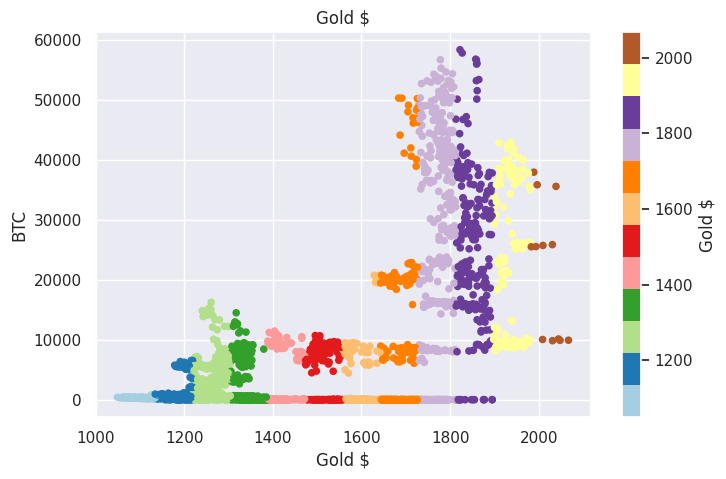

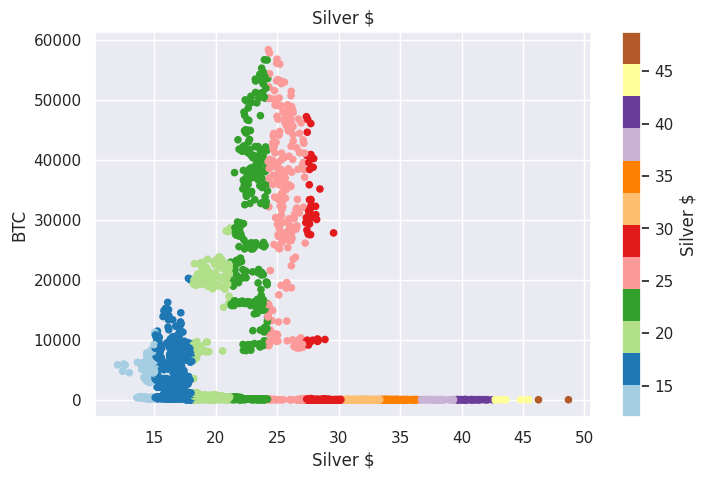

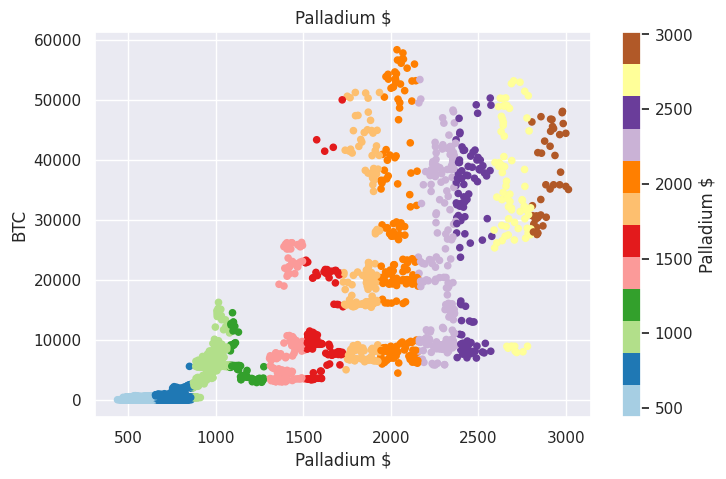

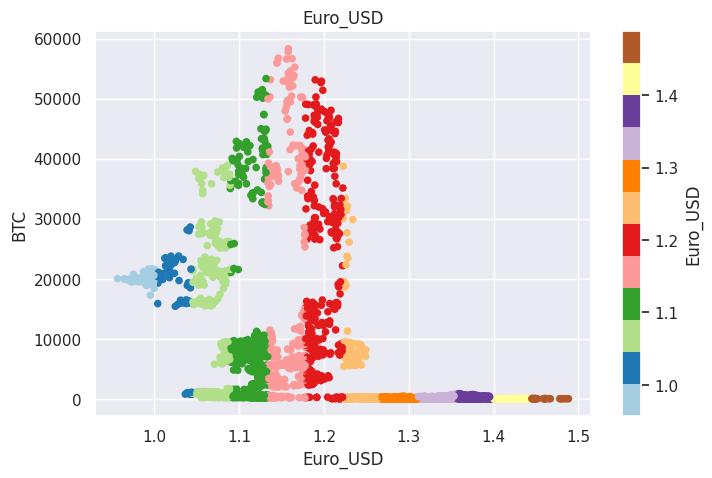

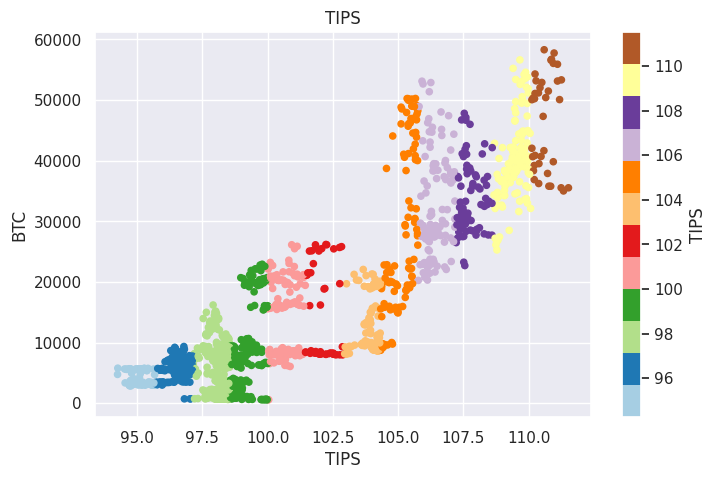

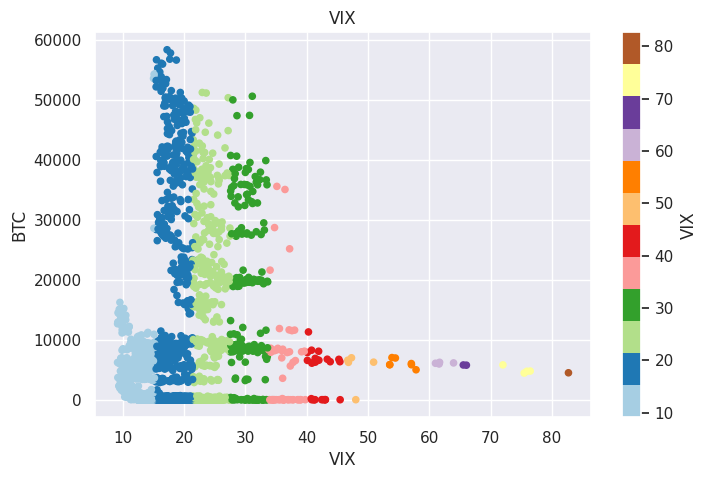

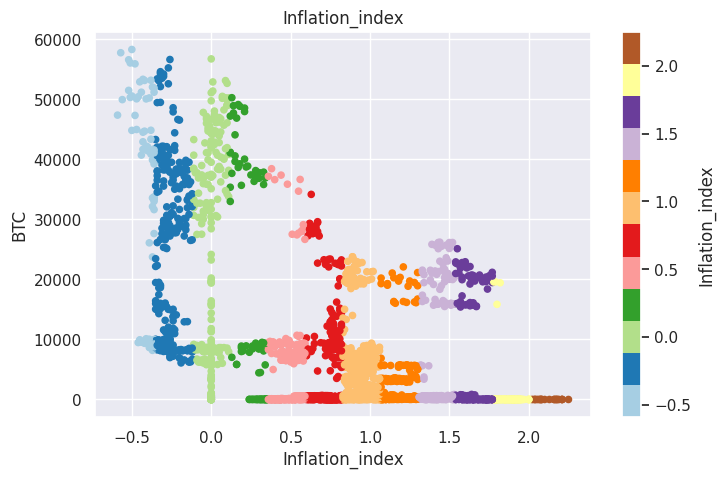

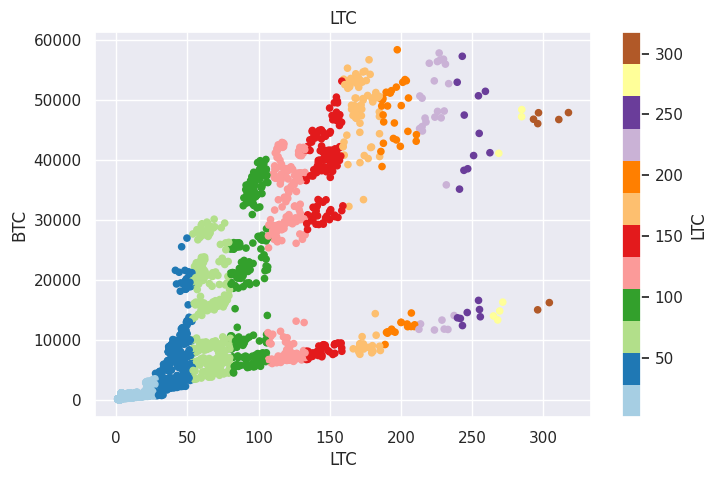

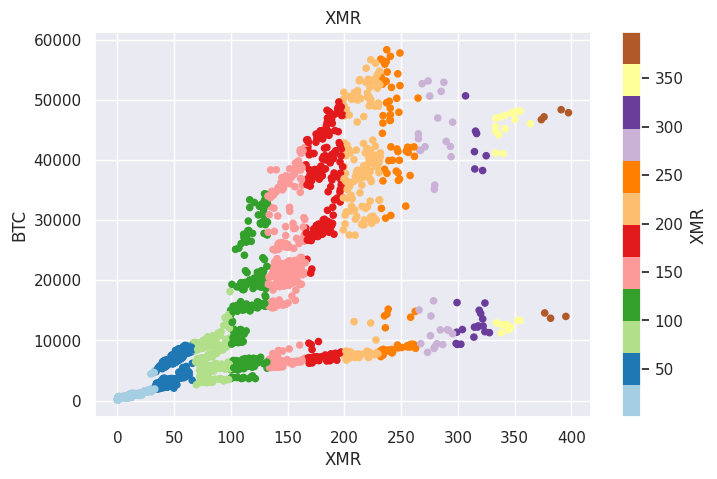

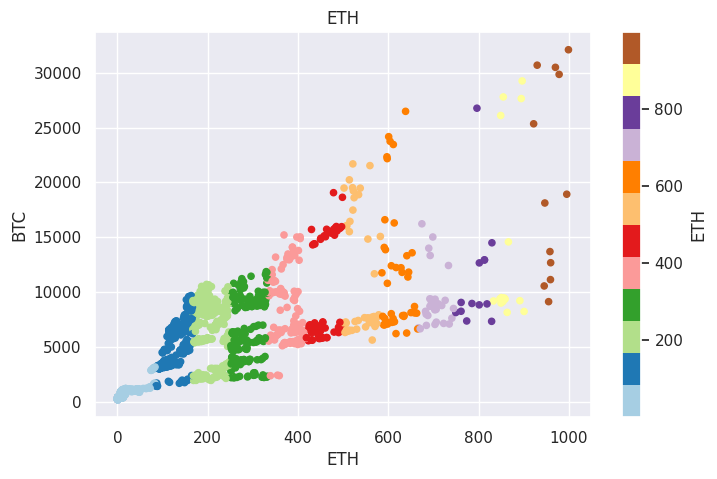

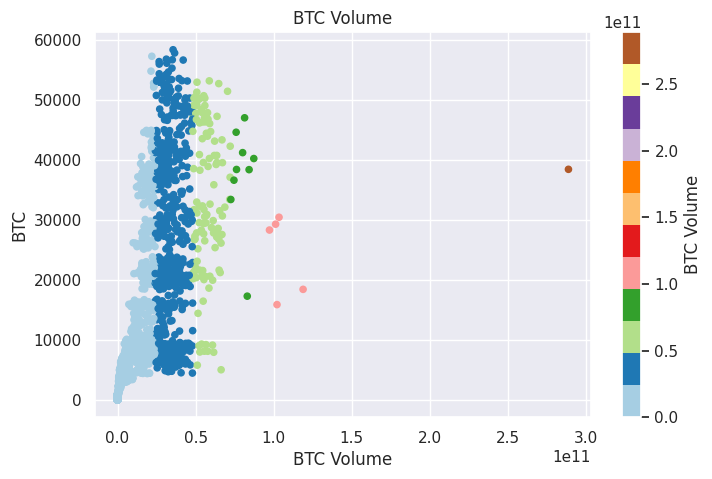

In [ ]:
highly_corr_num_cols = subset_df.select_dtypes(include = ["number"]).columns.to_list()[:-1]
for useful_num_col in highly_corr_num_cols:
    subset_df.plot.scatter(x = useful_num_col, y = 'BTC', c=useful_num_col, cmap='Paired', title=useful_num_col, figsize = (8, 5))

# Creating the 3 datasets for analysis

## Dataset named dataset_LR for linear regression analysis

In [ ]:
dataset_LR = subset_df.copy()

## Dataset named dataset_NN for neural network analysis

In [ ]:
dataset_NN = subset_df.copy()

## Dataset named dataset_TS for time series analysis

In [ ]:
dataset_TS = subset_df.copy()

#  Linear regression analysis

In [ ]:
display((dataset_LR.isnull().sum() * 100 / len(dataset_LR)).sort_values(ascending = False), dataset_LR.isnull().sum().sort_values(ascending = False))

TIPS                64.420197
ETH                 57.359863
BNB                 55.241763
Subjectivity_avg    39.281130
Polarity_avg        39.281130
Class               39.281130
SP500               30.894309
Palladium $         30.616175
Platinum $          30.616175
Silver $            30.616175
Gold $              30.616175
XMR                 30.316645
Euro_USD            29.503637
Oil                 28.904579
VIX                 28.412495
Inflation_index     28.412495
LTC                 21.929825
BTC Volume           0.000000
Date                 0.000000
BTC                  0.000000
dtype: float64

TIPS                3011
ETH                 2681
BNB                 2582
Subjectivity_avg    1836
Polarity_avg        1836
Class               1836
SP500               1444
Palladium $         1431
Platinum $          1431
Silver $            1431
Gold $              1431
XMR                 1417
Euro_USD            1379
Oil                 1351
VIX                 1328
Inflation_index     1328
LTC                 1025
BTC Volume             0
Date                   0
BTC                    0
dtype: int64

transformam coloana 'Date' in index deoarece analizele de tip linear regression nu reactioneaza bine la date cu variatie mare (high variance) si avem nevoie de timp ca perioada de referinta

In [ ]:
dataset_LR.set_index('Date', inplace=True)

In [ ]:
dataset_LR.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4674 entries, 2010-07-13 to 2010-07-17
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Oil               3323 non-null   float64
 1   Gold $            3243 non-null   float64
 2   Silver $          3243 non-null   float64
 3   Platinum $        3243 non-null   float64
 4   Palladium $       3243 non-null   float64
 5   Euro_USD          3295 non-null   float64
 6   TIPS              1663 non-null   float64
 7   VIX               3346 non-null   float64
 8   Inflation_index   3346 non-null   float64
 9   BNB               2092 non-null   float64
 10  LTC               3649 non-null   float64
 11  XMR               3257 non-null   float64
 12  ETH               1993 non-null   float64
 13  SP500             3230 non-null   float64
 14  Polarity_avg      2838 non-null   float64
 15  Subjectivity_avg  2838 non-null   float64
 16  Class             2838 n

## first attempt.
 replacing all NaN values with 0 for numeric columns and with unknown for categorical column

In [ ]:
numeric_dataset_LR = dataset_LR.select_dtypes(include = ['number'])
categoric_dataset_LR = dataset_LR.select_dtypes(exclude = ['number'])
display(dataset_LR.shape, numeric_dataset_LR.shape, categoric_dataset_LR.shape)

(4674, 19)

(4674, 18)

(4674, 1)

In [ ]:
categoric_dataset_LR.head()

Class
Date            
2010-07-13   NaN
2010-07-14   NaN
2010-07-15   NaN
2010-07-16   NaN
2010-07-19   NaN

In [ ]:
categoric_dataset_LR.fillna('unknown', inplace = True)

In [ ]:
numeric_dataset_LR.fillna(0, inplace = True)

In [79]:
!pip install category_encoders --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 4.4 MB/s eta 0:00:00


In [80]:
import category_encoders as ce

In [ ]:
oe = ce.OrdinalEncoder()
categoric_dataset_LR_encoded  = oe.fit_transform(categoric_dataset_LR)
categoric_dataset_LR_encoded.head()

Class
Date             
2010-07-13      1
2010-07-14      1
2010-07-15      1
2010-07-16      1
2010-07-19      1

### reuiniting the dataset

In [ ]:
print(numeric_dataset_LR.shape)
print(categoric_dataset_LR_encoded.shape)
dataset_LR_ver_1 = pd.merge(numeric_dataset_LR, categoric_dataset_LR_encoded, left_index = True, right_index = True)
print(dataset_LR_ver_1.shape)

(4674, 18)
(4674, 1)
(4722, 19)


In [ ]:
df_no_duplicates = dataset_LR_ver_1.drop_duplicates()

In [ ]:
df_no_duplicates.shape

(4673, 19)

In [ ]:
df_no_duplicates.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4673 entries, 2010-07-13 to 2023-04-05
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Oil               4673 non-null   float64
 1   Gold $            4673 non-null   float64
 2   Silver $          4673 non-null   float64
 3   Platinum $        4673 non-null   float64
 4   Palladium $       4673 non-null   float64
 5   Euro_USD          4673 non-null   float64
 6   TIPS              4673 non-null   float64
 7   VIX               4673 non-null   float64
 8   Inflation_index   4673 non-null   float64
 9   BNB               4673 non-null   float64
 10  LTC               4673 non-null   float64
 11  XMR               4673 non-null   float64
 12  ETH               4673 non-null   float64
 13  SP500             4673 non-null   float64
 14  Polarity_avg      4673 non-null   float64
 15  Subjectivity_avg  4673 non-null   float64
 16  BTC Volume        4673 n

### splitting the dataset into train and test sets

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train_LR_v1, y_train_LR_v1 = df_no_duplicates.drop(columns = 'BTC').iloc[:4200], df_no_duplicates['BTC'].iloc[:4200]
X_test_LR_v1, y_test_LR_v1 = df_no_duplicates.drop(columns = 'BTC').iloc[-473:], df_no_duplicates['BTC'].iloc[-473:]

In [ ]:
display(X_train_LR_v1.shape, y_train_LR_v1.shape, X_test_LR_v1.shape, y_test_LR_v1.shape)

(4200, 18)

(4200,)

(473, 18)

(473,)

In [ ]:
X_train_LR_v1.tail()

Oil   Gold $  Silver $  Platinum $  Palladium $  Euro_USD  \
Date                                                                      
2021-12-14  73.37  1776.90    22.170       911.0       1622.0    1.1309   
2021-12-15  73.71  1768.65    21.805       911.0       1576.0    1.1262   
2021-12-16  74.64  1795.70    22.175       930.0       1671.0    1.1336   
2021-12-17  72.97  1807.70    22.645       935.0       1779.0    1.1330   
2021-12-18   0.00     0.00     0.000         0.0          0.0    0.0000   

              TIPS        VIX  Inflation_index     BNB     LTC     XMR  ETH  \
Date                                                                          
2021-12-14  109.45  21.889999            -0.37  454.12  129.76  160.96  0.0   
2021-12-15  109.50  19.290001            -0.35  479.19  135.97  166.76  0.0   
2021-12-16  109.83  20.570000            -0.34  464.31  131.41  165.16  0.0   
2021-12-17  109.69  21.570000            -0.37  467.70  128.41  161.81  0.0   
2021-12-18    0.00   0.000000             0.00  474.99  132.39  161.19  0.0   

              SP500  Polarity_avg  Subjectivity_avg    BTC Volume  Class  
Date                                                                      
2021-12-14  4634.09      0.168534          0.885350  3.069861e+10      2  
2021-12-15  4709.85      0.216862          0.881723  3.245970e+10      2  
2021-12-16  4668.67      0.238531          0.871824  2.415129e+10      2  
2021-12-17  4620.64      0.148167          0.886090  2.903027e+10      2  
2021-12-18     0.00      0.208739          0.882503  2.321882e+10      2

In [ ]:
X_test_LR_v1.head()

Oil   Gold $  Silver $  Platinum $  Palladium $  Euro_USD  \
Date                                                                      
2021-12-19   0.00     0.00     0.000         0.0          0.0    0.0000   
2021-12-20  70.51  1796.30    22.295       926.0       1739.0    1.1273   
2021-12-21  72.85  1793.75    22.745       939.0       1828.0    1.1295   
2021-12-22  74.69  1792.80    22.660       949.0       1834.0    1.1301   
2021-12-23  76.26  1805.20    22.815       971.0       1890.0    1.1310   

              TIPS        VIX  Inflation_index     BNB     LTC     XMR  ETH  \
Date                                                                          
2021-12-19    0.00   0.000000             0.00  471.38  136.15  163.52  0.0   
2021-12-20  109.72  22.870001            -0.36  463.90  135.34  167.40  0.0   
2021-12-21  109.72  21.010000            -0.38  468.41  137.26  167.65  0.0   
2021-12-22  109.94  18.629999            -0.43  471.15  137.26  168.34  0.0   
2021-12-23  109.76  17.959999            -0.38  484.60  144.35  185.26  0.0   

              SP500  Polarity_avg  Subjectivity_avg    BTC Volume  Class  
Date                                                                      
2021-12-19     0.00      0.217585          0.878830  2.237906e+10      2  
2021-12-20  4568.02      0.130109          0.872449  2.753869e+10      2  
2021-12-21  4649.23      0.245917          0.887349  2.399106e+10      2  
2021-12-22  4696.56      0.264894          0.875080  2.165939e+10      2  
2021-12-23  4725.79      0.247134          0.876971  2.491858e+10      2

### Scaling the features of the dataset

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
mms = MinMaxScaler()

In [ ]:
X_train_LR_v1_scaled = mms.fit_transform(X_train_LR_v1)
X_test_LR_v1_scaled = mms.transform(X_test_LR_v1)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

In [ ]:
lr = LinearRegression()
dtr = DecisionTreeRegressor(random_state = 42)
rfr = RandomForestRegressor(random_state = 42)
gbr = GradientBoostingRegressor()
lgbmr = LGBMRegressor()
xgbr = XGBRegressor()

In [ ]:
regressor_list = [lr, dtr, rfr, gbr, lgbmr, xgbr]

In [140]:
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, mean_squared_error
from scipy import stats

In [ ]:
import warnings
warnings.filterwarnings('ignore')

Model: LinearRegression: MAE = 1476113695358995.0, MSE = 2.5940381098825606e+30
Model: DecisionTreeRegressor: MAE = 13931.696490486258, MSE = 261155728.62967113


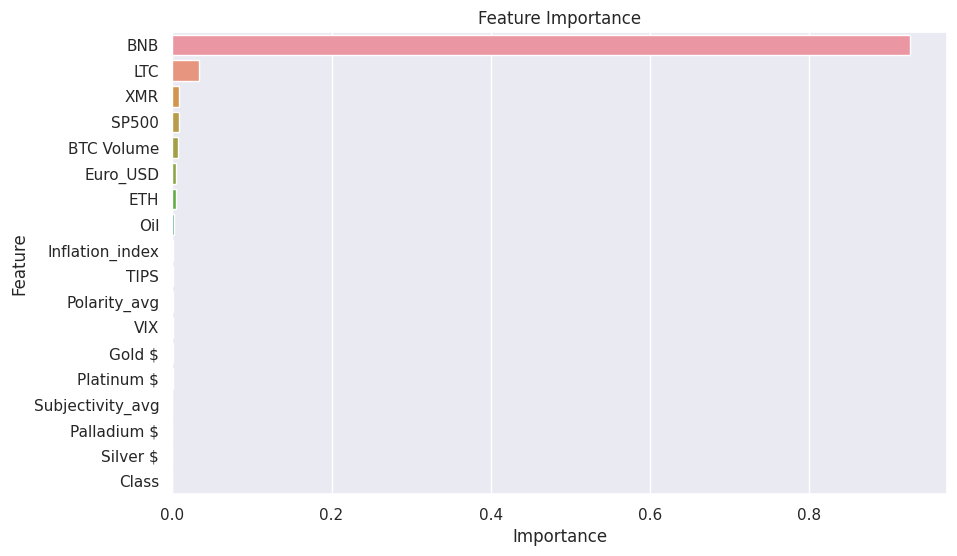

Model: RandomForestRegressor: MAE = 16595.562157293847, MSE = 344584216.2650308


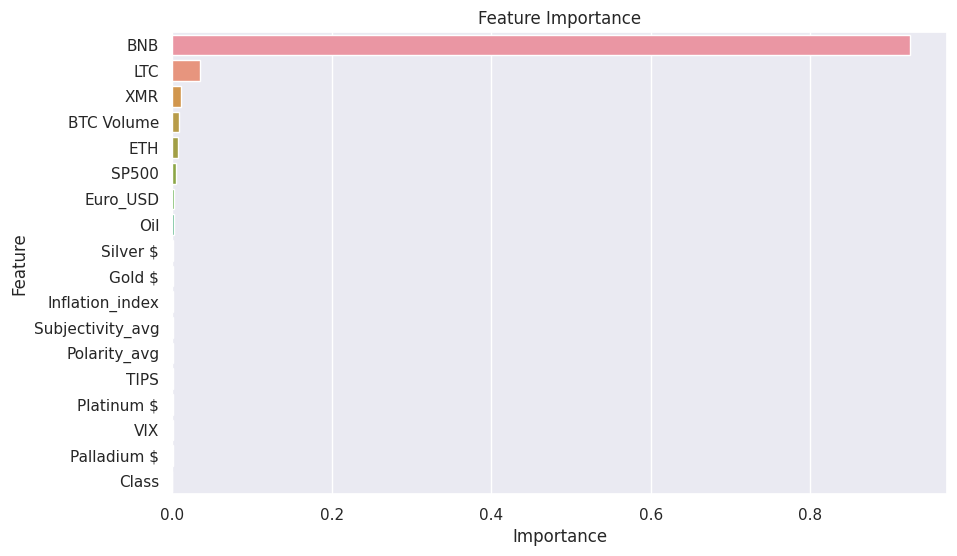

Model: GradientBoostingRegressor: MAE = 17311.156038889832, MSE = 380133735.4899818


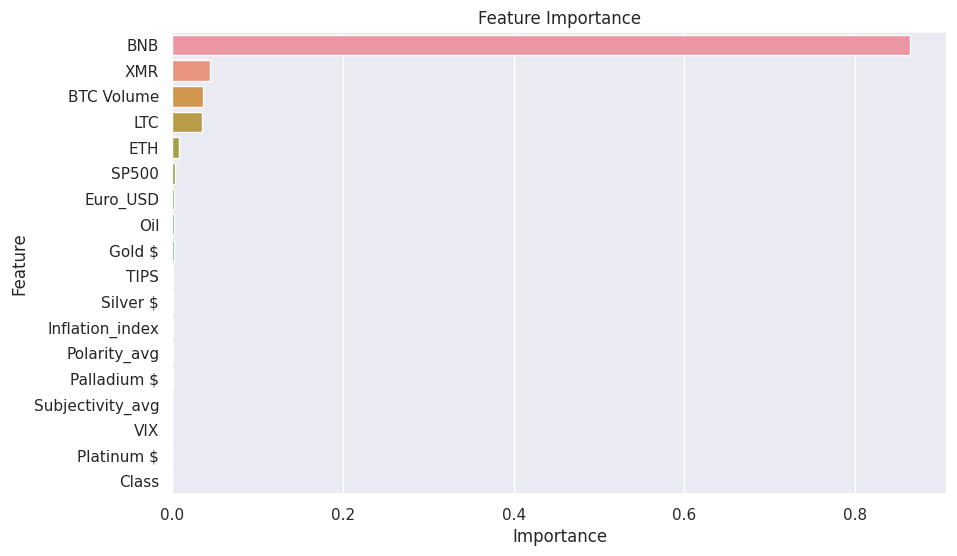

Model: LGBMRegressor: MAE = 16713.74019929959, MSE = 350020366.3526487


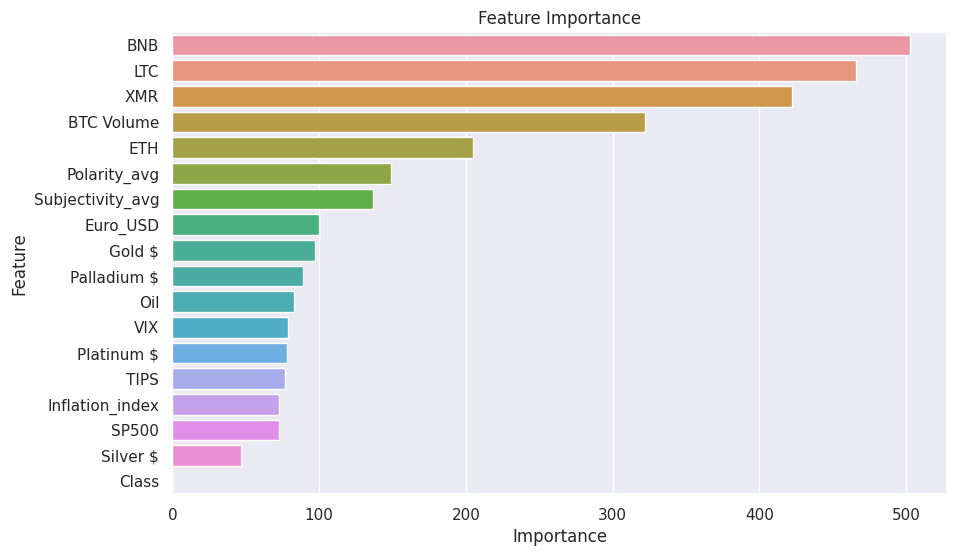

Model: XGBRegressor: MAE = 12991.114467825053, MSE = 227307881.781463


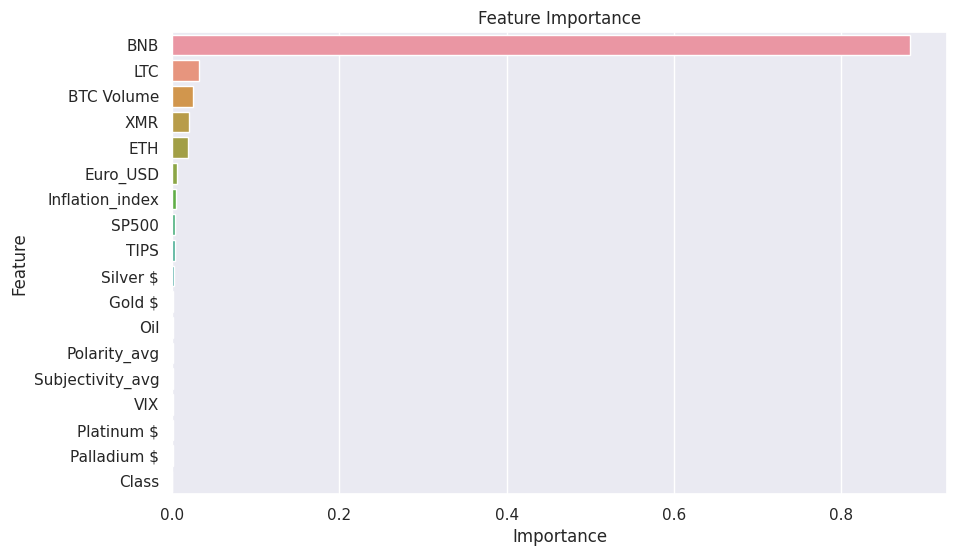

In [ ]:
best_regressor = None
best_mae = float('inf')
best_mse = float('inf')

for model in regressor_list:
    model.fit(X_train_LR_v1_scaled, y_train_LR_v1)
    predictions = model.predict(X_test_LR_v1)

    mae = mean_absolute_error(y_test_LR_v1, predictions)
    mse = mean_squared_error(y_test_LR_v1, predictions)

    if mae < best_mae:
        best_mae = mae
        best_mse = mse
        best_regressor = model

    print(f"Model: {type(model).__name__}: MAE = {mae}, MSE = {mse}")

    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_

        importance_df = pd.DataFrame({'Feature': X_train_LR_v1.columns, 'Importance': importances})

        importance_df = importance_df.sort_values(by='Importance', ascending=False)

        plt.figure(figsize=(10, 6))
        sns.barplot(x='Importance', y='Feature', data=importance_df)
        plt.title('Feature Importance')
        plt.xlabel('Importance')
        plt.ylabel('Feature')
        plt.show()

In [ ]:
best_regressor.fit(X_train_LR_v1_scaled, y_train_LR_v1)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
y_pred_LR_v1 = best_regressor.predict(X_test_LR_v1_scaled)

In [ ]:
y_test_LR_v1.isnull().value_counts()

False    473
Name: BTC, dtype: int64

In [ ]:
y_pred_df = pd.DataFrame(y_pred_LR_v1, index=y_test_LR_v1.index)

print(y_pred_df.index.equals(y_test_LR_v1.index))

True


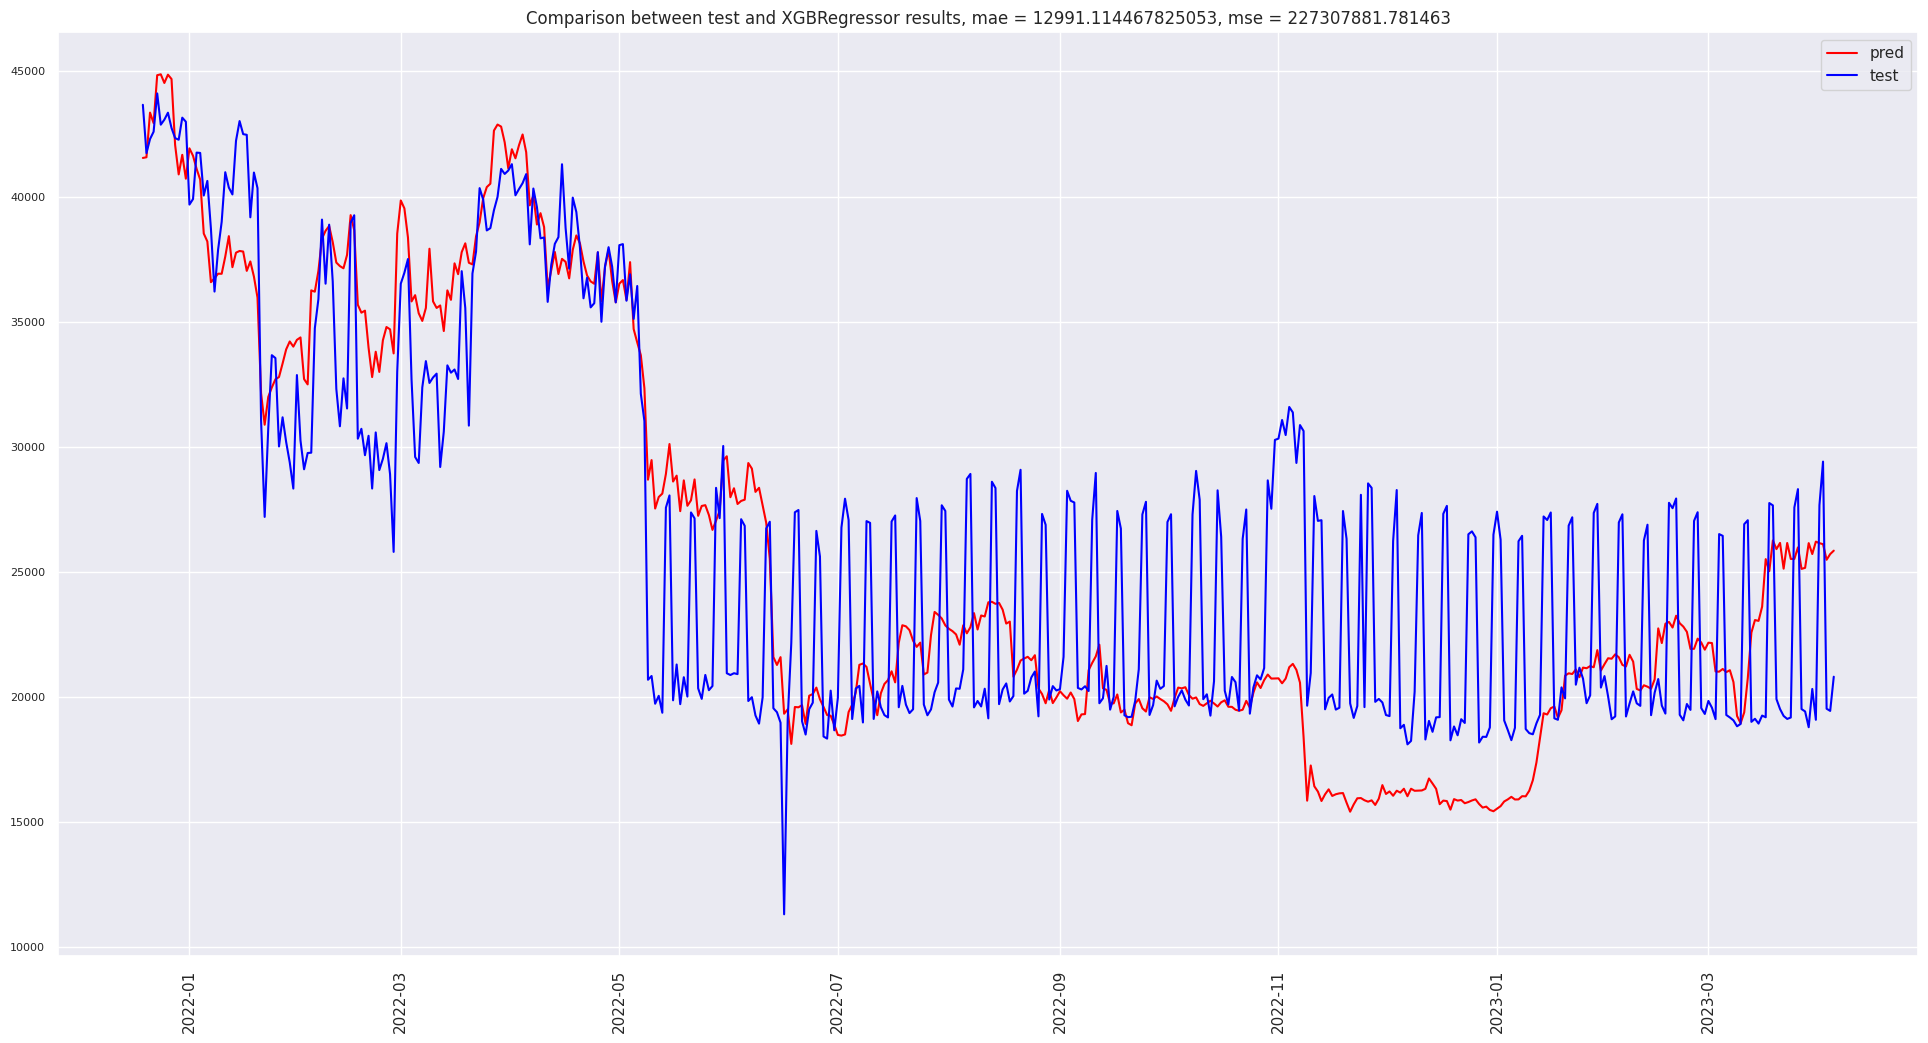

In [ ]:
fig = plt.subplots(figsize = (24, 12))
plt.plot(y_test_LR_v1, color = 'red', label = 'test')
plt.plot(y_pred_df, color = 'blue', label = 'pred')

plt.legend(['pred', 'test'], loc = 'upper right')
plt.title(f'Comparison between test and {type(best_regressor).__name__} results, mae = {best_mae}, mse = {best_mse}')
plt.xticks(rotation = 90)
plt.yticks(fontsize = 8)
plt.show()

## second attempt.
 replacing all NaN values with interpolated values for numeric columns and with unknown for categorical column

In [ ]:
numeric_dataset_LR_v2 = dataset_LR.select_dtypes(include = ['number'])
categoric_dataset_LR_v2 = dataset_LR.select_dtypes(exclude = ['number'])
display(dataset_LR.shape, numeric_dataset_LR_v2.shape, categoric_dataset_LR_v2.shape)

(4674, 19)

(4674, 18)

(4674, 1)

In [ ]:
categoric_dataset_LR_v2.head()

Class
Date            
2010-07-13   NaN
2010-07-14   NaN
2010-07-15   NaN
2010-07-16   NaN
2010-07-19   NaN

In [ ]:
categoric_dataset_LR_v2.fillna('unknown', inplace = True)

In [ ]:
numeric_dataset_LR_v2.interpolate(inplace = True)

In [ ]:
numeric_dataset_LR_v2.fillna(0, inplace = True)

In [ ]:
oe = ce.OrdinalEncoder()
categoric_dataset_LR_v2_encoded  = oe.fit_transform(categoric_dataset_LR_v2)
categoric_dataset_LR_v2_encoded.head()

Class
Date             
2010-07-13      1
2010-07-14      1
2010-07-15      1
2010-07-16      1
2010-07-19      1

### reuiniting the dataset

In [ ]:
print(numeric_dataset_LR_v2.shape)
print(categoric_dataset_LR_v2_encoded.shape)
dataset_LR_v2 = pd.merge(numeric_dataset_LR_v2, categoric_dataset_LR_v2_encoded, left_index = True, right_index = True)
print(dataset_LR_v2.shape)

(4674, 18)
(4674, 1)
(4722, 19)


In [ ]:
df_no_duplicates_LR_v2 = dataset_LR_v2.drop_duplicates()

In [ ]:
df_no_duplicates_LR_v2.shape

(4673, 19)

In [ ]:
df_no_duplicates_LR_v2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4673 entries, 2010-07-13 to 2023-04-05
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Oil               4673 non-null   float64
 1   Gold $            4673 non-null   float64
 2   Silver $          4673 non-null   float64
 3   Platinum $        4673 non-null   float64
 4   Palladium $       4673 non-null   float64
 5   Euro_USD          4673 non-null   float64
 6   TIPS              4673 non-null   float64
 7   VIX               4673 non-null   float64
 8   Inflation_index   4673 non-null   float64
 9   BNB               4673 non-null   float64
 10  LTC               4673 non-null   float64
 11  XMR               4673 non-null   float64
 12  ETH               4673 non-null   float64
 13  SP500             4673 non-null   float64
 14  Polarity_avg      4673 non-null   float64
 15  Subjectivity_avg  4673 non-null   float64
 16  BTC Volume        4673 n

### splitting the dataset into train and test sets

In [ ]:
X_train_LR_v2, y_train_LR_v2 = df_no_duplicates_LR_v2.drop(columns = 'BTC').iloc[:4200], df_no_duplicates_LR_v2['BTC'].iloc[:4200]
X_test_LR_v2, y_test_LR_v2 = df_no_duplicates_LR_v2.drop(columns = 'BTC').iloc[-473:], df_no_duplicates_LR_v2['BTC'].iloc[-473:]

In [ ]:
display(X_train_LR_v2.shape, y_train_LR_v2.shape, X_test_LR_v2.shape, y_test_LR_v2.shape)

(4200, 18)

(4200,)

(473, 18)

(473,)

In [ ]:
X_train_LR_v2.tail()

Oil   Gold $  Silver $  Platinum $  Palladium $  Euro_USD  \
Date                                                                      
2021-12-14  73.37  1776.90    22.170       911.0       1622.0    1.1309   
2021-12-15  73.71  1768.65    21.805       911.0       1576.0    1.1262   
2021-12-16  74.64  1795.70    22.175       930.0       1671.0    1.1336   
2021-12-17  72.97  1807.70    22.645       935.0       1779.0    1.1330   
2021-12-18  85.89  1693.75    30.870      1566.0        711.0    1.3262   

              TIPS        VIX  Inflation_index     BNB     LTC     XMR  \
Date                                                                     
2021-12-14  109.45  21.889999            -0.37  454.12  129.76  160.96   
2021-12-15  109.50  19.290001            -0.35  479.19  135.97  166.76   
2021-12-16  109.83  20.570000            -0.34  464.31  131.41  165.16   
2021-12-17  109.69  21.570000            -0.37  467.70  128.41  161.81   
2021-12-18   95.11  24.860000             0.00  474.99  132.39  161.19   

                   ETH    SP500  Polarity_avg  Subjectivity_avg    BTC Volume  \
Date                                                                            
2021-12-14  968.204282  4634.09      0.168534          0.885350  3.069861e+10   
2021-12-15  968.402927  4709.85      0.216862          0.881723  3.245970e+10   
2021-12-16  968.601572  4668.67      0.238531          0.871824  2.415129e+10   
2021-12-17  968.800217  4620.64      0.148167          0.886090  2.903027e+10   
2021-12-18  894.558667  1462.42      0.208739          0.882503  2.321882e+10   

            Class  
Date               
2021-12-14      2  
2021-12-15      2  
2021-12-16      2  
2021-12-17      2  
2021-12-18      2

In [ ]:
X_test_LR_v2.head()

Oil   Gold $  Silver $  Platinum $  Palladium $  Euro_USD  \
Date                                                                      
2021-12-19  85.89  1693.75    30.870      1566.0        711.0    1.3262   
2021-12-20  70.51  1796.30    22.295       926.0       1739.0    1.1273   
2021-12-21  72.85  1793.75    22.745       939.0       1828.0    1.1295   
2021-12-22  74.69  1792.80    22.660       949.0       1834.0    1.1301   
2021-12-23  76.26  1805.20    22.815       971.0       1890.0    1.1310   

              TIPS        VIX  Inflation_index     BNB     LTC     XMR  \
Date                                                                     
2021-12-19   95.11  24.860000             0.00  471.38  136.15  163.52   
2021-12-20  109.72  22.870001            -0.36  463.90  135.34  167.40   
2021-12-21  109.72  21.010000            -0.38  468.41  137.26  167.65   
2021-12-22  109.94  18.629999            -0.43  471.15  137.26  168.34   
2021-12-23  109.76  17.959999            -0.38  484.60  144.35  185.26   

                   ETH    SP500  Polarity_avg  Subjectivity_avg    BTC Volume  \
Date                                                                            
2021-12-19  895.561000  1462.42      0.217585          0.878830  2.237906e+10   
2021-12-20  968.998862  4568.02      0.130109          0.872449  2.753869e+10   
2021-12-21  969.197507  4649.23      0.245917          0.887349  2.399106e+10   
2021-12-22  969.396152  4696.56      0.264894          0.875080  2.165939e+10   
2021-12-23  969.594797  4725.79      0.247134          0.876971  2.491858e+10   

            Class  
Date               
2021-12-19      2  
2021-12-20      2  
2021-12-21      2  
2021-12-22      2  
2021-12-23      2

### Scaling the features of the dataset

In [ ]:
X_train_LR_v2_scaled = mms.fit_transform(X_train_LR_v2)
X_test_LR_v2_scaled = mms.transform(X_test_LR_v2)

In [ ]:
X_train_LR_v2.isnull().sum()

Oil                 0
Gold $              0
Silver $            0
Platinum $          0
Palladium $         0
Euro_USD            0
TIPS                0
VIX                 0
Inflation_index     0
BNB                 0
LTC                 0
XMR                 0
ETH                 0
SP500               0
Polarity_avg        0
Subjectivity_avg    0
BTC Volume          0
Class               0
dtype: int64

Model: LinearRegression: MAE = 1160796996455320.0, MSE = 1.604165906369232e+30
Model: DecisionTreeRegressor: MAE = 10868.015665961948, MSE = 154127771.42318293


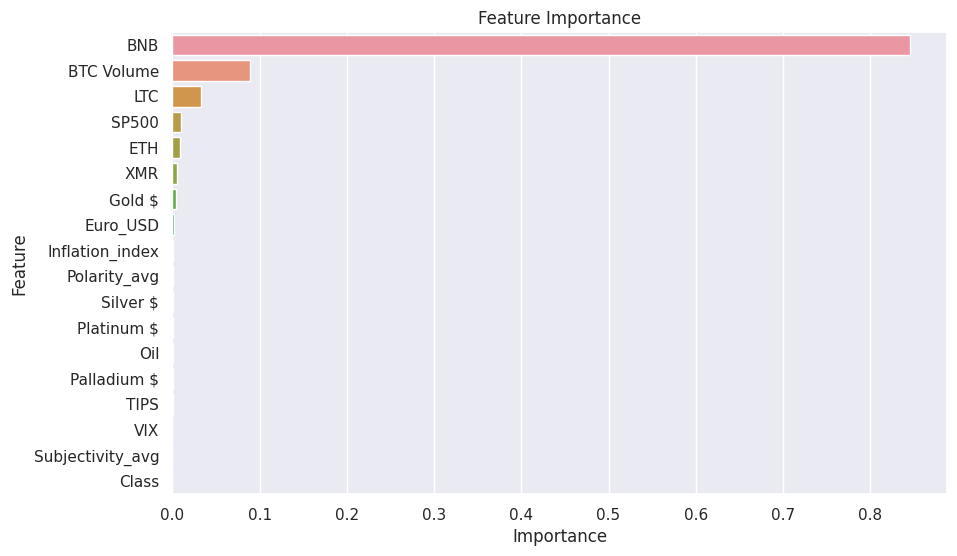

Model: RandomForestRegressor: MAE = 16010.257579281162, MSE = 323049022.54796255


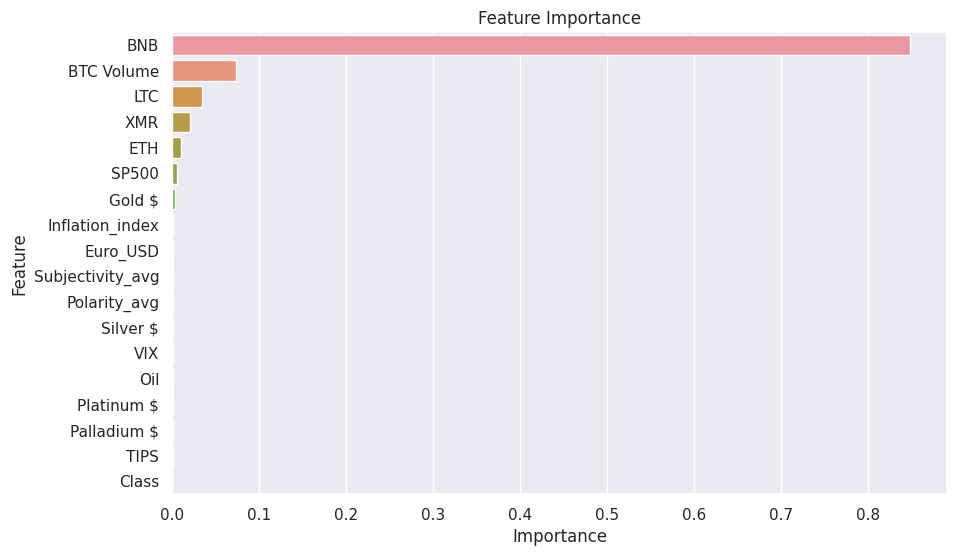

Model: GradientBoostingRegressor: MAE = 13527.530092671914, MSE = 241845897.38993257


Model: LGBMRegressor: MAE = 19324.150264041487, MSE = 440603474.9807772


Model: XGBRegressor: MAE = 12546.673092296513, MSE = 211518535.6770661


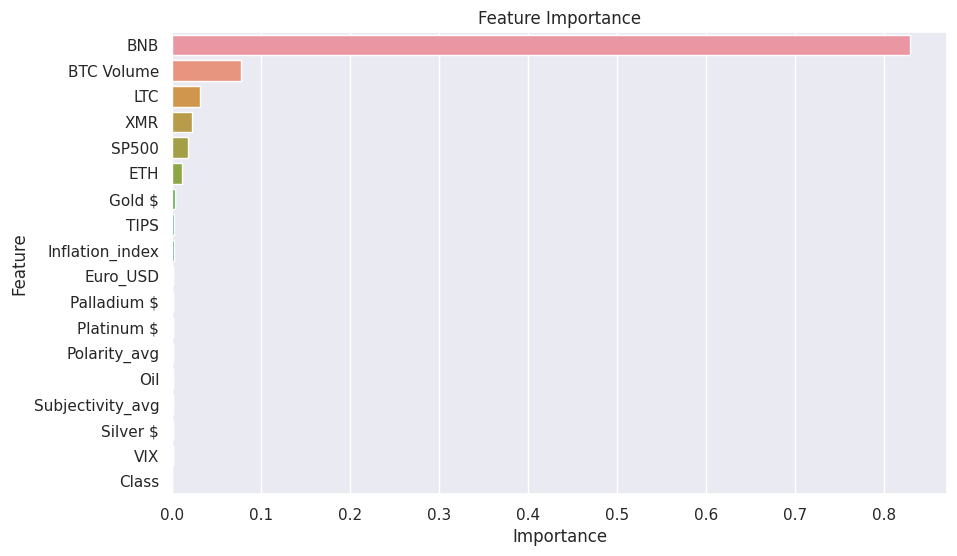

In [ ]:
best_regressor = None
best_mae = float('inf')
best_mse = float('inf')

for model in regressor_list:
    model.fit(X_train_LR_v2_scaled, y_train_LR_v2)
    predictions = model.predict(X_test_LR_v2)

    mae = mean_absolute_error(y_test_LR_v2, predictions)
    mse = mean_squared_error(y_test_LR_v2, predictions)

    if mae < best_mae:
        best_mae = mae
        best_mse = mse
        best_regressor = model

    print(f"Model: {type(model).__name__}: MAE = {mae}, MSE = {mse}")

    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_

        importance_df = pd.DataFrame({'Feature': X_train_LR_v2.columns, 'Importance': importances})

        importance_df = importance_df.sort_values(by='Importance', ascending=False)

        plt.figure(figsize=(10, 6))
        sns.barplot(x='Importance', y='Feature', data=importance_df)
        plt.title('Feature Importance')
        plt.xlabel('Importance')
        plt.ylabel('Feature')
        plt.show()

In [ ]:
best_regressor.fit(X_train_LR_v2_scaled, y_train_LR_v2)

DecisionTreeRegressor(random_state=42)

In [ ]:
y_pred_LR_v2 = best_regressor.predict(X_test_LR_v2_scaled)

In [ ]:
y_test_LR_v2.isnull().value_counts()

False    473
Name: BTC, dtype: int64

In [ ]:
y_pred_df_v2 = pd.DataFrame(y_pred_LR_v2, index=y_test_LR_v2.index)

print(y_pred_df_v2.index.equals(y_test_LR_v2.index))

True


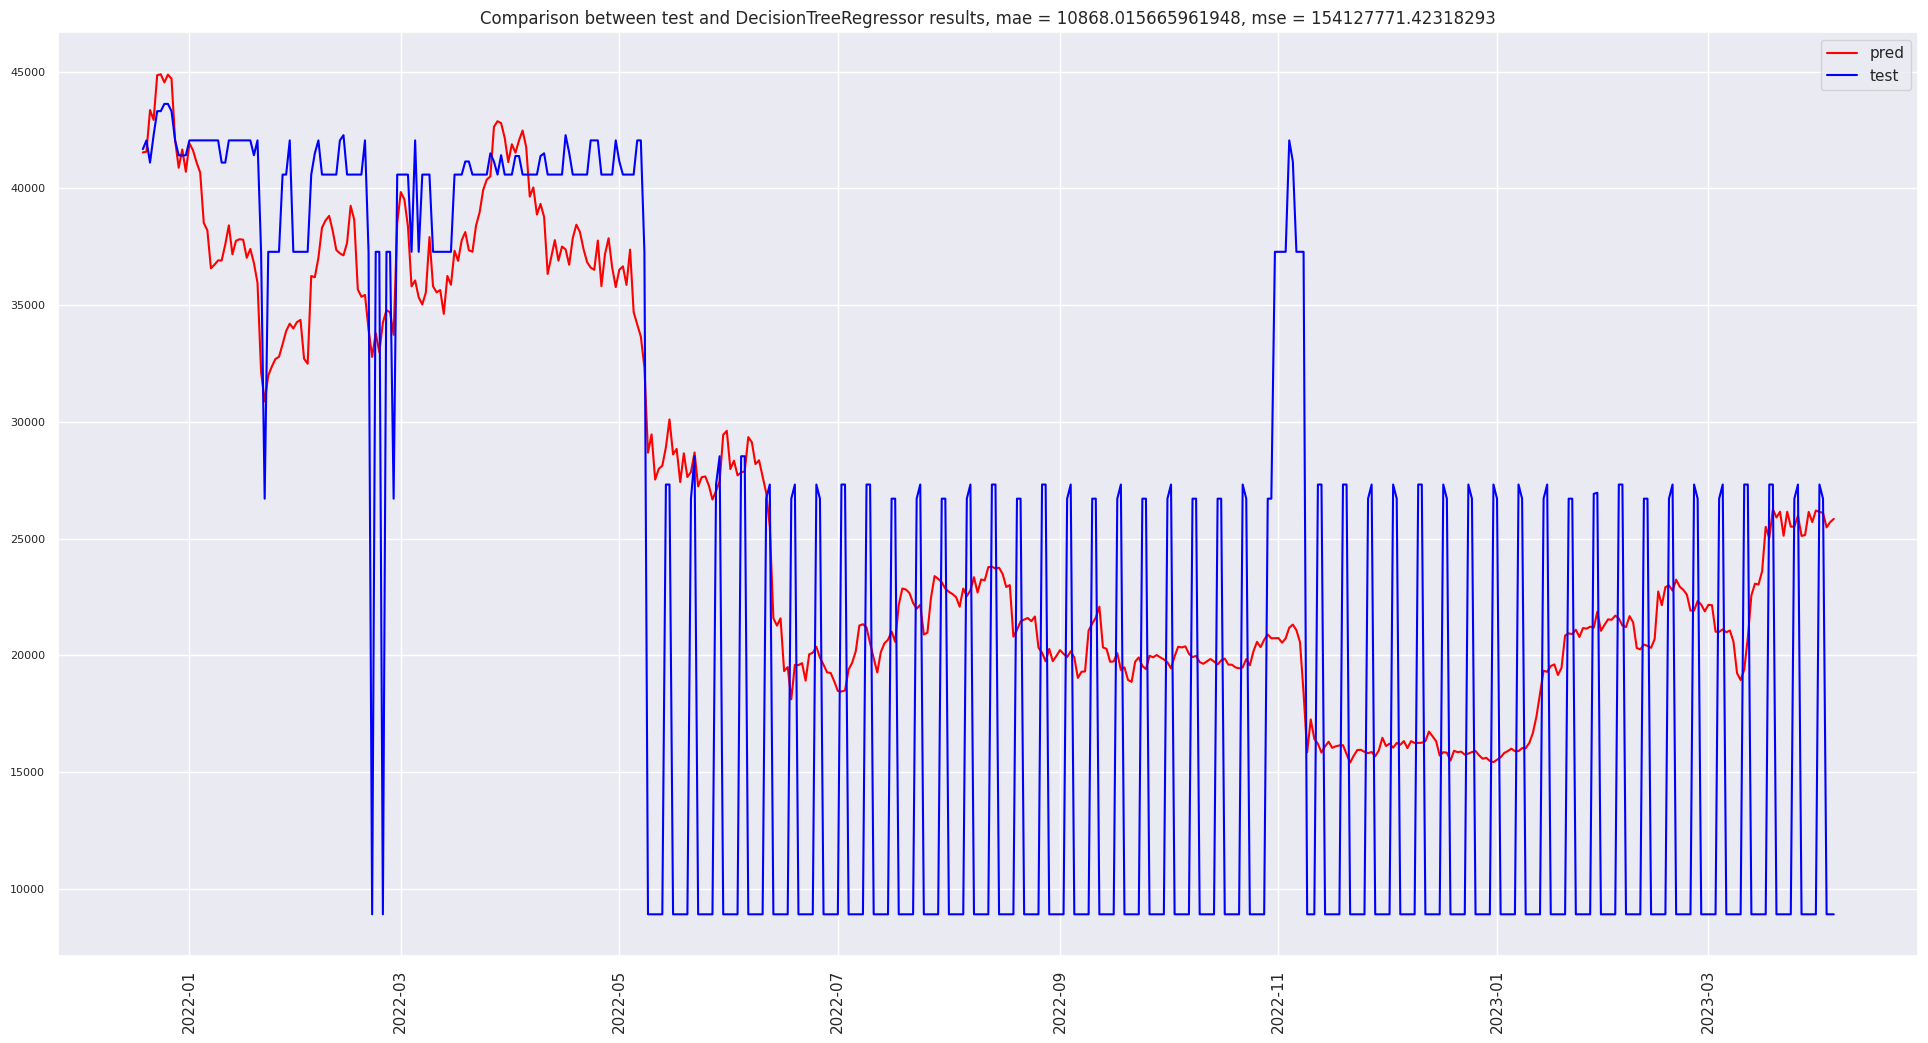

In [ ]:
fig = plt.subplots(figsize = (24, 12))
plt.plot(y_test_LR_v2, color = 'red', label = 'test')
plt.plot(y_pred_df_v2, color = 'blue', label = 'pred')

plt.legend(['pred', 'test'], loc = 'upper right')
plt.title(f'Comparison between test and {type(best_regressor).__name__} results, mae = {best_mae}, mse = {best_mse}')
plt.xticks(rotation = 90)
plt.yticks(fontsize = 8)
plt.show()

In [ ]:
GradientBoostingRegressor

sklearn.ensemble._gb.GradientBoostingRegressor

## third attempt.
 replacing all NaN values with interpolated values for numeric columns and with unknown for categorical column and eliminating the follwing columns
 TIPS                64.420197
 ETH                 57.359863
 BNB                 55.241763

In [ ]:
dataset_LR_3rd_version = dataset_LR.drop(columns = ['TIPS', 'ETH', 'BNB', 'LTC', 'XMR'])

In [ ]:
numeric_dataset_LR_v3 = dataset_LR_3rd_version.select_dtypes(include = ['number'])
categoric_dataset_LR_v3 = dataset_LR_3rd_version.select_dtypes(exclude = ['number'])
display(dataset_LR_3rd_version.shape, numeric_dataset_LR_v3.shape, categoric_dataset_LR_v3.shape)

(4674, 14)

(4674, 13)

(4674, 1)

In [ ]:
categoric_dataset_LR_v3.head()

Class
Date            
2010-07-13   NaN
2010-07-14   NaN
2010-07-15   NaN
2010-07-16   NaN
2010-07-19   NaN

In [ ]:
categoric_dataset_LR_v3.fillna('unknown', inplace = True)

In [ ]:
numeric_dataset_LR_v3.interpolate(inplace = True)

In [ ]:
numeric_dataset_LR_v3.fillna(0, inplace = True)

In [ ]:
oe = ce.OrdinalEncoder()
categoric_dataset_LR_v3_encoded  = oe.fit_transform(categoric_dataset_LR_v3)
categoric_dataset_LR_v3_encoded.head()

Class
Date             
2010-07-13      1
2010-07-14      1
2010-07-15      1
2010-07-16      1
2010-07-19      1

### reuiniting the dataset

In [ ]:
print(numeric_dataset_LR_v3.shape)
print(categoric_dataset_LR_v3_encoded.shape)
dataset_LR_v3 = pd.merge(numeric_dataset_LR_v3, categoric_dataset_LR_v3_encoded, left_index = True, right_index = True)
print(dataset_LR_v3.shape)

(4674, 13)
(4674, 1)
(4722, 14)


In [ ]:
df_no_duplicates_LR_v3 = dataset_LR_v3.drop_duplicates()

In [ ]:
df_no_duplicates_LR_v3.shape

(4673, 14)

In [ ]:
df_no_duplicates_LR_v3.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4673 entries, 2010-07-13 to 2023-04-05
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Oil               4673 non-null   float64
 1   Gold $            4673 non-null   float64
 2   Silver $          4673 non-null   float64
 3   Platinum $        4673 non-null   float64
 4   Palladium $       4673 non-null   float64
 5   Euro_USD          4673 non-null   float64
 6   VIX               4673 non-null   float64
 7   Inflation_index   4673 non-null   float64
 8   SP500             4673 non-null   float64
 9   Polarity_avg      4673 non-null   float64
 10  Subjectivity_avg  4673 non-null   float64
 11  BTC Volume        4673 non-null   float64
 12  BTC               4673 non-null   float64
 13  Class             4673 non-null   int64  
dtypes: float64(13), int64(1)
memory usage: 547.6 KB


### splitting the dataset into train and test sets

In [ ]:
X_train_LR_v3, y_train_LR_v3 = df_no_duplicates_LR_v3.drop(columns = 'BTC').iloc[:4200], df_no_duplicates_LR_v3['BTC'].iloc[:4200]
X_test_LR_v3, y_test_LR_v3 = df_no_duplicates_LR_v3.drop(columns = 'BTC').iloc[-473:], df_no_duplicates_LR_v3['BTC'].iloc[-473:]

In [ ]:
display(X_train_LR_v3.shape, y_train_LR_v3.shape, X_test_LR_v3.shape, y_test_LR_v3.shape)

(4200, 13)

(4200,)

(473, 13)

(473,)

In [ ]:
X_train_LR_v3.tail()

Oil   Gold $  Silver $  Platinum $  Palladium $  Euro_USD  \
Date                                                                      
2021-12-14  73.37  1776.90    22.170       911.0       1622.0    1.1309   
2021-12-15  73.71  1768.65    21.805       911.0       1576.0    1.1262   
2021-12-16  74.64  1795.70    22.175       930.0       1671.0    1.1336   
2021-12-17  72.97  1807.70    22.645       935.0       1779.0    1.1330   
2021-12-18  85.89  1693.75    30.870      1566.0        711.0    1.3262   

                  VIX  Inflation_index    SP500  Polarity_avg  \
Date                                                            
2021-12-14  21.889999            -0.37  4634.09      0.168534   
2021-12-15  19.290001            -0.35  4709.85      0.216862   
2021-12-16  20.570000            -0.34  4668.67      0.238531   
2021-12-17  21.570000            -0.37  4620.64      0.148167   
2021-12-18  24.860000             0.00  1462.42      0.208739   

            Subjectivity_avg    BTC Volume  Class  
Date                                               
2021-12-14          0.885350  3.069861e+10      2  
2021-12-15          0.881723  3.245970e+10      2  
2021-12-16          0.871824  2.415129e+10      2  
2021-12-17          0.886090  2.903027e+10      2  
2021-12-18          0.882503  2.321882e+10      2

In [ ]:
X_test_LR_v3.head()

Oil   Gold $  Silver $  Platinum $  Palladium $  Euro_USD  \
Date                                                                      
2021-12-19  85.89  1693.75    30.870      1566.0        711.0    1.3262   
2021-12-20  70.51  1796.30    22.295       926.0       1739.0    1.1273   
2021-12-21  72.85  1793.75    22.745       939.0       1828.0    1.1295   
2021-12-22  74.69  1792.80    22.660       949.0       1834.0    1.1301   
2021-12-23  76.26  1805.20    22.815       971.0       1890.0    1.1310   

                  VIX  Inflation_index    SP500  Polarity_avg  \
Date                                                            
2021-12-19  24.860000             0.00  1462.42      0.217585   
2021-12-20  22.870001            -0.36  4568.02      0.130109   
2021-12-21  21.010000            -0.38  4649.23      0.245917   
2021-12-22  18.629999            -0.43  4696.56      0.264894   
2021-12-23  17.959999            -0.38  4725.79      0.247134   

            Subjectivity_avg    BTC Volume  Class  
Date                                               
2021-12-19          0.878830  2.237906e+10      2  
2021-12-20          0.872449  2.753869e+10      2  
2021-12-21          0.887349  2.399106e+10      2  
2021-12-22          0.875080  2.165939e+10      2  
2021-12-23          0.876971  2.491858e+10      2

### Scaling the features of the dataset

In [ ]:
X_train_LR_v3_scaled = mms.fit_transform(X_train_LR_v3)
X_test_LR_v3_scaled = mms.transform(X_test_LR_v3)

In [ ]:
X_train_LR_v3.isnull().sum()

Oil                 0
Gold $              0
Silver $            0
Platinum $          0
Palladium $         0
Euro_USD            0
VIX                 0
Inflation_index     0
SP500               0
Polarity_avg        0
Subjectivity_avg    0
BTC Volume          0
Class               0
dtype: int64

Model: LinearRegression: MAE = 3366613551159272.0, MSE = 1.349345798427475e+31
Model: DecisionTreeRegressor: MAE = 11122.952558139536, MSE = 165849921.79159203


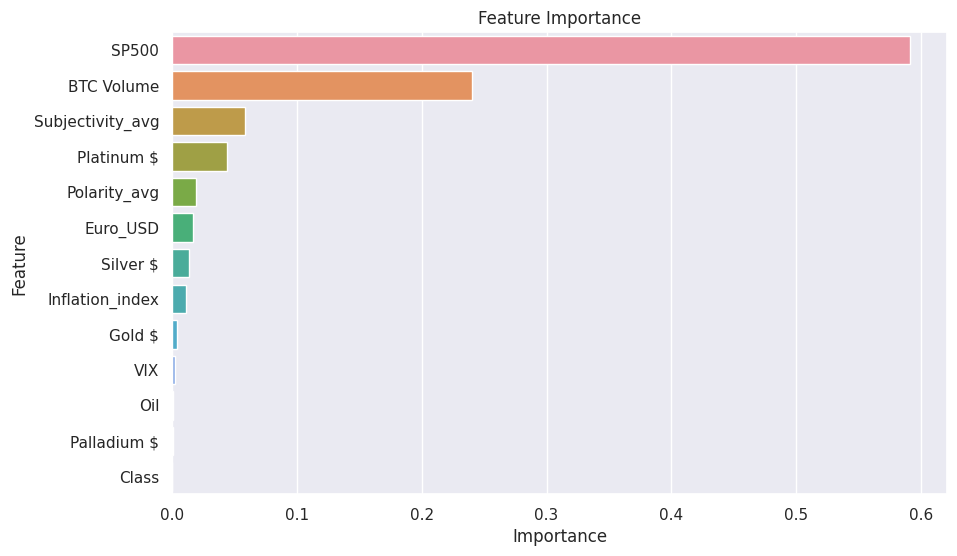

Model: RandomForestRegressor: MAE = 12970.578150105695, MSE = 222984064.5775097


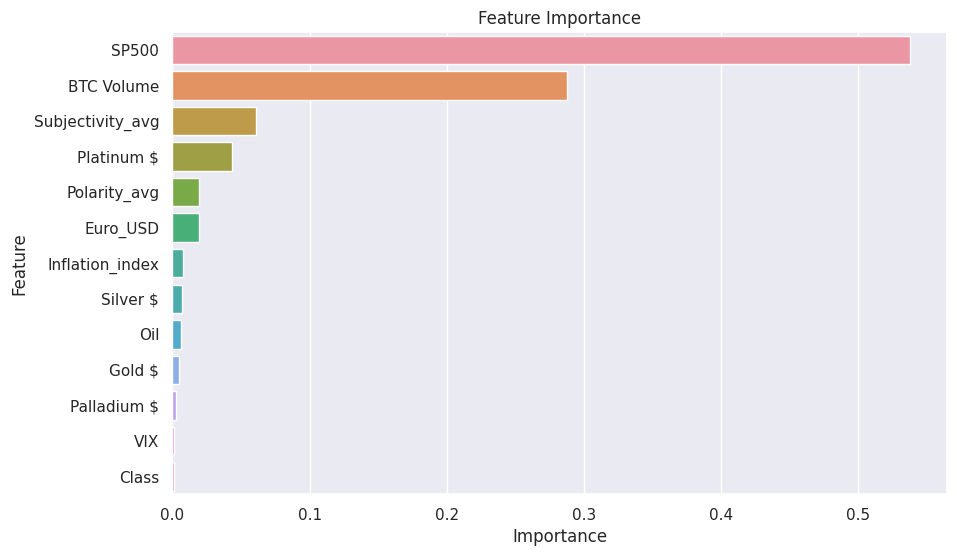

Model: GradientBoostingRegressor: MAE = 8501.705065890857, MSE = 96094387.2221384


Model: LGBMRegressor: MAE = 14431.80754512566, MSE = 270940453.9536218


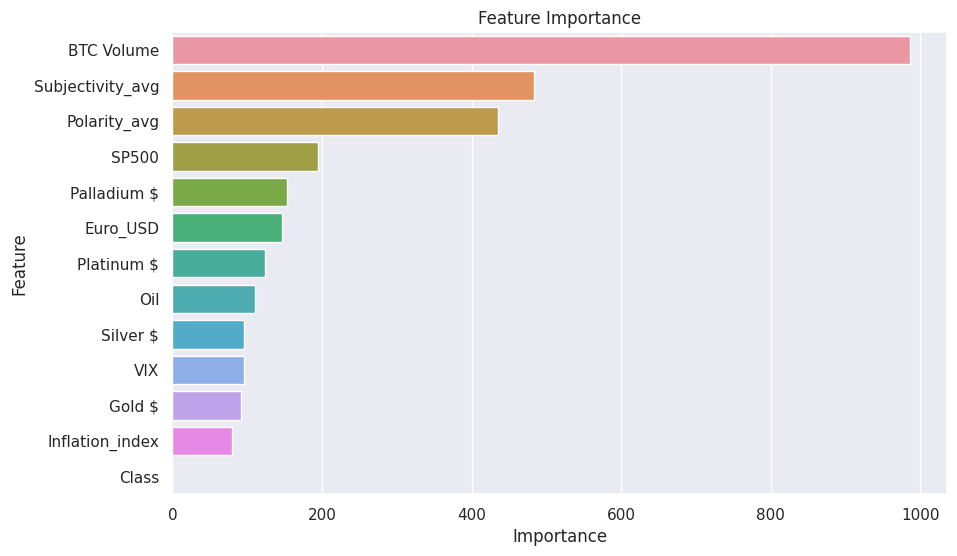

Model: XGBRegressor: MAE = 10509.384256243393, MSE = 132114540.30764402


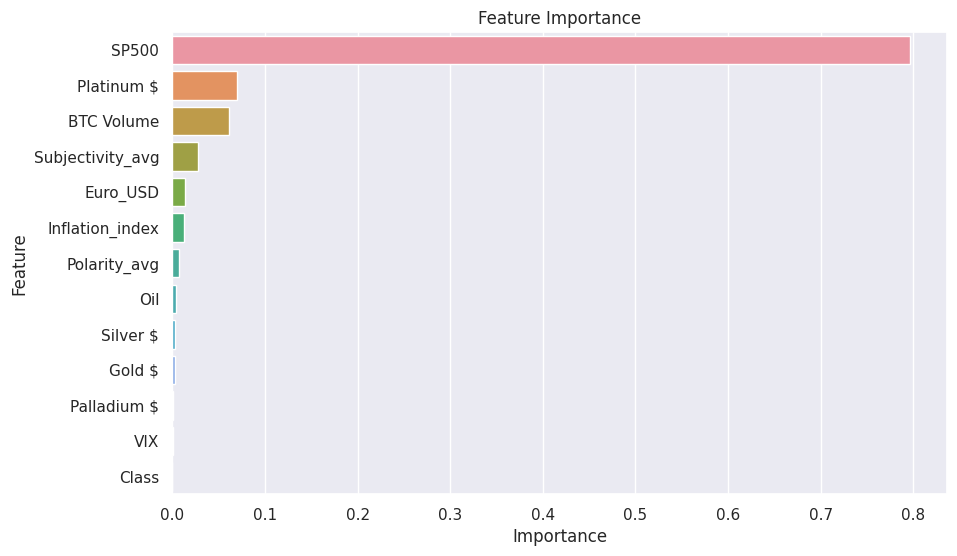

In [ ]:
best_regressor = None
best_mae = float('inf')
best_mse = float('inf')

for model in regressor_list:
    model.fit(X_train_LR_v3_scaled, y_train_LR_v3)
    predictions = model.predict(X_test_LR_v3)

    mae = mean_absolute_error(y_test_LR_v3, predictions)
    mse = mean_squared_error(y_test_LR_v3, predictions)

    if mae < best_mae:
        best_mae = mae
        best_mse = mse
        best_regressor = model

    print(f"Model: {type(model).__name__}: MAE = {mae}, MSE = {mse}")

    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_

        importance_df = pd.DataFrame({'Feature': X_train_LR_v3.columns, 'Importance': importances})

        importance_df = importance_df.sort_values(by='Importance', ascending=False)

        plt.figure(figsize=(10, 6))
        sns.barplot(x='Importance', y='Feature', data=importance_df)
        plt.title('Feature Importance')
        plt.xlabel('Importance')
        plt.ylabel('Feature')
        plt.show()

In [ ]:
best_regressor.fit(X_train_LR_v3_scaled, y_train_LR_v3)

GradientBoostingRegressor()

In [ ]:
y_pred_LR_v3 = best_regressor.predict(X_test_LR_v3_scaled)

In [ ]:
y_test_LR_v3.isnull().value_counts()

False    473
Name: BTC, dtype: int64

In [ ]:
y_pred_df_v3 = pd.DataFrame(y_pred_LR_v3, index=y_test_LR_v3.index)

print(y_pred_df_v2.index.equals(y_test_LR_v3.index))

True


In [ ]:
fig = plt.subplots(figsize = (24, 12))
plt.plot(y_test_LR_v3, color = 'red', label = 'test')
plt.plot(y_pred_df_v3, color = 'blue', label = 'pred')

plt.legend(['pred', 'test'], loc = 'upper right')
plt.title(f'Comparison between test and {type(best_regressor).__name__} results, mae = {best_mae}, mse = {best_mse}')
plt.xticks(rotation = 90)
plt.yticks(fontsize = 8)
plt.show()

## fourth attempt.
 reducing the dataset. also eliminating the scaling.
 replacing all NaN values with interpolated values for numeric columns and with unknown for categorical column

In [ ]:
start_date = pd.to_datetime('2015-07-01')
end_date = pd.to_datetime('2023-04-05')
display(start_date, end_date)

Timestamp('2015-07-01 00:00:00')

Timestamp('2023-04-05 00:00:00')

In [ ]:
new_subset_df = dataset_LR.loc[(dataset_LR.index >= start_date) & (dataset_LR.index <= end_date)]

In [ ]:
display(new_subset_df.index.min(), new_subset_df.index.max())

Timestamp('2015-07-01 00:00:00')

Timestamp('2023-04-05 00:00:00')

In [ ]:
numeric_dataset_LR_v4 = new_subset_df.select_dtypes(include = ['number'])
categoric_dataset_LR_v4 = new_subset_df.select_dtypes(exclude = ['number'])
display(new_subset_df.shape, numeric_dataset_LR_v4.shape, categoric_dataset_LR_v4.shape)

(2848, 19)

(2848, 18)

(2848, 1)

In [ ]:
categoric_dataset_LR_v4.head()

Class
Date                
2015-07-01  positive
2015-07-02  positive
2015-07-03  positive
2015-07-06  negative
2015-07-07  negative

In [ ]:
categoric_dataset_LR_v4.isnull().sum()

Class    10
dtype: int64

In [ ]:
categoric_dataset_LR_v4.fillna('neutral', inplace = True)

In [ ]:
numeric_dataset_LR_v4.interpolate(inplace = True)

In [ ]:
numeric_dataset_LR_v4.fillna(0, inplace = True)

In [ ]:
oe = ce.OrdinalEncoder()
categoric_dataset_LR_v4_encoded  = oe.fit_transform(categoric_dataset_LR_v4)
categoric_dataset_LR_v4_encoded.head()

Class
Date             
2015-07-01      1
2015-07-02      1
2015-07-03      1
2015-07-06      2
2015-07-07      2

### reuiniting the dataset

In [ ]:
print(numeric_dataset_LR_v4.shape)
print(categoric_dataset_LR_v4_encoded.shape)
dataset_LR_v4 = pd.merge(numeric_dataset_LR_v4, categoric_dataset_LR_v4_encoded, left_index = True, right_index = True)
print(dataset_LR_v4.shape)

(2848, 18)
(2848, 1)
(2872, 19)


In [ ]:
df_no_duplicates_LR_v4 = dataset_LR_v4.drop_duplicates()

In [ ]:
df_no_duplicates_LR_v4.shape

(2847, 19)

In [ ]:
df_no_duplicates_LR_v4.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2847 entries, 2015-07-01 to 2023-04-05
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Oil               2847 non-null   float64
 1   Gold $            2847 non-null   float64
 2   Silver $          2847 non-null   float64
 3   Platinum $        2847 non-null   float64
 4   Palladium $       2847 non-null   float64
 5   Euro_USD          2847 non-null   float64
 6   TIPS              2847 non-null   float64
 7   VIX               2847 non-null   float64
 8   Inflation_index   2847 non-null   float64
 9   BNB               2847 non-null   float64
 10  LTC               2847 non-null   float64
 11  XMR               2847 non-null   float64
 12  ETH               2847 non-null   float64
 13  SP500             2847 non-null   float64
 14  Polarity_avg      2847 non-null   float64
 15  Subjectivity_avg  2847 non-null   float64
 16  BTC Volume        2847 n

### splitting the dataset into train and test sets

In [ ]:
X_train_LR_v4, y_train_LR_v4 = df_no_duplicates_LR_v4.drop(columns = 'BTC').iloc[:2817], df_no_duplicates_LR_v4['BTC'].iloc[:2817]
X_test_LR_v4, y_test_LR_v4 = df_no_duplicates_LR_v4.drop(columns = 'BTC').iloc[-30:], df_no_duplicates_LR_v4['BTC'].iloc[-30:]

In [ ]:
display(X_train_LR_v4.shape, y_train_LR_v4.shape, X_test_LR_v4.shape, y_test_LR_v4.shape)

(2817, 18)

(2817,)

(30, 18)

(30,)

In [ ]:
X_train_LR_v4.tail()

Oil   Gold $  Silver $  Platinum $  Palladium $  Euro_USD  \
Date                                                                      
2023-03-02  84.15  1836.20    20.800       953.0       1421.0    1.0605   
2023-03-03  85.74  1841.15    21.090       978.0       1451.0    1.0615   
2023-03-04  85.89  1070.10    13.930       895.0        558.0    1.0952   
2023-03-05  85.89  1070.10    13.930       895.0        558.0    1.0952   
2023-03-06  85.86  1849.05    21.085       965.0       1420.0    1.0646   

              TIPS        VIX  Inflation_index     BNB    LTC     XMR  \
Date                                                                    
2023-03-02   99.66  19.590000             1.63  283.01  89.88  142.55   
2023-03-03  100.25  18.490000             1.49  272.78  85.09  136.17   
2023-03-04   95.11  24.860000             0.00  272.05  83.91  137.86   
2023-03-05   95.11  24.860000             0.00  271.70  84.66  140.73   
2023-03-06  100.11  18.610001             1.54  269.55  81.81  144.14   

                   ETH    SP500  Polarity_avg  Subjectivity_avg    BTC Volume  \
Date                                                                            
2023-03-02  653.130000  3981.35      0.113271          0.845828  1.910868e+10   
2023-03-03  651.240000  4045.64     -0.077217          0.852244  2.459092e+10   
2023-03-04  642.029048  2078.36      0.248980          0.812800  1.049289e+10   
2023-03-05  637.912143  2078.36     -0.215813          0.838067  1.251421e+10   
2023-03-06  649.350000  4048.42      0.016339          0.865980  1.633118e+10   

            Class  
Date               
2023-03-02      1  
2023-03-03      2  
2023-03-04      1  
2023-03-05      2  
2023-03-06      1

In [ ]:
X_test_LR_v4.head()

Oil   Gold $  Silver $  Platinum $  Palladium $  Euro_USD  \
Date                                                                      
2023-03-07  83.03  1826.55    20.910       957.0       1413.5    1.0665   
2023-03-08  82.10  1816.30    20.105       944.0       1407.0    1.0545   
2023-03-09  81.00  1831.40    20.120       953.0       1361.0    1.0554   
2023-03-10  82.30  1861.25    20.090       970.5       1389.0    1.0586   
2023-03-11  85.89  1070.10    13.930       895.0        558.0    1.0952   

              TIPS        VIX  Inflation_index     BNB    LTC     XMR  \
Date                                                                    
2023-03-07   99.43  19.590000             1.56  274.30  81.82  142.50   
2023-03-08   99.06  19.110001             1.62  271.93  78.47  136.17   
2023-03-09   99.29  22.610001             1.63  261.94  72.48  134.68   
2023-03-10  100.19  24.799999             1.45  260.33  67.34  126.97   
2023-03-11   95.11  24.860000             0.00  261.08  65.47  132.65   

                   ETH    SP500  Polarity_avg  Subjectivity_avg    BTC Volume  \
Date                                                                            
2023-03-07  647.460000  3986.37      0.088627          0.852364  2.130291e+10   
2023-03-08  645.570000  3992.01      0.130908          0.869000  2.136503e+10   
2023-03-09  643.680000  3918.32      0.118535          0.831122  2.878412e+10   
2023-03-10  641.790000  3861.59      0.063520          0.831391  3.738717e+10   
2023-03-11  633.795238  2078.36     -0.091172          0.818690  2.832100e+10   

            Class  
Date               
2023-03-07      1  
2023-03-08      1  
2023-03-09      1  
2023-03-10      1  
2023-03-11      2

Model: LinearRegression: MAE = 2965.9995106835695, MSE = 12888684.15606913
Model: DecisionTreeRegressor: MAE = 3769.2983333333327, MSE = 17090962.377749994


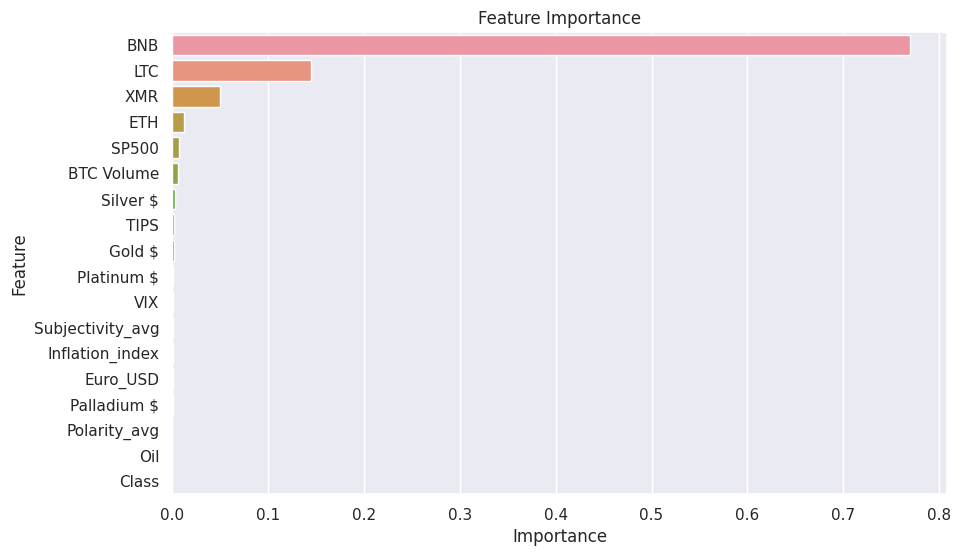

Model: RandomForestRegressor: MAE = 4026.7713366666608, MSE = 19216062.064564537


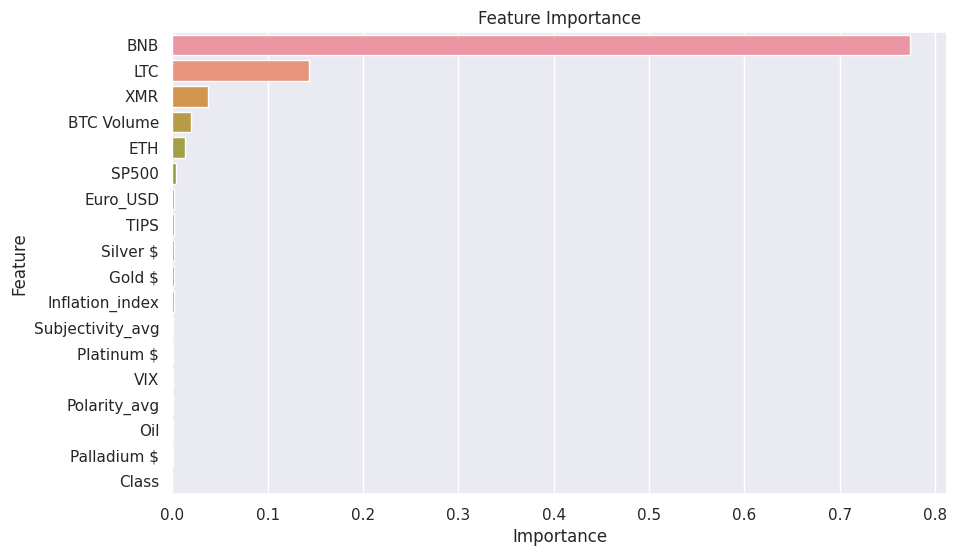

Model: GradientBoostingRegressor: MAE = 4318.254090449737, MSE = 22023426.17825272


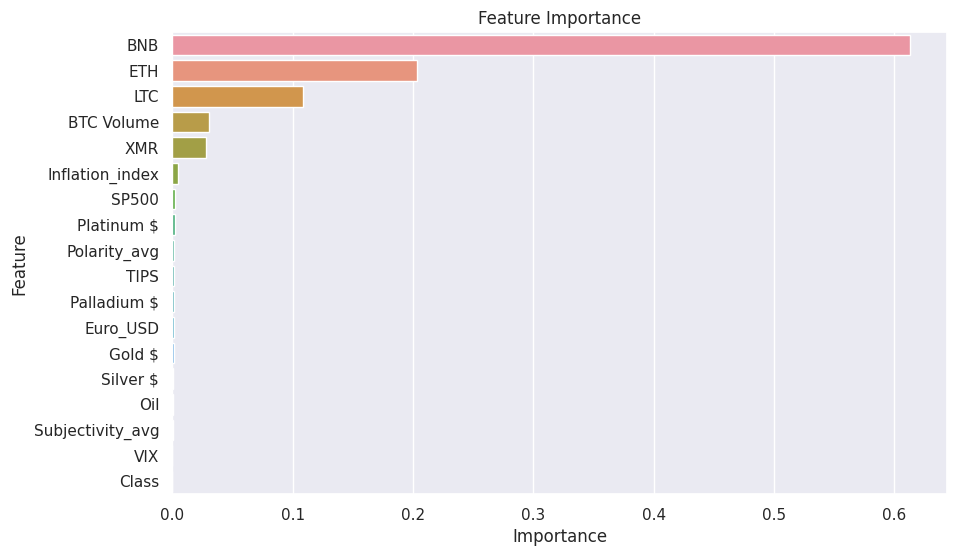

Model: LGBMRegressor: MAE = 4072.050625147944, MSE = 18558248.780035365


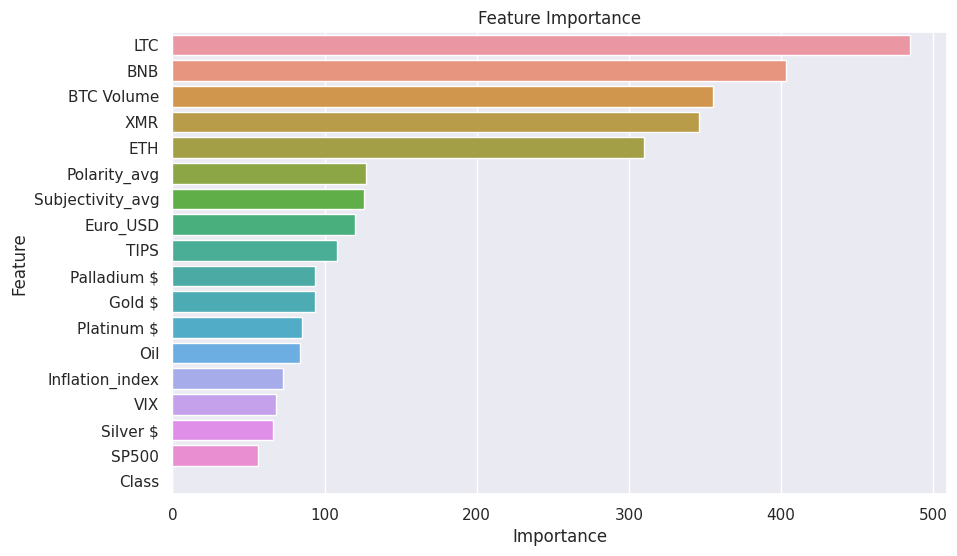

Model: XGBRegressor: MAE = 3868.336247395833, MSE = 17709254.69685309


In [ ]:
best_regressor = None
best_mae = float('inf')
best_mse = float('inf')

for model in regressor_list:
    model.fit(X_train_LR_v4, y_train_LR_v4)
    predictions = model.predict(X_test_LR_v4)

    mae = mean_absolute_error(y_test_LR_v4, predictions)
    mse = mean_squared_error(y_test_LR_v4, predictions)

    if mae < best_mae:
        best_mae = mae
        best_mse = mse
        best_regressor = model

    print(f"Model: {type(model).__name__}: MAE = {mae}, MSE = {mse}")

    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_

        importance_df = pd.DataFrame({'Feature': X_train_LR_v4.columns, 'Importance': importances})

        importance_df = importance_df.sort_values(by='Importance', ascending=False)

        plt.figure(figsize=(10, 6))
        sns.barplot(x='Importance', y='Feature', data=importance_df)
        plt.title('Feature Importance')
        plt.xlabel('Importance')
        plt.ylabel('Feature')
        plt.show()

In [ ]:
best_regressor.fit(X_train_LR_v4, y_train_LR_v4)

LinearRegression()

In [ ]:
y_pred_LR_v4 = best_regressor.predict(X_test_LR_v4)

In [ ]:
y_test_LR_v4.isnull().value_counts()

False    30
Name: BTC, dtype: int64

In [ ]:
y_pred_df_v4 = pd.DataFrame(y_pred_LR_v4, index=y_test_LR_v4.index)

print(y_pred_df_v4.index.equals(y_test_LR_v4.index))

True


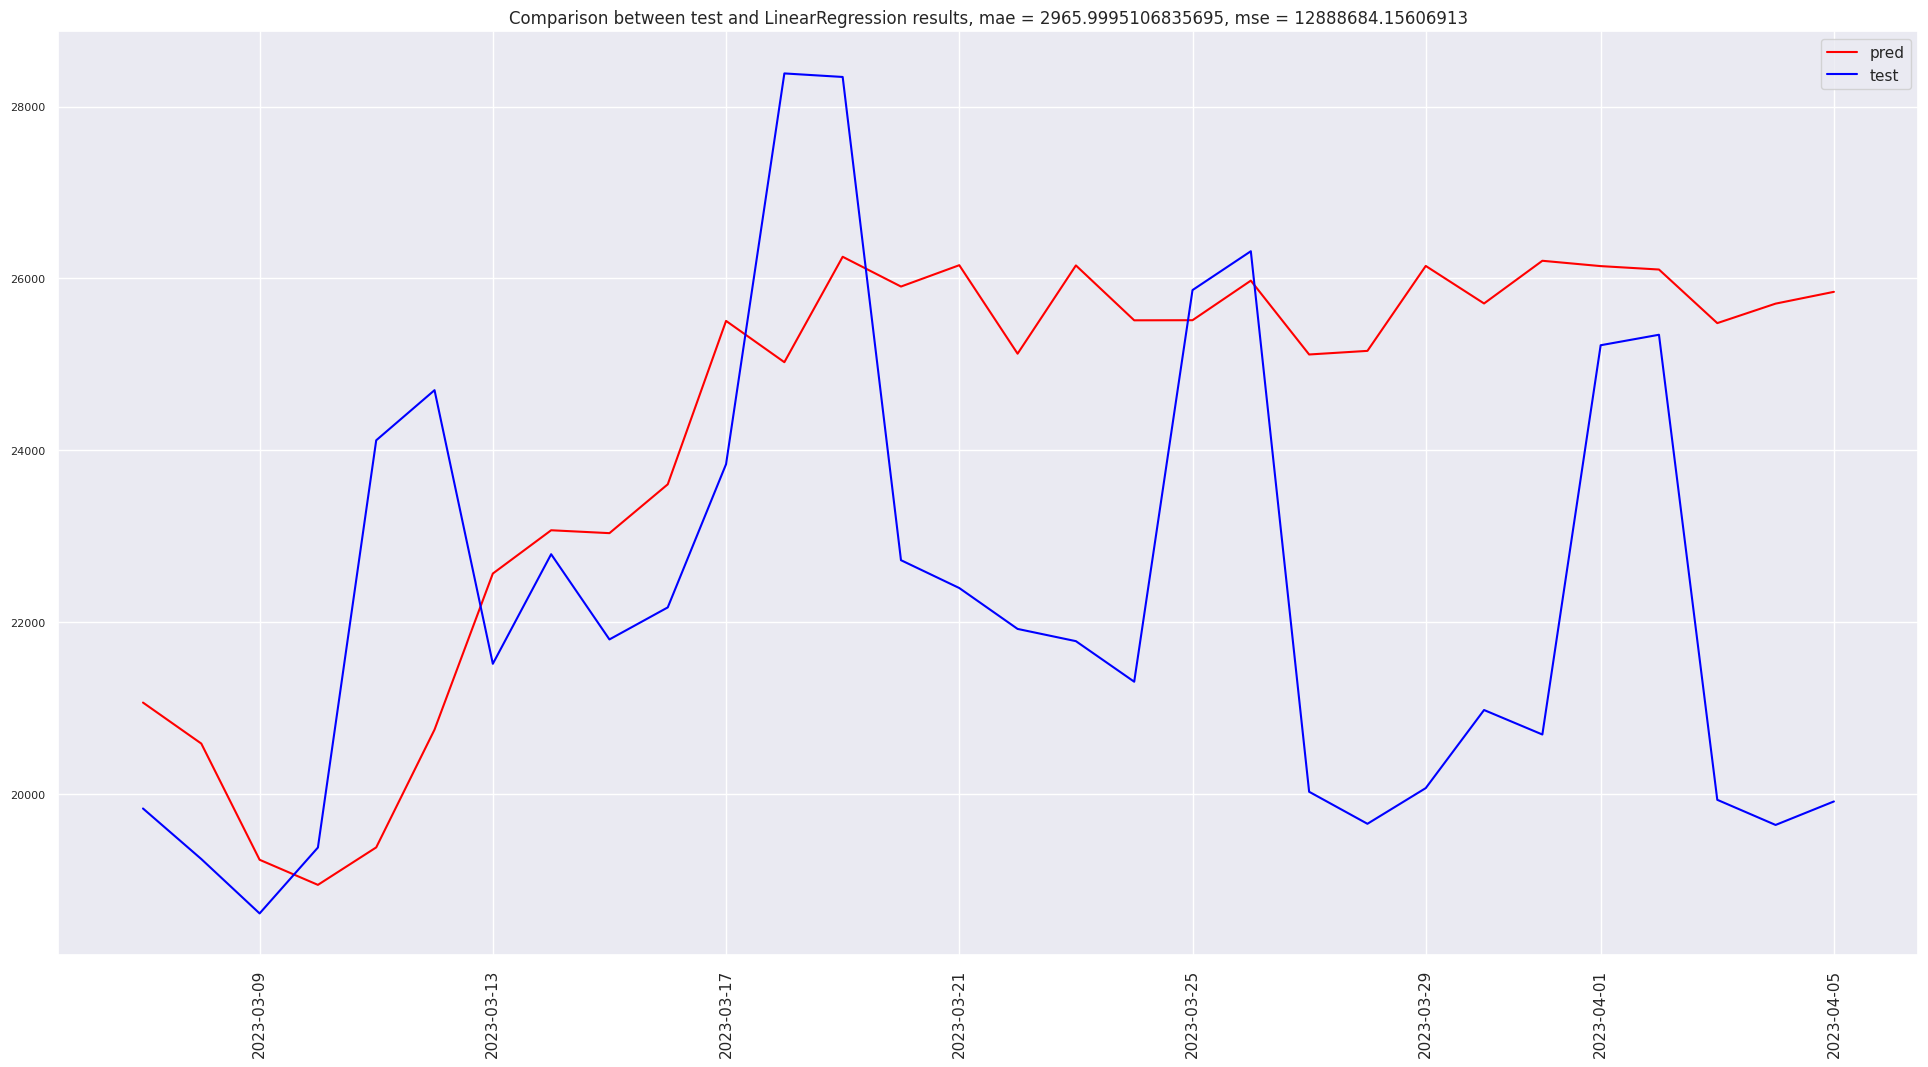

In [ ]:
fig = plt.subplots(figsize = (24, 12))
plt.plot(y_test_LR_v4, color = 'red', label = 'test')
plt.plot(y_pred_df_v4, color = 'blue', label = 'pred')

plt.legend(['pred', 'test'], loc = 'upper right')
plt.title(f'Comparison between test and {type(best_regressor).__name__} results, mae = {best_mae}, mse = {best_mse}')
plt.xticks(rotation = 90)
plt.yticks(fontsize = 8)
plt.show()

## fifth attempt
reusing the previous reduced dataset but dropping the crypto columns

In [ ]:
new_subset_df = dataset_LR.loc[(dataset_LR.index >= start_date) & (dataset_LR.index <= end_date)]

In [ ]:
display(new_subset_df.index.min(), new_subset_df.index.max())

Timestamp('2015-07-01 00:00:00')

Timestamp('2023-04-05 00:00:00')

In [ ]:
new_subset_df_v2 = new_subset_df.drop(columns = ['ETH', 'BNB', 'XMR', 'LTC'])

In [ ]:
new_subset_df_v2.head()

Oil   Gold $  Silver $  Platinum $  Palladium $  Euro_USD  TIPS  \
Date                                                                            
2015-07-01  61.65  1168.00     15.63      1082.0        699.0    1.1100   NaN   
2015-07-02  61.73  1165.25     15.61      1083.0        701.0    1.1066   NaN   
2015-07-03  59.06  1167.95     15.64      1082.0        685.0    1.1096   NaN   
2015-07-06  57.19  1166.00     15.59      1047.0        670.0    1.1008   NaN   
2015-07-07  54.72  1156.25     15.61      1046.0        661.0    1.0931   NaN   

                  VIX  Inflation_index    SP500  Polarity_avg  \
Date                                                            
2015-07-01  16.090000             1.18  2077.42        0.2500   
2015-07-02  16.790001             1.16  2076.78        0.6486   
2015-07-03  16.900001             0.00      NaN        0.3818   
2015-07-06  17.010000             1.07  2068.76       -0.1531   
2015-07-07  16.090000             1.04  2081.34       -0.7650   

            Subjectivity_avg     Class  BTC Volume     BTC  
Date                                                        
2015-07-01             0.833  positive  24278990.0  234.36  
2015-07-02             0.725  positive  19530494.0  230.43  
2015-07-03             0.698  positive  17172320.0  230.68  
2015-07-06             0.650  negative  44710569.0  243.55  
2015-07-07             0.761  negative  26124932.0  241.87

In [ ]:
numeric_dataset_LR_v5 = new_subset_df_v2.select_dtypes(include = ['number'])
categoric_dataset_LR_v5 = new_subset_df_v2.select_dtypes(exclude = ['number'])
display(new_subset_df_v2.shape, numeric_dataset_LR_v5.shape, categoric_dataset_LR_v5.shape)

(2848, 15)

(2848, 14)

(2848, 1)

In [ ]:
categoric_dataset_LR_v5.head()

Class
Date                
2015-07-01  positive
2015-07-02  positive
2015-07-03  positive
2015-07-06  negative
2015-07-07  negative

In [ ]:
categoric_dataset_LR_v5.isnull().sum()

Class    10
dtype: int64

In [ ]:
categoric_dataset_LR_v5.fillna('neutral', inplace = True)

In [ ]:
numeric_dataset_LR_v5.interpolate(inplace = True)

In [ ]:
numeric_dataset_LR_v5.fillna(0, inplace = True)

In [ ]:
oe = ce.OrdinalEncoder()
categoric_dataset_LR_v5_encoded  = oe.fit_transform(categoric_dataset_LR_v5)
categoric_dataset_LR_v5_encoded.head()

Class
Date             
2015-07-01      1
2015-07-02      1
2015-07-03      1
2015-07-06      2
2015-07-07      2

### reuiniting the dataset

In [ ]:
print(numeric_dataset_LR_v5.shape)
print(categoric_dataset_LR_v5_encoded.shape)
dataset_LR_v5 = pd.merge(numeric_dataset_LR_v5, categoric_dataset_LR_v5_encoded, left_index = True, right_index = True)
print(dataset_LR_v5.shape)

(2848, 14)
(2848, 1)
(2872, 15)


In [ ]:
df_no_duplicates_LR_v5 = dataset_LR_v5.drop_duplicates()

In [ ]:
df_no_duplicates_LR_v5.shape

(2847, 15)

In [ ]:
df_no_duplicates_LR_v5.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2847 entries, 2015-07-01 to 2023-04-05
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Oil               2847 non-null   float64
 1   Gold $            2847 non-null   float64
 2   Silver $          2847 non-null   float64
 3   Platinum $        2847 non-null   float64
 4   Palladium $       2847 non-null   float64
 5   Euro_USD          2847 non-null   float64
 6   TIPS              2847 non-null   float64
 7   VIX               2847 non-null   float64
 8   Inflation_index   2847 non-null   float64
 9   SP500             2847 non-null   float64
 10  Polarity_avg      2847 non-null   float64
 11  Subjectivity_avg  2847 non-null   float64
 12  BTC Volume        2847 non-null   float64
 13  BTC               2847 non-null   float64
 14  Class             2847 non-null   int64  
dtypes: float64(14), int64(1)
memory usage: 355.9 KB


### splitting the dataset into train and test sets

In [ ]:
X_train_LR_v5, y_train_LR_v5 = df_no_duplicates_LR_v5.drop(columns = 'BTC').iloc[:2817], df_no_duplicates_LR_v5['BTC'].iloc[:2817]
X_test_LR_v5, y_test_LR_v5 = df_no_duplicates_LR_v5.drop(columns = 'BTC').iloc[-30:], df_no_duplicates_LR_v5['BTC'].iloc[-30:]

In [ ]:
display(X_train_LR_v5.shape, y_train_LR_v5.shape, X_test_LR_v5.shape, y_test_LR_v5.shape)

(2817, 14)

(2817,)

(30, 14)

(30,)

In [ ]:
X_train_LR_v5.tail()

Oil   Gold $  Silver $  Platinum $  Palladium $  Euro_USD  \
Date                                                                      
2023-03-02  84.15  1836.20    20.800       953.0       1421.0    1.0605   
2023-03-03  85.74  1841.15    21.090       978.0       1451.0    1.0615   
2023-03-04  85.89  1070.10    13.930       895.0        558.0    1.0952   
2023-03-05  85.89  1070.10    13.930       895.0        558.0    1.0952   
2023-03-06  85.86  1849.05    21.085       965.0       1420.0    1.0646   

              TIPS        VIX  Inflation_index    SP500  Polarity_avg  \
Date                                                                    
2023-03-02   99.66  19.590000             1.63  3981.35      0.113271   
2023-03-03  100.25  18.490000             1.49  4045.64     -0.077217   
2023-03-04   95.11  24.860000             0.00  2078.36      0.248980   
2023-03-05   95.11  24.860000             0.00  2078.36     -0.215813   
2023-03-06  100.11  18.610001             1.54  4048.42      0.016339   

            Subjectivity_avg    BTC Volume  Class  
Date                                               
2023-03-02          0.845828  1.910868e+10      1  
2023-03-03          0.852244  2.459092e+10      2  
2023-03-04          0.812800  1.049289e+10      1  
2023-03-05          0.838067  1.251421e+10      2  
2023-03-06          0.865980  1.633118e+10      1

In [ ]:
X_test_LR_v5.head()

Oil   Gold $  Silver $  Platinum $  Palladium $  Euro_USD  \
Date                                                                      
2023-03-07  83.03  1826.55    20.910       957.0       1413.5    1.0665   
2023-03-08  82.10  1816.30    20.105       944.0       1407.0    1.0545   
2023-03-09  81.00  1831.40    20.120       953.0       1361.0    1.0554   
2023-03-10  82.30  1861.25    20.090       970.5       1389.0    1.0586   
2023-03-11  85.89  1070.10    13.930       895.0        558.0    1.0952   

              TIPS        VIX  Inflation_index    SP500  Polarity_avg  \
Date                                                                    
2023-03-07   99.43  19.590000             1.56  3986.37      0.088627   
2023-03-08   99.06  19.110001             1.62  3992.01      0.130908   
2023-03-09   99.29  22.610001             1.63  3918.32      0.118535   
2023-03-10  100.19  24.799999             1.45  3861.59      0.063520   
2023-03-11   95.11  24.860000             0.00  2078.36     -0.091172   

            Subjectivity_avg    BTC Volume  Class  
Date                                               
2023-03-07          0.852364  2.130291e+10      1  
2023-03-08          0.869000  2.136503e+10      1  
2023-03-09          0.831122  2.878412e+10      1  
2023-03-10          0.831391  3.738717e+10      1  
2023-03-11          0.818690  2.832100e+10      2

Model: LinearRegression: MAE = 6015.031077008302, MSE = 52238848.81058172
Model: DecisionTreeRegressor: MAE = 10094.012333333336, MSE = 140146537.87925667


Model: RandomForestRegressor: MAE = 6110.229786666668, MSE = 59465847.808608346


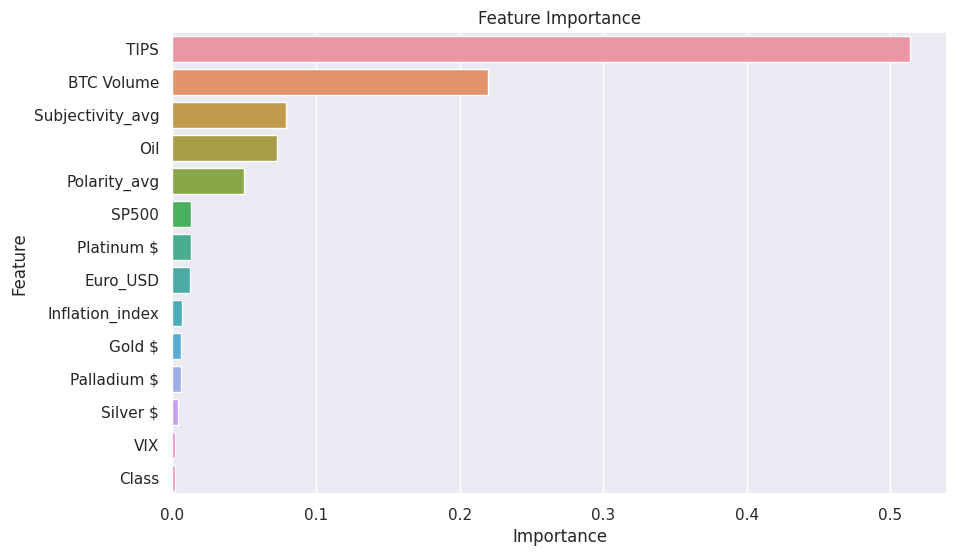

Model: GradientBoostingRegressor: MAE = 8091.650838167092, MSE = 80672587.08259955


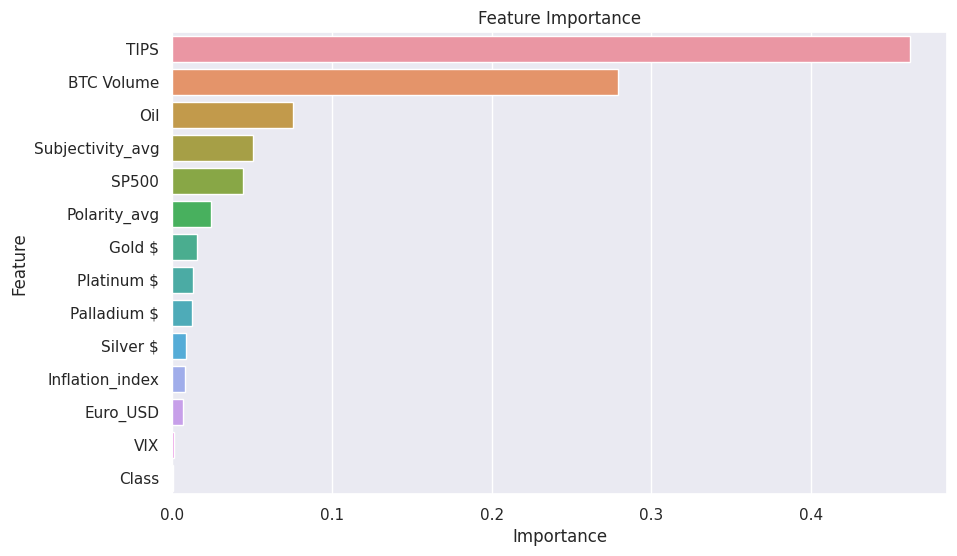

Model: LGBMRegressor: MAE = 6706.630866595477, MSE = 64586587.14649074


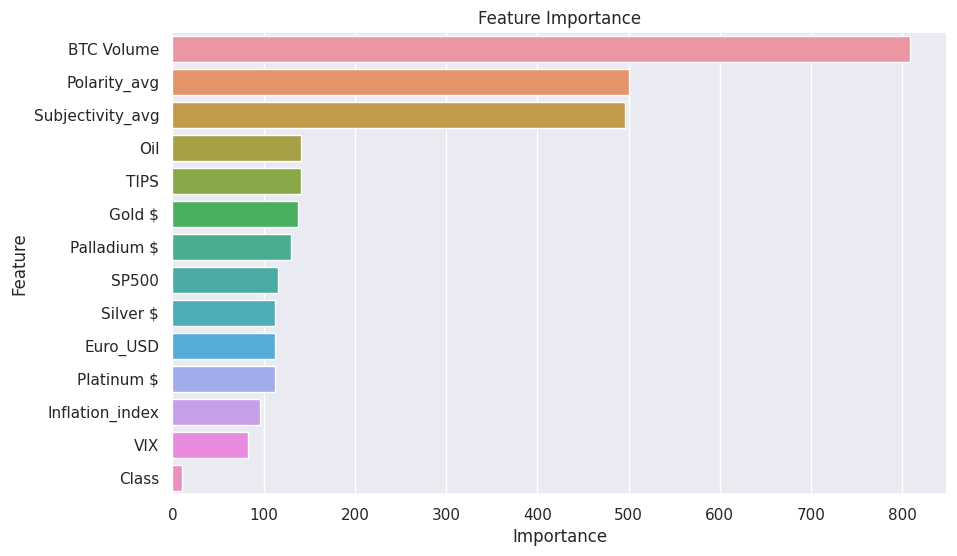

Model: XGBRegressor: MAE = 6452.324028645832, MSE = 59166194.284365885


In [ ]:
best_regressor = None
best_mae = float('inf')
best_mse = float('inf')

for model in regressor_list:
    model.fit(X_train_LR_v5, y_train_LR_v5)
    predictions = model.predict(X_test_LR_v5)

    mae = mean_absolute_error(y_test_LR_v5, predictions)
    mse = mean_squared_error(y_test_LR_v5, predictions)

    if mae < best_mae:
        best_mae = mae
        best_mse = mse
        best_regressor = model

    print(f"Model: {type(model).__name__}: MAE = {mae}, MSE = {mse}")

    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_

        importance_df = pd.DataFrame({'Feature': X_train_LR_v5.columns, 'Importance': importances})

        importance_df = importance_df.sort_values(by='Importance', ascending=False)

        plt.figure(figsize=(10, 6))
        sns.barplot(x='Importance', y='Feature', data=importance_df)
        plt.title('Feature Importance')
        plt.xlabel('Importance')
        plt.ylabel('Feature')
        plt.show()

In [ ]:
best_regressor.fit(X_train_LR_v5, y_train_LR_v5)

LinearRegression()

In [ ]:
y_pred_LR_v5 = best_regressor.predict(X_test_LR_v5)

In [ ]:
y_test_LR_v5.isnull().value_counts()

False    30
Name: BTC, dtype: int64

In [ ]:
y_pred_df_v5 = pd.DataFrame(y_pred_LR_v5, index=y_test_LR_v5.index)

print(y_pred_df_v5.index.equals(y_test_LR_v5.index))

True


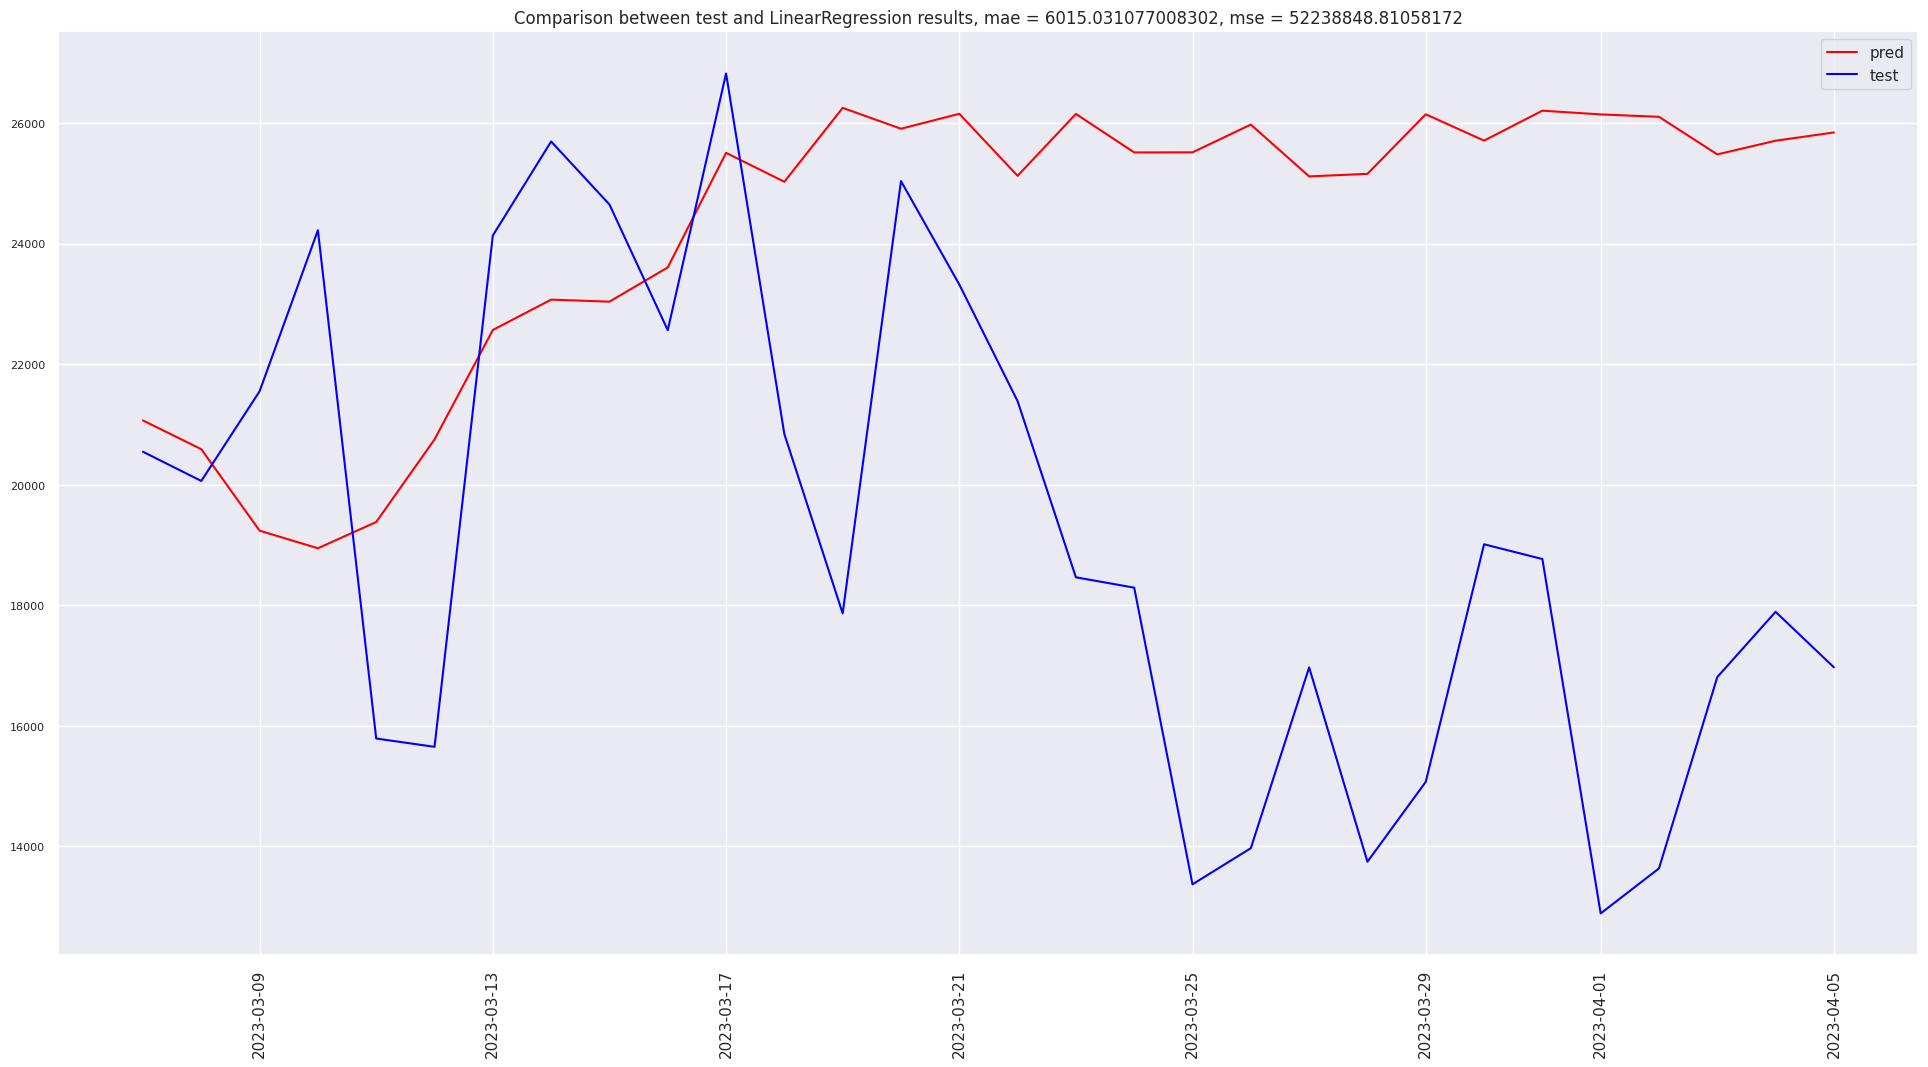

In [ ]:
fig = plt.subplots(figsize = (24, 12))
plt.plot(y_test_LR_v5, color = 'red', label = 'test')
plt.plot(y_pred_df_v5, color = 'blue', label = 'pred')

plt.legend(['pred', 'test'], loc = 'upper right')
plt.title(f'Comparison between test and {type(best_regressor).__name__} results, mae = {best_mae}, mse = {best_mse}')
plt.xticks(rotation = 90)
plt.yticks(fontsize = 8)
plt.show()

## sixth attempt
reusing the previous reduced dataset but dropping the crypto columns and class column

In [ ]:
start_date = pd.to_datetime('2015-07-01')
end_date = pd.to_datetime('2023-04-05')
display(start_date, end_date)

Timestamp('2015-07-01 00:00:00')

Timestamp('2023-04-05 00:00:00')

In [ ]:
dataset_LR.head()

Oil   Gold $  Silver $  Platinum $  Palladium $  Euro_USD  TIPS  \
Date                                                                            
2010-07-13  76.45  1216.00     18.00      1534.0        463.0    1.2569   NaN   
2010-07-14  76.63  1207.00     18.29      1523.0        465.0    1.2703   NaN   
2010-07-15  75.52  1208.00     18.42      1530.0        470.0    1.2828   NaN   
2010-07-16  75.55  1189.25     18.25      1512.0        456.0    1.3000   NaN   
2010-07-19  76.29  1181.00     17.78      1499.0        447.0    1.2957   NaN   

                  VIX  Inflation_index  BNB  LTC  XMR  ETH    SP500  \
Date                                                                  
2010-07-13  24.559999             1.87  NaN  NaN  NaN  NaN  1095.34   
2010-07-14  24.889999             1.83  NaN  NaN  NaN  NaN  1095.17   
2010-07-15  25.139999             1.82  NaN  NaN  NaN  NaN  1096.48   
2010-07-16  26.250000             1.88  NaN  NaN  NaN  NaN  1064.88   
2010-07-19  25.969999             1.95  NaN  NaN  NaN  NaN  1071.25   

            Polarity_avg  Subjectivity_avg Class  BTC Volume   BTC  
Date                                                                
2010-07-13           NaN               NaN   NaN        59.0  0.05  
2010-07-14           NaN               NaN   NaN       242.0  0.05  
2010-07-15           NaN               NaN   NaN       413.0  0.05  
2010-07-16           NaN               NaN   NaN       461.0  0.06  
2010-07-19           NaN               NaN   NaN       531.0  0.07

In [ ]:
new_subset_df = dataset_LR.loc[(dataset_LR.index >= start_date) & (dataset_LR.index <= end_date)]

In [ ]:
display(new_subset_df.index.min(), new_subset_df.index.max())

Timestamp('2015-07-01 00:00:00')

Timestamp('2023-04-05 00:00:00')

In [ ]:
new_subset_df_v3 = new_subset_df.drop(columns = ['Class'])

In [ ]:
new_subset_df_v3.head()

Oil   Gold $  Silver $  Platinum $  Palladium $  Euro_USD  TIPS  \
Date                                                                            
2015-07-01  61.65  1168.00     15.63      1082.0        699.0    1.1100   NaN   
2015-07-02  61.73  1165.25     15.61      1083.0        701.0    1.1066   NaN   
2015-07-03  59.06  1167.95     15.64      1082.0        685.0    1.1096   NaN   
2015-07-06  57.19  1166.00     15.59      1047.0        670.0    1.1008   NaN   
2015-07-07  54.72  1156.25     15.61      1046.0        661.0    1.0931   NaN   

                  VIX  Inflation_index  BNB   LTC   XMR  ETH    SP500  \
Date                                                                    
2015-07-01  16.090000             1.18  NaN  3.56  0.45  NaN  2077.42   
2015-07-02  16.790001             1.16  NaN  3.67  0.44  NaN  2076.78   
2015-07-03  16.900001             0.00  NaN  3.70  0.44  NaN      NaN   
2015-07-06  17.010000             1.07  NaN  4.90  0.46  NaN  2068.76   
2015-07-07  16.090000             1.04  NaN  4.76  0.47  NaN  2081.34   

            Polarity_avg  Subjectivity_avg  BTC Volume     BTC  
Date                                                            
2015-07-01        0.2500             0.833  24278990.0  234.36  
2015-07-02        0.6486             0.725  19530494.0  230.43  
2015-07-03        0.3818             0.698  17172320.0  230.68  
2015-07-06       -0.1531             0.650  44710569.0  243.55  
2015-07-07       -0.7650             0.761  26124932.0  241.87

In [ ]:
numeric_dataset_LR_v6 = new_subset_df_v3.copy()

In [ ]:
numeric_dataset_LR_v6.interpolate(inplace = True)

In [ ]:
numeric_dataset_LR_v6.fillna(0, inplace = True)

In [ ]:
dataset_LR_v6 = numeric_dataset_LR_v6.copy()
print(dataset_LR_v6.shape)

(2848, 18)


In [ ]:
df_no_duplicates_LR_v6 = dataset_LR_v6.drop_duplicates()

In [ ]:
df_no_duplicates_LR_v6.shape

(2847, 18)

In [ ]:
df_no_duplicates_LR_v6.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2847 entries, 2015-07-01 to 2015-07-04
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Oil               2847 non-null   float64
 1   Gold $            2847 non-null   float64
 2   Silver $          2847 non-null   float64
 3   Platinum $        2847 non-null   float64
 4   Palladium $       2847 non-null   float64
 5   Euro_USD          2847 non-null   float64
 6   TIPS              2847 non-null   float64
 7   VIX               2847 non-null   float64
 8   Inflation_index   2847 non-null   float64
 9   BNB               2847 non-null   float64
 10  LTC               2847 non-null   float64
 11  XMR               2847 non-null   float64
 12  ETH               2847 non-null   float64
 13  SP500             2847 non-null   float64
 14  Polarity_avg      2847 non-null   float64
 15  Subjectivity_avg  2847 non-null   float64
 16  BTC Volume        2847 n

## Saving the dataframe to drive

In [ ]:
def save_dataframe_to_csv(df, file_path):
    df.to_csv(file_path, index = True)

file_path = '/content/drive/MyDrive/Final project/processed_dataset.csv'

save_dataframe_to_csv(df_no_duplicates_LR_v6, file_path)

### splitting the dataset into train and test sets

In [ ]:
X_train_LR_v6, y_train_LR_v6 = df_no_duplicates_LR_v6.drop(columns = 'BTC').iloc[:2817], df_no_duplicates_LR_v6['BTC'].iloc[:2817]
X_test_LR_v6, y_test_LR_v6 = df_no_duplicates_LR_v6.drop(columns = 'BTC').iloc[-30:], df_no_duplicates_LR_v6['BTC'].iloc[-30:]

In [ ]:
display(X_train_LR_v6.shape, y_train_LR_v6.shape, X_test_LR_v6.shape, y_test_LR_v6.shape)

(2817, 13)

(2817,)

(30, 13)

(30,)

In [ ]:
X_train_LR_v6.tail()

Oil  Gold $  Silver $  Platinum $  Palladium $  Euro_USD   TIPS  \
Date                                                                            
2015-10-31  85.89  1070.1     13.93       895.0        558.0    1.0952  95.11   
2015-10-25  85.89  1070.1     13.93       895.0        558.0    1.0952  95.11   
2015-10-24  85.89  1070.1     13.93       895.0        558.0    1.0952  95.11   
2015-10-18  85.89  1070.1     13.93       895.0        558.0    1.0952  95.11   
2015-10-17  85.89  1070.1     13.93       895.0        558.0    1.0952  95.11   

              VIX  Inflation_index    SP500  Polarity_avg  Subjectivity_avg  \
Date                                                                          
2015-10-31  24.86              0.0  2078.36      -0.23195            0.6995   
2015-10-25  24.86              0.0  2078.36       0.64860            0.8190   
2015-10-24  24.86              0.0  2078.36       0.00000            1.0000   
2015-10-18  24.86              0.0  2078.36       0.36345            0.8820   
2015-10-17  24.86              0.0  2078.36       0.73495            0.7760   

            BTC Volume  
Date                    
2015-10-31  44156006.0  
2015-10-25  41496868.0  
2015-10-24  23547608.0  
2015-10-18  19774614.0  
2015-10-17  38078096.0

In [ ]:
X_test_LR_v6.head()

Oil  Gold $  Silver $  Platinum $  Palladium $  Euro_USD   TIPS  \
Date                                                                            
2015-10-11  85.89  1070.1     13.93       895.0        558.0    1.0952  95.11   
2015-10-10  85.89  1070.1     13.93       895.0        558.0    1.0952  95.11   
2015-10-04  85.89  1070.1     13.93       895.0        558.0    1.0952  95.11   
2015-10-03  85.89  1070.1     13.93       895.0        558.0    1.0952  95.11   
2015-09-27  85.89  1070.1     13.93       895.0        558.0    1.0952  95.11   

              VIX  Inflation_index    SP500  Polarity_avg  Subjectivity_avg  \
Date                                                                          
2015-10-11  24.86              0.0  2078.36       0.00000            1.0000   
2015-10-10  24.86              0.0  2078.36       0.10775            0.8920   
2015-10-04  24.86              0.0  2078.36       0.67325            0.7495   
2015-10-03  24.86              0.0  2078.36       0.40630            0.8890   
2015-09-27  24.86              0.0  2078.36      -0.29970            0.7885   

            BTC Volume  
Date                    
2015-10-11  14816677.0  
2015-10-10  14011359.0  
2015-10-04  11597966.0  
2015-10-03  14706192.0  
2015-09-27  12674205.0

Model: LinearRegression: MAE = 8206.683591112083, MSE = 68178116.59609224
Model: DecisionTreeRegressor: MAE = 49.891333333333336, MSE = 7676.278426666666


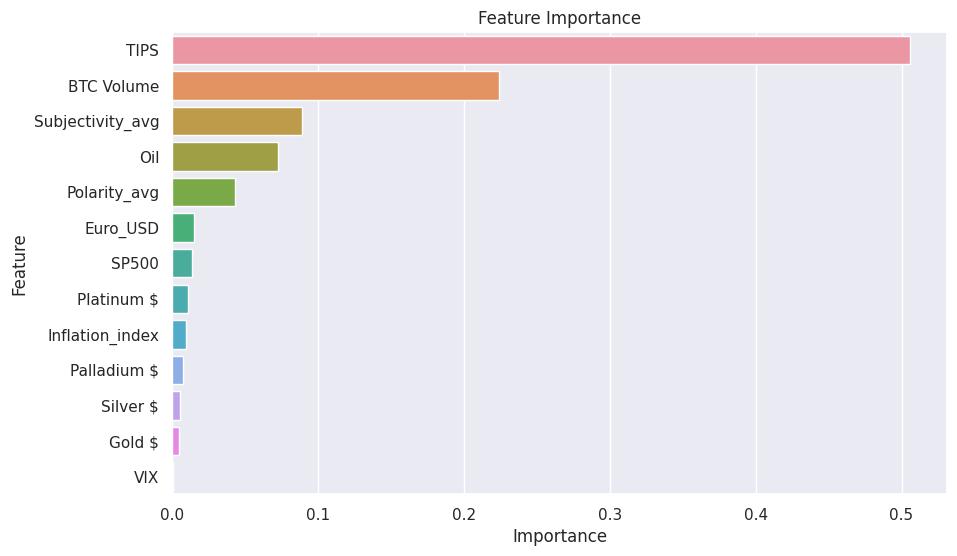

Model: RandomForestRegressor: MAE = 67.90001666666674, MSE = 7690.753568914345


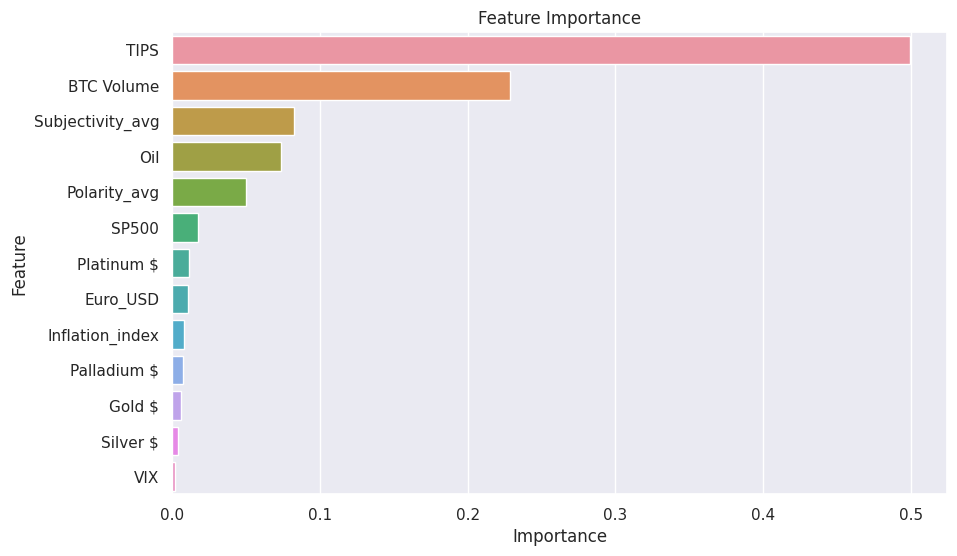

Model: GradientBoostingRegressor: MAE = 914.2382373405173, MSE = 1519239.4195948306


Model: LGBMRegressor: MAE = 263.5684176022498, MSE = 102685.10318888446


Model: XGBRegressor: MAE = 342.4384827168781, MSE = 285519.9315626629


In [ ]:
best_regressor = None
best_mae = float('inf')
best_mse = float('inf')

for model in regressor_list:
    model.fit(X_train_LR_v6, y_train_LR_v6)
    predictions = model.predict(X_test_LR_v6)

    mae = mean_absolute_error(y_test_LR_v6, predictions)
    mse = mean_squared_error(y_test_LR_v6, predictions)

    if mae < best_mae:
        best_mae = mae
        best_mse = mse
        best_regressor = model

    print(f"Model: {type(model).__name__}: MAE = {mae}, MSE = {mse}")

    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_

        importance_df = pd.DataFrame({'Feature': X_train_LR_v6.columns, 'Importance': importances})

        importance_df = importance_df.sort_values(by='Importance', ascending=False)

        plt.figure(figsize=(10, 6))
        sns.barplot(x='Importance', y='Feature', data=importance_df)
        plt.title('Feature Importance')
        plt.xlabel('Importance')
        plt.ylabel('Feature')
        plt.show()

In [ ]:
best_regressor.fit(X_train_LR_v6, y_train_LR_v6)

DecisionTreeRegressor(random_state=42)

In [ ]:
y_pred_LR_v6 = best_regressor.predict(X_test_LR_v6)

In [ ]:
y_test_LR_v6.isnull().value_counts()

False    30
Name: BTC, dtype: int64

In [ ]:
y_pred_df_v6 = pd.DataFrame(y_pred_LR_v6, index=y_test_LR_v6.index)

print(y_pred_df_v6.index.equals(y_test_LR_v6.index))

True


In [ ]:
fig = plt.subplots(figsize = (24, 12))
plt.plot(y_test_LR_v6, color = 'red', label = 'test')
plt.plot(y_pred_df_v6, color = 'blue', label = 'pred')

plt.legend(['pred', 'test'], loc = 'upper right')
plt.title(f'Comparison between test and {type(best_regressor).__name__} results, mae = {best_mae}, mse = {best_mse}')
plt.xticks(rotation = 90)
plt.yticks(fontsize = 8)
plt.show()

# Neural Network Analysis

## Using Prophet module

In [ ]:
dataset_NN = new_subset_df.copy()

In [ ]:
dataset_NN.head()

Oil   Gold $  Silver $  Platinum $  Palladium $  Euro_USD  TIPS  \
Date                                                                            
2015-07-01  61.65  1168.00     15.63      1082.0        699.0    1.1100   NaN   
2015-07-02  61.73  1165.25     15.61      1083.0        701.0    1.1066   NaN   
2015-07-03  59.06  1167.95     15.64      1082.0        685.0    1.1096   NaN   
2015-07-06  57.19  1166.00     15.59      1047.0        670.0    1.1008   NaN   
2015-07-07  54.72  1156.25     15.61      1046.0        661.0    1.0931   NaN   

                  VIX  Inflation_index  BNB   LTC   XMR  ETH    SP500  \
Date                                                                    
2015-07-01  16.090000             1.18  NaN  3.56  0.45  NaN  2077.42   
2015-07-02  16.790001             1.16  NaN  3.67  0.44  NaN  2076.78   
2015-07-03  16.900001             0.00  NaN  3.70  0.44  NaN      NaN   
2015-07-06  17.010000             1.07  NaN  4.90  0.46  NaN  2068.76   
2015-07-07  16.090000             1.04  NaN  4.76  0.47  NaN  2081.34   

            Polarity_avg  Subjectivity_avg     Class  BTC Volume     BTC  
Date                                                                      
2015-07-01        0.2500             0.833  positive  24278990.0  234.36  
2015-07-02        0.6486             0.725  positive  19530494.0  230.43  
2015-07-03        0.3818             0.698  positive  17172320.0  230.68  
2015-07-06       -0.1531             0.650  negative  44710569.0  243.55  
2015-07-07       -0.7650             0.761  negative  26124932.0  241.87

In [ ]:
display((dataset_NN.isnull().sum() * 100 / len(dataset_NN)).sort_values(ascending = False), dataset_NN.isnull().sum().sort_values(ascending = False))

TIPS                41.608146
SP500               30.933989
Silver $            30.582865
Platinum $          30.582865
Palladium $         30.582865
Gold $              30.582865
ETH                 30.021067
Euro_USD            29.599719
Oil                 28.932584
VIX                 28.441011
Inflation_index     28.441011
BNB                 26.544944
Polarity_avg         0.351124
Subjectivity_avg     0.351124
Class                0.351124
XMR                  0.000000
LTC                  0.000000
BTC Volume           0.000000
BTC                  0.000000
dtype: float64

TIPS                1185
SP500                881
Silver $             871
Platinum $           871
Palladium $          871
Gold $               871
ETH                  855
Euro_USD             843
Oil                  824
VIX                  810
Inflation_index      810
BNB                  756
Polarity_avg          10
Subjectivity_avg      10
Class                 10
XMR                    0
LTC                    0
BTC Volume             0
BTC                    0
dtype: int64

In [ ]:
dataset_NN.shape

(2848, 19)

In [ ]:
numeric_dataset_NN_v1 = dataset_NN.select_dtypes(include = ['number'])
categoric_dataset_NN_v1 = dataset_NN.select_dtypes(exclude = ['number'])
display(dataset_NN.shape, numeric_dataset_NN_v1.shape, categoric_dataset_NN_v1.shape)

(2848, 19)

(2848, 18)

(2848, 1)

In [ ]:
categoric_dataset_NN_v1.head()

Class
Date                
2015-07-01  positive
2015-07-02  positive
2015-07-03  positive
2015-07-06  negative
2015-07-07  negative

In [ ]:
categoric_dataset_NN_v1.isnull().sum()

Class    10
dtype: int64

In [ ]:
categoric_dataset_NN_v1.fillna('neutral', inplace = True)

In [ ]:
numeric_dataset_NN_v1.interpolate(inplace = True)

In [ ]:
numeric_dataset_NN_v1.fillna(0, inplace = True)

In [ ]:
oe = ce.OrdinalEncoder()
categoric_dataset_NN_v1_encoded  = oe.fit_transform(categoric_dataset_NN_v1)
categoric_dataset_NN_v1_encoded.head()

Class
Date             
2015-07-01      1
2015-07-02      1
2015-07-03      1
2015-07-06      2
2015-07-07      2

### reuiniting the dataset

In [ ]:
print(numeric_dataset_NN_v1.shape)
print(categoric_dataset_NN_v1_encoded.shape)
dataset_NN_v1 = pd.merge(numeric_dataset_NN_v1, categoric_dataset_NN_v1_encoded, left_index = True, right_index = True)
print(dataset_NN_v1.shape)

(2848, 18)
(2848, 1)
(2872, 19)


In [ ]:
df_no_duplicates_NN_v1 = dataset_NN_v1.drop_duplicates()

In [ ]:
df_no_duplicates_NN_v1.shape

(2847, 19)

In [ ]:
df_no_duplicates_NN_v1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2847 entries, 2015-07-01 to 2023-04-05
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Oil               2847 non-null   float64
 1   Gold $            2847 non-null   float64
 2   Silver $          2847 non-null   float64
 3   Platinum $        2847 non-null   float64
 4   Palladium $       2847 non-null   float64
 5   Euro_USD          2847 non-null   float64
 6   TIPS              2847 non-null   float64
 7   VIX               2847 non-null   float64
 8   Inflation_index   2847 non-null   float64
 9   BNB               2847 non-null   float64
 10  LTC               2847 non-null   float64
 11  XMR               2847 non-null   float64
 12  ETH               2847 non-null   float64
 13  SP500             2847 non-null   float64
 14  Polarity_avg      2847 non-null   float64
 15  Subjectivity_avg  2847 non-null   float64
 16  BTC Volume        2847 n

In [ ]:
df_no_duplicates_NN_v1['Date'] = df_no_duplicates_NN_v1.index

In [ ]:
df_no_duplicates_NN_v1.reset_index(drop=True, inplace=True)

In [ ]:
df_no_duplicates_NN_v1.head()

Oil   Gold $  Silver $  Platinum $  Palladium $  Euro_USD   TIPS  \
0  61.65  1168.00     15.63      1082.0        699.0    1.1100   0.00   
1  61.73  1165.25     15.61      1083.0        701.0    1.1066   0.00   
2  59.06  1167.95     15.64      1082.0        685.0    1.1096   0.00   
3  85.89  1070.10     13.93       895.0        558.0    1.0952  95.11   
4  85.89  1070.10     13.93       895.0        558.0    1.0952  95.11   

         VIX  Inflation_index   BNB   LTC   XMR   ETH    SP500  Polarity_avg  \
0  16.090000             1.18  0.00  3.56  0.45  0.00  2077.42        0.2500   
1  16.790001             1.16  0.00  3.67  0.44  0.00  2076.78        0.6486   
2  16.900001             0.00  0.00  3.70  0.44  0.00  2072.77        0.3818   
3  24.860000             0.00  0.09  3.70  0.46  0.69  2078.36       -0.4404   
4  24.860000             0.00  0.09  4.50  0.47  0.69  2078.36        0.0000   

   Subjectivity_avg  BTC Volume     BTC  Class       Date  
0             0.833  24278990.0  234.36      1 2015-07-01  
1             0.725  19530494.0  230.43      1 2015-07-02  
2             0.698  17172320.0  230.68      1 2015-07-03  
3             0.868  14057235.0  234.78      2 2015-07-04  
4             1.000  39737311.0  247.33      3 2015-07-05

In [ ]:
from prophet import Prophet
import plotly.express as px

In [ ]:
df_fbP = df_no_duplicates_NN_v1.copy()

In [ ]:
df_fbP[['ds','y']] = df_fbP[['Date','BTC']]

In [ ]:
df_fbP = df_fbP.iloc[:, -2:]

In [ ]:
train_data_fbP = df_fbP.iloc[:2817]
test_data_fbP = df_fbP.iloc[-30:]

In [ ]:
fig = px.line(df_fbP, x='ds', y='y')
fig.update_xaxes(title='Dates', rangeslider_visible=True)
fig.update_yaxes(title='BITCOIN Value')
fig.show()

In [ ]:
model = Prophet(daily_seasonality = True)
model.fit(train_data_fbP)
prediction = model.predict(pd.DataFrame({'ds': test_data_fbP['ds']}))

DEBUG:cmdstanpy:input tempfile: /tmp/tmprpbkijm3/xl6zsm2w.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprpbkijm3/1pxwlowz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16889', 'data', 'file=/tmp/tmprpbkijm3/xl6zsm2w.json', 'init=/tmp/tmprpbkijm3/1pxwlowz.json', 'output', 'file=/tmp/tmprpbkijm3/prophet_model0hqimaut/prophet_model-20230704043708.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:37:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:37:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
y_actual = test_data_fbP['y']
y_predicted = prediction['yhat']
y_predicted = y_predicted.astype(int)
mae_fbP = mean_absolute_error(y_actual, y_predicted)
mse_fbP = mean_squared_error(y_actual, y_predicted)

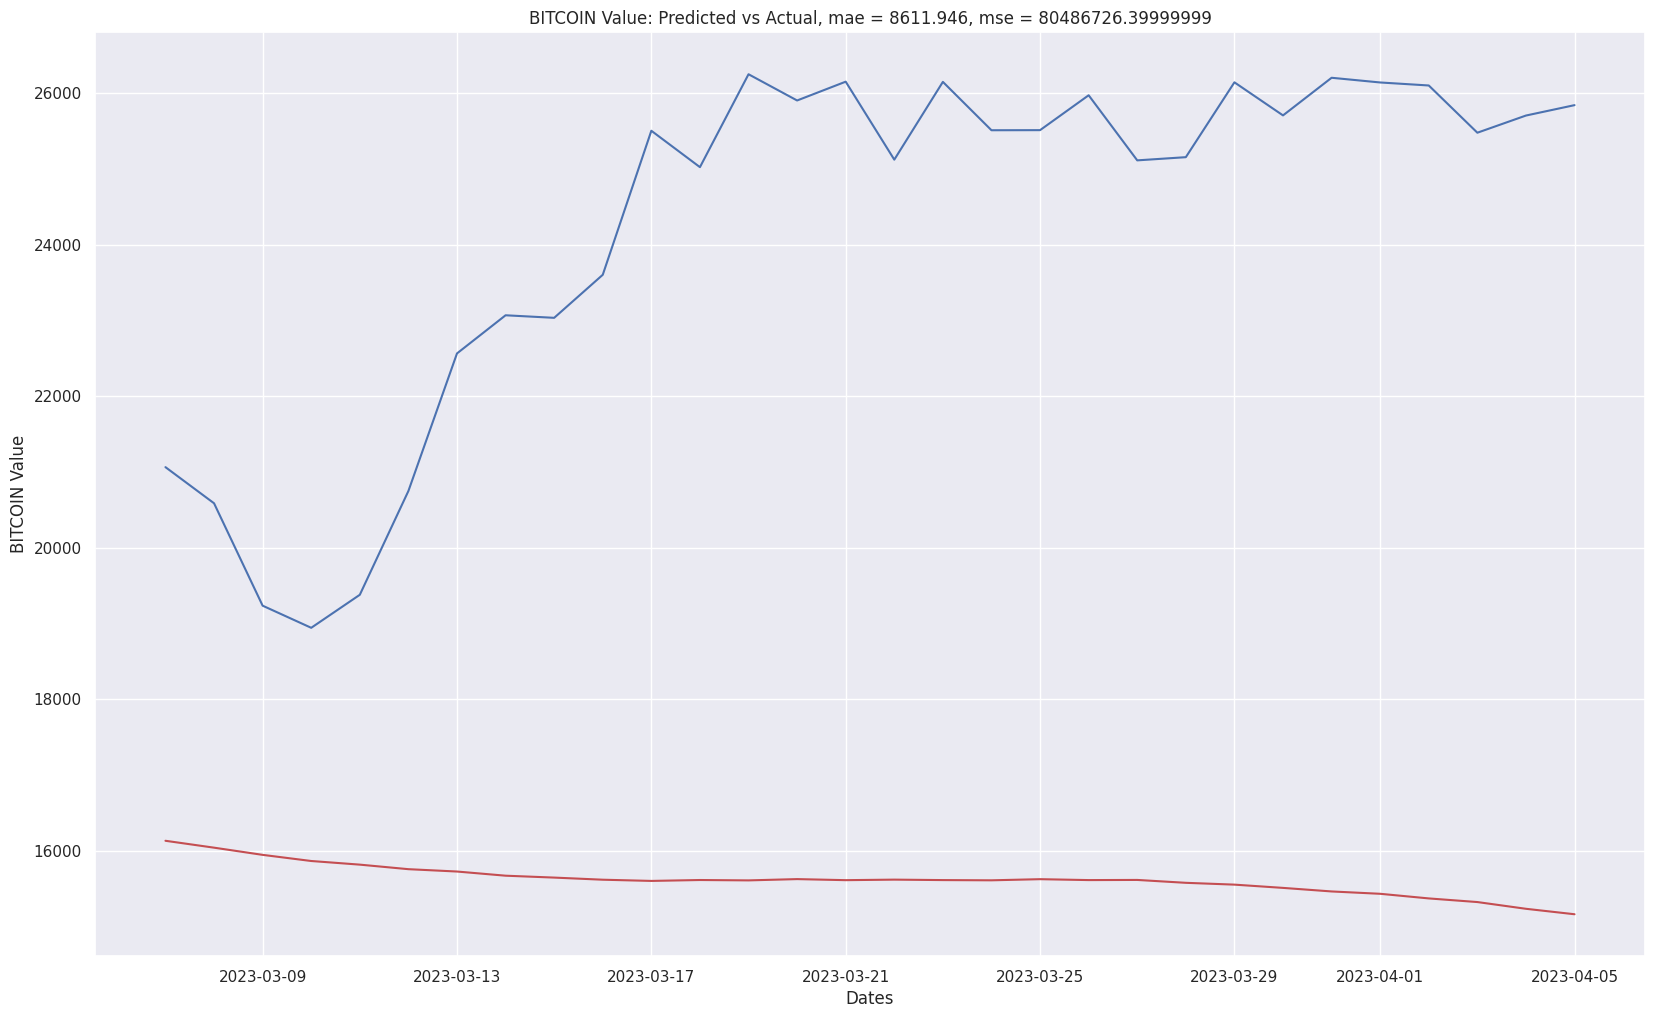

In [ ]:
plt.plot(test_data_fbP['ds'], y_predicted, 'r')
plt.plot(test_data_fbP['ds'], y_actual, 'b')
plt.xlabel('Dates')
plt.ylabel('BITCOIN Value')
plt.title(f'BITCOIN Value: Predicted vs Actual, mae = {mae_fbP}, mse = {mse_fbP}')
plt.show()

In [ ]:
model = Prophet()
model.fit(df_fbP)
future = model.make_future_dataframe(30)
forecast = model.predict(future)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmprpbkijm3/58m57nbl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprpbkijm3/wtcm91kp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=29345', 'data', 'file=/tmp/tmprpbkijm3/58m57nbl.json', 'init=/tmp/tmprpbkijm3/wtcm91kp.json', 'output', 'file=/tmp/tmprpbkijm3/prophet_model61g_k0mk/prophet_model-20230704043710.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:37:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:37:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


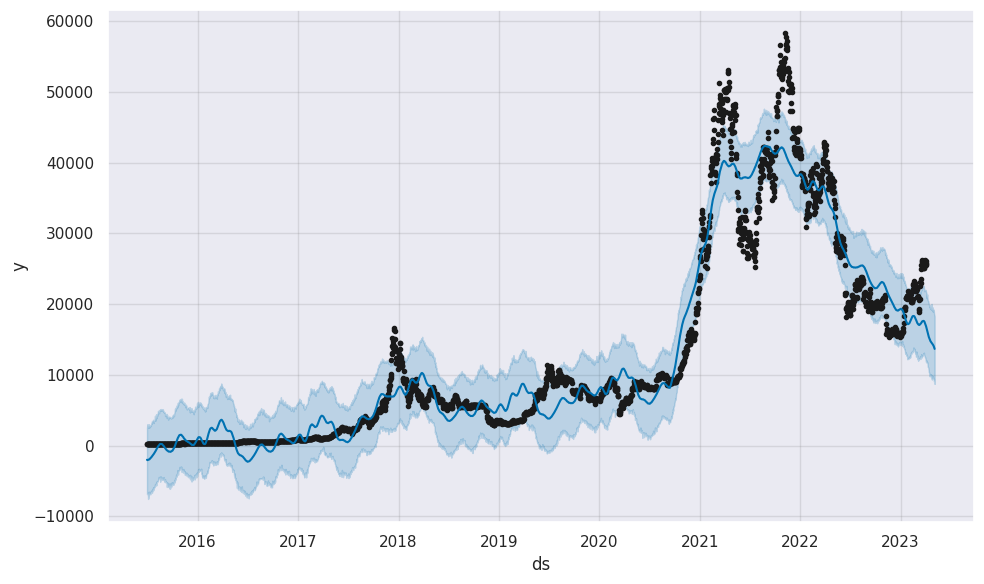

In [ ]:
model.plot(forecast)
plt.show()

## Using TensorFlow

In [ ]:
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
X_train_NN_v1, y_train_NN_v1 = df_no_duplicates_NN_v1.drop(columns = 'BTC').iloc[:2817], df_no_duplicates_NN_v1['BTC'].iloc[:2817]
X_test_NN_v1, y_test_NN_v1 = df_no_duplicates_NN_v1.drop(columns = 'BTC').iloc[-30:], df_no_duplicates_NN_v1['BTC'].iloc[-30:]

In [ ]:
display(X_train_NN_v1.shape, y_train_NN_v1.shape, X_test_NN_v1.shape, y_test_NN_v1.shape)

(2817, 19)

(2817,)

(30, 19)

(30,)

In [ ]:
display(X_train_NN_v1.info(), y_train_NN_v1.info(), X_test_NN_v1.info(), y_test_NN_v1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2817 entries, 0 to 2816
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Oil               2817 non-null   float64       
 1   Gold $            2817 non-null   float64       
 2   Silver $          2817 non-null   float64       
 3   Platinum $        2817 non-null   float64       
 4   Palladium $       2817 non-null   float64       
 5   Euro_USD          2817 non-null   float64       
 6   TIPS              2817 non-null   float64       
 7   VIX               2817 non-null   float64       
 8   Inflation_index   2817 non-null   float64       
 9   BNB               2817 non-null   float64       
 10  LTC               2817 non-null   float64       
 11  XMR               2817 non-null   float64       
 12  ETH               2817 non-null   float64       
 13  SP500             2817 non-null   float64       
 14  Polarity_avg      2817 n

None

None

None

None

In [ ]:
display((X_train_NN_v1.isnull().sum() * 100 / len(X_train_NN_v1)).sort_values(ascending = False), X_train_NN_v1.isnull().sum().sort_values(ascending = False))

Oil                 0.0
LTC                 0.0
Class               0.0
BTC Volume          0.0
Subjectivity_avg    0.0
Polarity_avg        0.0
SP500               0.0
ETH                 0.0
XMR                 0.0
BNB                 0.0
Gold $              0.0
Inflation_index     0.0
VIX                 0.0
TIPS                0.0
Euro_USD            0.0
Palladium $         0.0
Platinum $          0.0
Silver $            0.0
Date                0.0
dtype: float64

Oil                 0
LTC                 0
Class               0
BTC Volume          0
Subjectivity_avg    0
Polarity_avg        0
SP500               0
ETH                 0
XMR                 0
BNB                 0
Gold $              0
Inflation_index     0
VIX                 0
TIPS                0
Euro_USD            0
Palladium $         0
Platinum $          0
Silver $            0
Date                0
dtype: int64

In [ ]:
X_train_NN_v1.tail()

Oil   Gold $  Silver $  Platinum $  Palladium $  Euro_USD    TIPS  \
2812  84.15  1836.20    20.800       953.0       1421.0    1.0605   99.66   
2813  85.74  1841.15    21.090       978.0       1451.0    1.0615  100.25   
2814  85.89  1070.10    13.930       895.0        558.0    1.0952   95.11   
2815  85.89  1070.10    13.930       895.0        558.0    1.0952   95.11   
2816  85.86  1849.05    21.085       965.0       1420.0    1.0646  100.11   

            VIX  Inflation_index     BNB    LTC     XMR         ETH    SP500  \
2812  19.590000             1.63  283.01  89.88  142.55  653.130000  3981.35   
2813  18.490000             1.49  272.78  85.09  136.17  651.240000  4045.64   
2814  24.860000             0.00  272.05  83.91  137.86  642.029048  2078.36   
2815  24.860000             0.00  271.70  84.66  140.73  637.912143  2078.36   
2816  18.610001             1.54  269.55  81.81  144.14  649.350000  4048.42   

      Polarity_avg  Subjectivity_avg    BTC Volume  Class       Date  
2812      0.113271          0.845828  1.910868e+10      1 2023-03-02  
2813     -0.077217          0.852244  2.459092e+10      2 2023-03-03  
2814      0.248980          0.812800  1.049289e+10      1 2023-03-04  
2815     -0.215813          0.838067  1.251421e+10      2 2023-03-05  
2816      0.016339          0.865980  1.633118e+10      1 2023-03-06

In [ ]:
X_test_NN_v1.head()

Oil   Gold $  Silver $  Platinum $  Palladium $  Euro_USD    TIPS  \
2817  83.03  1826.55    20.910       957.0       1413.5    1.0665   99.43   
2818  82.10  1816.30    20.105       944.0       1407.0    1.0545   99.06   
2819  81.00  1831.40    20.120       953.0       1361.0    1.0554   99.29   
2820  82.30  1861.25    20.090       970.5       1389.0    1.0586  100.19   
2821  85.89  1070.10    13.930       895.0        558.0    1.0952   95.11   

            VIX  Inflation_index     BNB    LTC     XMR         ETH    SP500  \
2817  19.590000             1.56  274.30  81.82  142.50  647.460000  3986.37   
2818  19.110001             1.62  271.93  78.47  136.17  645.570000  3992.01   
2819  22.610001             1.63  261.94  72.48  134.68  643.680000  3918.32   
2820  24.799999             1.45  260.33  67.34  126.97  641.790000  3861.59   
2821  24.860000             0.00  261.08  65.47  132.65  633.795238  2078.36   

      Polarity_avg  Subjectivity_avg    BTC Volume  Class       Date  
2817      0.088627          0.852364  2.130291e+10      1 2023-03-07  
2818      0.130908          0.869000  2.136503e+10      1 2023-03-08  
2819      0.118535          0.831122  2.878412e+10      1 2023-03-09  
2820      0.063520          0.831391  3.738717e+10      1 2023-03-10  
2821     -0.091172          0.818690  2.832100e+10      2 2023-03-11

In [ ]:
# X_train_NN_v1, y_train_NN_v1, X_test_NN_v1, y_test_NN_v1

In [ ]:
X_train_date = pd.DataFrame(X_train_NN_v1['Date'])
X_test_date = pd.DataFrame(X_test_NN_v1['Date'])

In [ ]:
X_train_date.head()

Date
0 2015-07-01
1 2015-07-02
2 2015-07-03
3 2015-07-04
4 2015-07-05

In [ ]:
X_train_NN_v1.drop(columns = ['Date'], inplace = True)
X_test_NN_v1.drop(columns = ['Date'], inplace = True)

In [ ]:
X_train_NN_v1_aa = np.array(X_train_NN_v1)
X_test_NN_v1_aa = np.array(X_test_NN_v1)
y_train_NN_v1_aa = np.array(y_train_NN_v1)
y_test_NN_v1_aa = np.array(y_test_NN_v1)

In [ ]:
mms = MinMaxScaler()
X_train_NN_v1_aa_sc = mms.fit_transform(X_train_NN_v1_aa)
X_test_NN_v1_aa_sc = mms.transform(X_test_NN_v1_aa)

In [ ]:
num_features = len(X_train_NN_v1.columns)
neurons_per_layer = [num_features] + [2**i for i in range(1, len(X_train_NN_v1.columns))]

In [ ]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Dense(2, activation = 'relu', input_shape = (num_features,)))

for i in range(1, 14):
  model.add(tf.keras.layers.Dense(2**(i + 1), activation = 'relu'))
  model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(1, activation = 'linear'))

model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mae'])

In [ ]:
from keras.callbacks import EarlyStopping

In [ ]:
es = EarlyStopping(monitor = 'loss',
                   mode = 'min',
                   patience = 20,
                   restore_best_weights = True)

In [ ]:
import joblib
folder_path = '/content/drive/MyDrive/Final project/'

In [ ]:
num_epochs = 60

In [ ]:
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath = folder_path + 'checkpoint.h5', save_freq = 'epoch')

In [ ]:
history = model.fit(X_train_NN_v1_aa_sc, y_train_NN_v1_aa,
                    validation_data = (X_test_NN_v1_aa_sc, y_test_NN_v1_aa),
                    callbacks = [es, checkpoint_callback],
                    epochs = num_epochs,
                    batch_size = 20,
                    verbose = 1)

Epoch 1/200
141/141 [==============================] - 419s 3s/step - loss: 95676288.0000 - mae: 6704.4688 - val_loss: 175483024.0000 - val_mae: 13012.8916
Epoch 2/200
141/141 [==============================] - 400s 3s/step - loss: 83386240.0000 - mae: 6254.1860 - val_loss: 7822703.5000 - val_mae: 1805.3247
Epoch 3/200
141/141 [==============================] - 385s 3s/step - loss: 79051232.0000 - mae: 6119.6450 - val_loss: 19469222.0000 - val_mae: 3749.6638
Epoch 4/200
141/141 [==============================] - 370s 3s/step - loss: 73738504.0000 - mae: 5866.2368 - val_loss: 15333811.0000 - val_mae: 3324.8391
Epoch 5/200
141/141 [==============================] - 384s 3s/step - loss: 71152408.0000 - mae: 5685.8809 - val_loss: 20741760.0000 - val_mae: 3874.1760
Epoch 6/200
141/141 [==============================] - 379s 3s/step - loss: 66378732.0000 - mae: 5447.0005 - val_loss: 56441648.0000 - val_mae: 5617.5679
Epoch 7/200
141/141 [==============================] - 370s 3s/step - loss:

In [ ]:
model.load_weights(filepath = folder_path + 'checkpoint.h5')

In [ ]:
additional_epochs = 140

In [ ]:
history = model.fit(X_train_NN_v1_aa_sc, y_train_NN_v1_aa,
                    validation_data = (X_test_NN_v1_aa_sc, y_test_NN_v1_aa),
                    initial_epoch = num_epochs,
                    epochs = num_epochs + additional_epochs,
                    callbacks = [es, checkpoint_callback],
                    batch_size = 20,
                    verbose = 1)

Epoch 61/200
141/141 [==============================] - 634s 4s/step - loss: 43953044.0000 - mae: 4160.5664 - val_loss: 32630154.0000 - val_mae: 5062.9028
Epoch 62/200
141/141 [==============================] - 615s 4s/step - loss: 48797020.0000 - mae: 4302.2241 - val_loss: 8925634.0000 - val_mae: 2526.5322
Epoch 63/200
141/141 [==============================] - 613s 4s/step - loss: 41153156.0000 - mae: 3984.3774 - val_loss: 11408851.0000 - val_mae: 3011.8401
Epoch 64/200
141/141 [==============================] - 594s 4s/step - loss: 46087348.0000 - mae: 4132.8159 - val_loss: 33184634.0000 - val_mae: 5043.3564
Epoch 65/200
141/141 [==============================] - 589s 4s/step - loss: 46801964.0000 - mae: 4274.0576 - val_loss: 28272130.0000 - val_mae: 4644.2339
Epoch 66/200
141/141 [==============================] - 579s 4s/step - loss: 43235912.0000 - mae: 4149.5254 - val_loss: 8499701.0000 - val_mae: 2586.1602
Epoch 67/200
141/141 [==============================] - 583s 4s/step - l

### Saving the model and the results

In [ ]:
joblib.dump(model, folder_path + 'model_file.pkl')

joblib.dump(history, folder_path + 'history_file.pkl')

['/content/drive/MyDrive/Final project/history_file.pkl']

### Loading the model and the results

In [ ]:
model = joblib.load(model, folder_path + 'model_file.pkl')

results = joblib.load(history, folder_path + 'history_file.pkl')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 38        
                                                                 
 dense_1 (Dense)             (None, 4)                 12        
                                                                 
 dropout (Dropout)           (None, 4)                 0         
                                                                 
 dense_2 (Dense)             (None, 8)                 40        
                                                                 
 dropout_1 (Dropout)         (None, 8)                 0         
                                                                 
 dense_3 (Dense)             (None, 16)                144       
                                                                 
 dropout_2 (Dropout)         (None, 16)                0

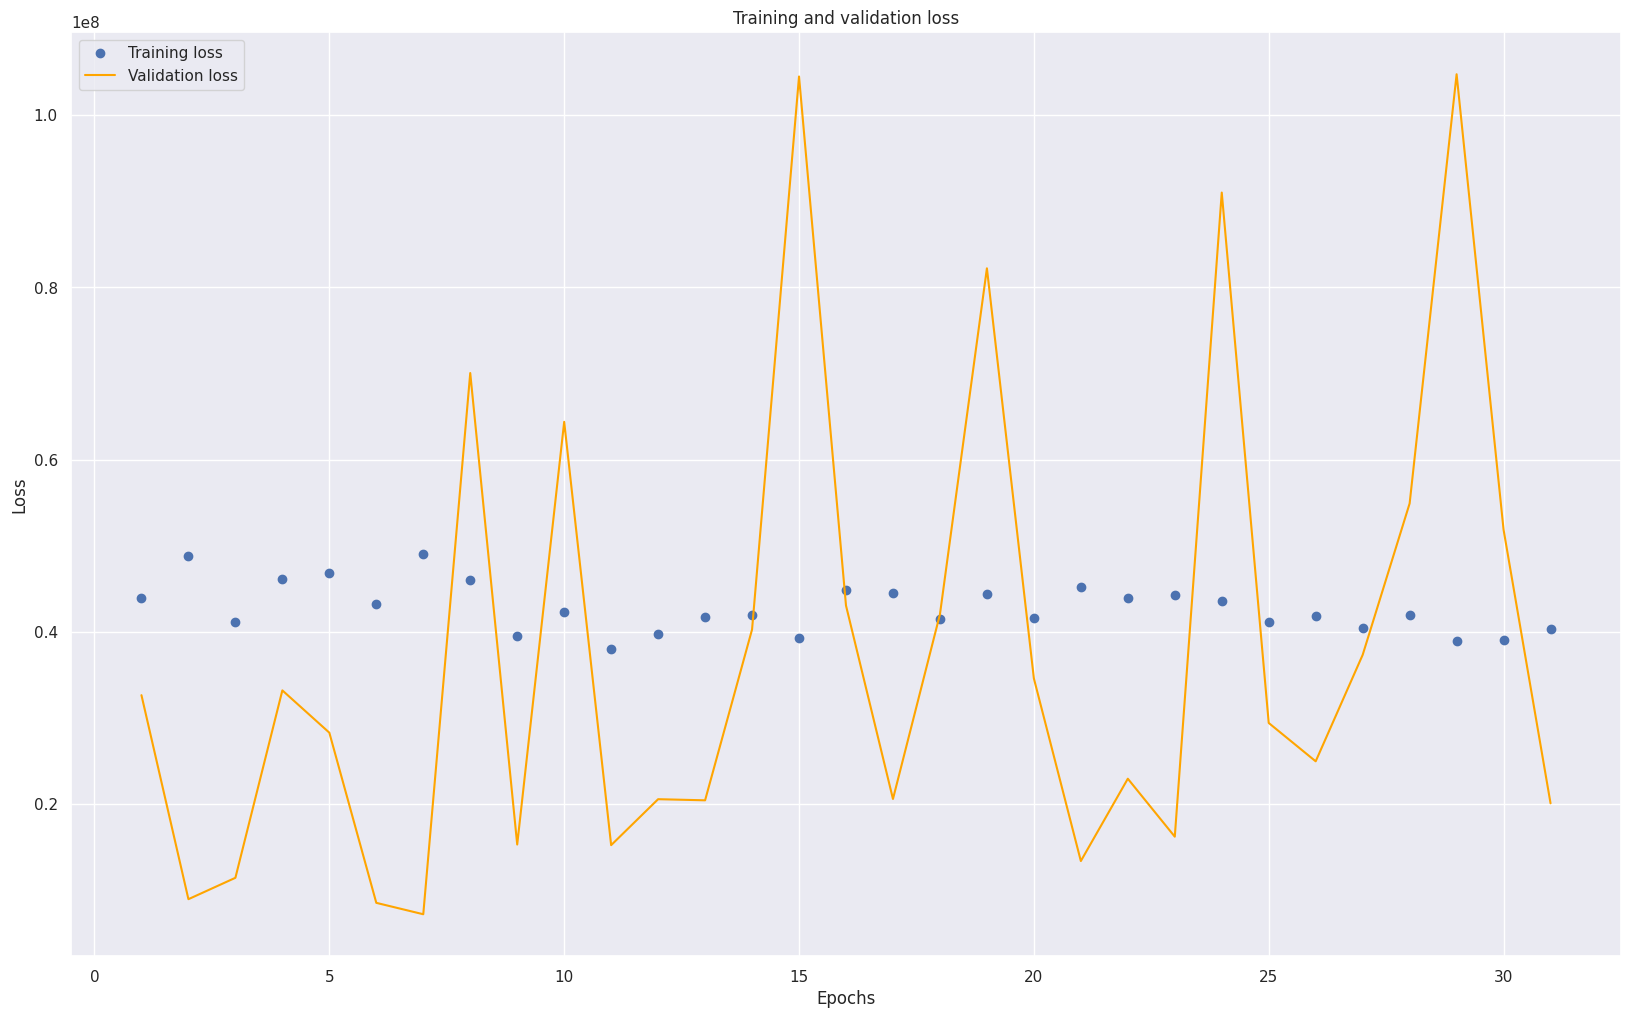

In [ ]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss_values, 'orange', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

1/1 [==============================] - 0s 399ms/step


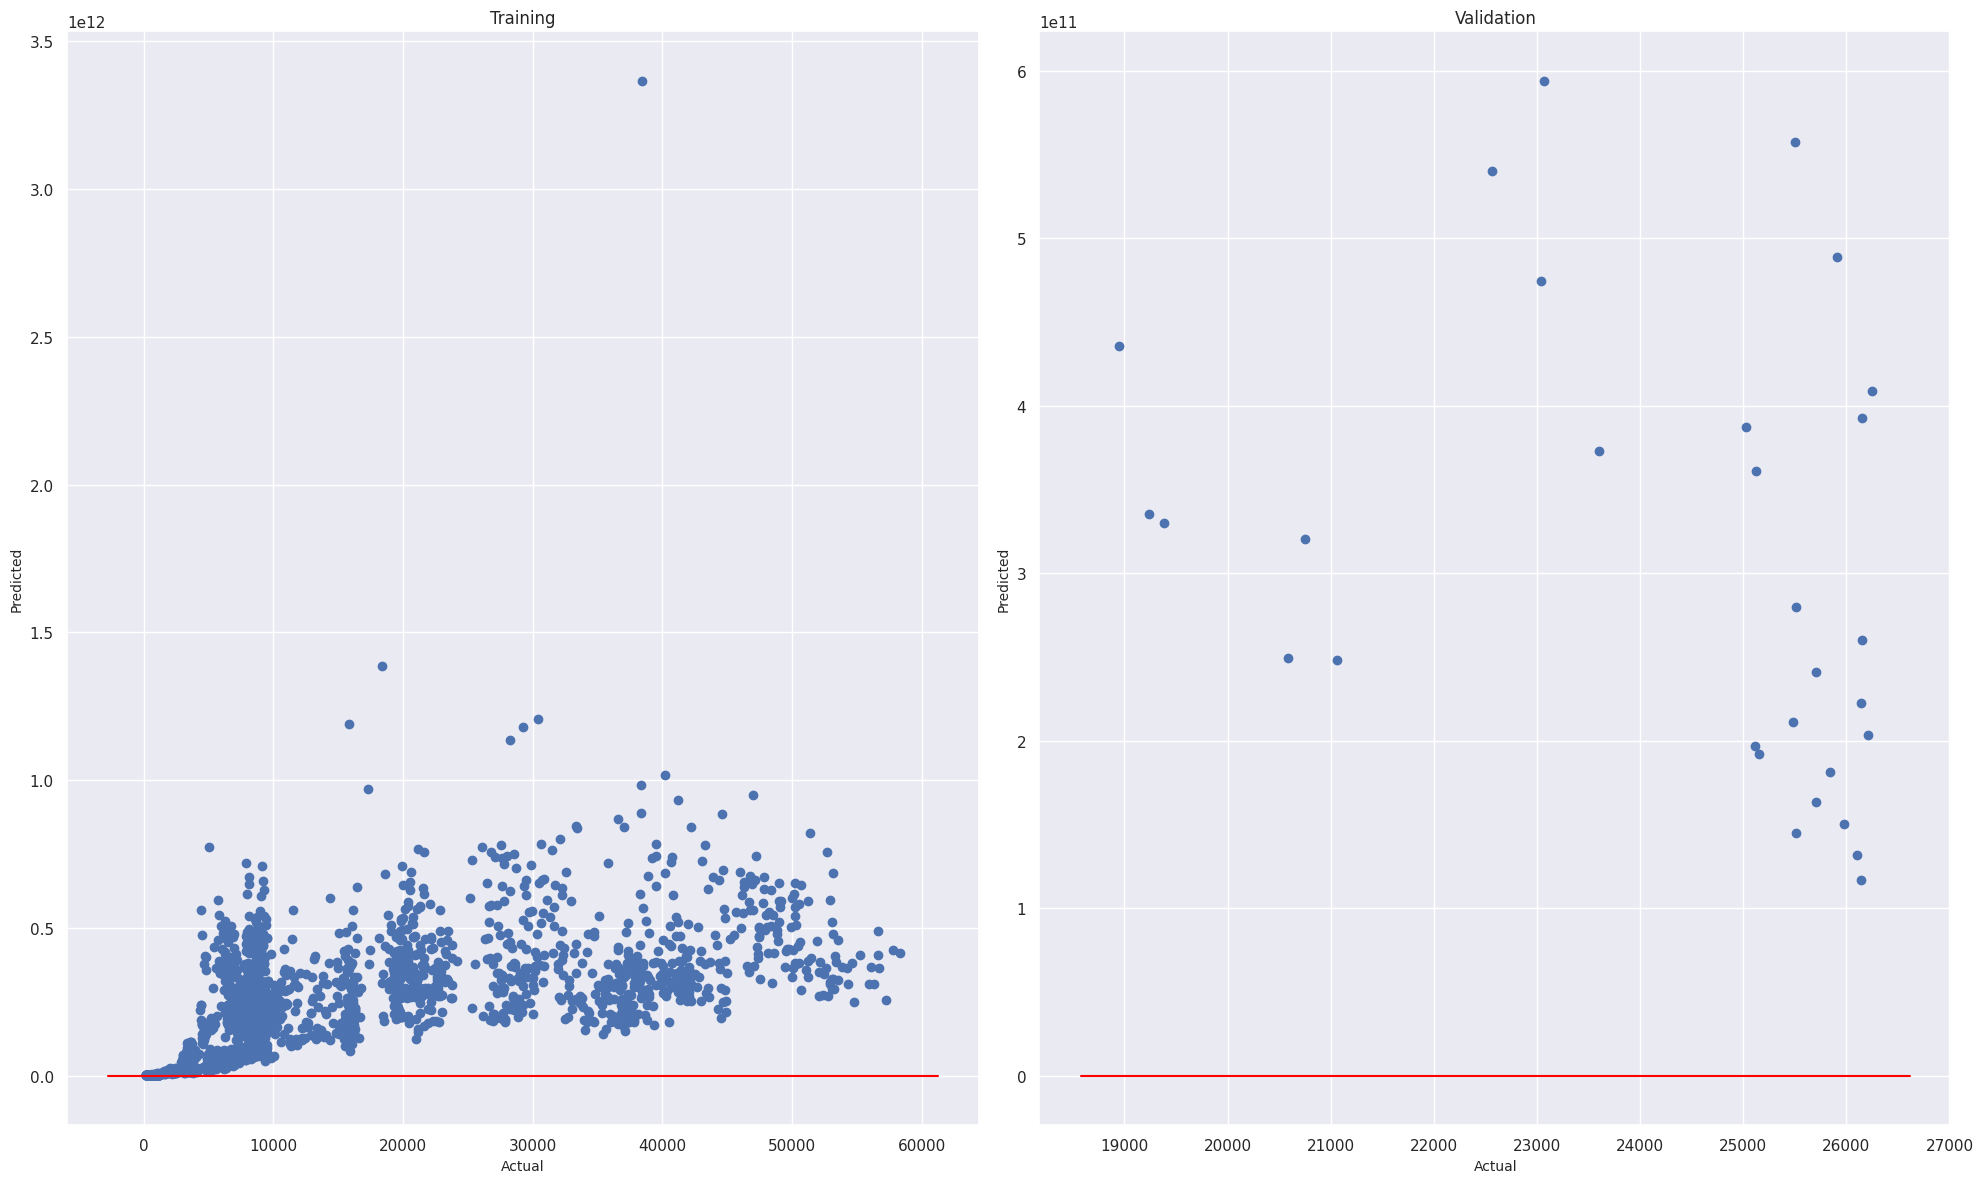

In [ ]:
# scatterplot of actual vs. pred
# specify the dimensions
fig, axes = plt.subplots(1,2) # 1 row, 2 columns

# this makes the individual subplots
# Training Results
axes[0].scatter(x = y_train_NN_v1, y = model.predict(X_train_NN_v1_aa)) #first row, first entry (left top)
axes[0].set_xlabel('Actual', fontsize = 10)
axes[0].set_ylabel('Predicted',  fontsize = 10)
axes[0].set_title('Training')
# add 45 deg line
x = np.linspace(*axes[0].get_xlim())
axes[0].plot(x, x, color='red')
# Validation Results
axes[1].scatter(x = y_test_NN_v1, y = model.predict(X_test_NN_v1_aa)) # first row, second entry (right top)
axes[1].set_xlabel('Actual', fontsize = 10)
axes[1].set_ylabel('Predicted',  fontsize = 10)
axes[1].set_title('Validation')
# add 45 deg line
x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color = 'red')

# tight layout
fig.tight_layout()

# show the plot
plt.show()

In [ ]:
# metrics
y_pred_NN_v1 = model.predict(X_test_NN_v1_aa)

trainpreds = model.predict(X_train_NN_v1_aa)

print(mean_absolute_error(y_train_NN_v1_aa, trainpreds)) # train
print(mean_absolute_error(y_test_NN_v1_aa, y_pred_NN_v1)) # test

89/89 [==============================] - 42s 474ms/step
187267980761.03888
306370909323.18726


In [ ]:
y_test_NN_v1_df = pd.DataFrame(y_test_NN_v1)

In [ ]:
X_test_NN_v1.head()

Oil   Gold $  Silver $  Platinum $  Palladium $  Euro_USD    TIPS  \
2817  83.03  1826.55    20.910       957.0       1413.5    1.0665   99.43   
2818  82.10  1816.30    20.105       944.0       1407.0    1.0545   99.06   
2819  81.00  1831.40    20.120       953.0       1361.0    1.0554   99.29   
2820  82.30  1861.25    20.090       970.5       1389.0    1.0586  100.19   
2821  85.89  1070.10    13.930       895.0        558.0    1.0952   95.11   

            VIX  Inflation_index     BNB    LTC     XMR         ETH    SP500  \
2817  19.590000             1.56  274.30  81.82  142.50  647.460000  3986.37   
2818  19.110001             1.62  271.93  78.47  136.17  645.570000  3992.01   
2819  22.610001             1.63  261.94  72.48  134.68  643.680000  3918.32   
2820  24.799999             1.45  260.33  67.34  126.97  641.790000  3861.59   
2821  24.860000             0.00  261.08  65.47  132.65  633.795238  2078.36   

      Polarity_avg  Subjectivity_avg    BTC Volume  Class  
2817      0.088627          0.852364  2.130291e+10      1  
2818      0.130908          0.869000  2.136503e+10      1  
2819      0.118535          0.831122  2.878412e+10      1  
2820      0.063520          0.831391  3.738717e+10      1  
2821     -0.091172          0.818690  2.832100e+10      2

In [ ]:
y_test_NN_v1_df.set_index(pd.to_datetime(X_test_date['Date']), inplace = True)

In [ ]:
y_pred_NN_v1_df = pd.DataFrame(y_pred_NN_v1, index = y_test_NN_v1_df.index)

print(y_pred_NN_v1_df.index.equals(y_test_NN_v1_df.index))

True


In [ ]:
y_test_NN_v1_df.head()

BTC
Date                
2023-03-07  21064.70
2023-03-08  20587.61
2023-03-09  19235.70
2023-03-10  18943.59
2023-03-11  19379.53

In [ ]:
y_pred_NN_v1_df.head()

0
Date                    
2023-03-07  2.483616e+11
2023-03-08  2.490858e+11
2023-03-09  3.355819e+11
2023-03-10  4.358811e+11
2023-03-11  3.301824e+11

In [ ]:
fig = plt.subplots(figsize = (24, 12))
plt.plot(y_test_NN_v1_df, color = 'red', label = 'test')
plt.plot(y_pred_NN_v1_df, color = 'blue', label = 'pred')

plt.legend(['pred', 'test'], loc = 'upper right')
plt.title(f'Comparison between test and Neural Network results')
plt.xticks(rotation = 90)
plt.yticks(fontsize = 8)
plt.show()

# Time Series Analysis

In [65]:
dataset_TS = pd.read_csv('/content/drive/MyDrive/Final project/processed_dataset.csv', index_col = 0, parse_dates = True)

In [66]:
dataset_TS.head()

Oil   Gold $  Silver $  Platinum $  Palladium $  Euro_USD  TIPS  \
Date                                                                            
2015-07-01  61.65  1168.00     15.63      1082.0        699.0    1.1100   0.0   
2015-07-02  61.73  1165.25     15.61      1083.0        701.0    1.1066   0.0   
2015-07-03  59.06  1167.95     15.64      1082.0        685.0    1.1096   0.0   
2015-07-06  57.19  1166.00     15.59      1047.0        670.0    1.1008   0.0   
2015-07-07  54.72  1156.25     15.61      1046.0        661.0    1.0931   0.0   

                  VIX  Inflation_index  BNB   LTC   XMR  ETH    SP500  \
Date                                                                    
2015-07-01  16.090000             1.18  0.0  3.56  0.45  0.0  2077.42   
2015-07-02  16.790001             1.16  0.0  3.67  0.44  0.0  2076.78   
2015-07-03  16.900001             0.00  0.0  3.70  0.44  0.0  2072.77   
2015-07-06  17.010000             1.07  0.0  4.90  0.46  0.0  2068.76   
2015-07-07  16.090000             1.04  0.0  4.76  0.47  0.0  2081.34   

            Polarity_avg  Subjectivity_avg  BTC Volume     BTC  
Date                                                            
2015-07-01        0.2500             0.833  24278990.0  234.36  
2015-07-02        0.6486             0.725  19530494.0  230.43  
2015-07-03        0.3818             0.698  17172320.0  230.68  
2015-07-06       -0.1531             0.650  44710569.0  243.55  
2015-07-07       -0.7650             0.761  26124932.0  241.87

In [67]:
dataset_TS.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2847 entries, 2015-07-01 to 2015-07-04
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Oil               2847 non-null   float64
 1   Gold $            2847 non-null   float64
 2   Silver $          2847 non-null   float64
 3   Platinum $        2847 non-null   float64
 4   Palladium $       2847 non-null   float64
 5   Euro_USD          2847 non-null   float64
 6   TIPS              2847 non-null   float64
 7   VIX               2847 non-null   float64
 8   Inflation_index   2847 non-null   float64
 9   BNB               2847 non-null   float64
 10  LTC               2847 non-null   float64
 11  XMR               2847 non-null   float64
 12  ETH               2847 non-null   float64
 13  SP500             2847 non-null   float64
 14  Polarity_avg      2847 non-null   float64
 15  Subjectivity_avg  2847 non-null   float64
 16  BTC Volume        2847 n

In [69]:
from datetime import datetime as dt

In [72]:
display('Percentage of missing values: ', (dataset_TS.isnull().sum() * 100 / len(dataset_TS)).sort_values(ascending = False),\
        'Number of missing values: ', dataset_TS.isnull().sum().sort_values(ascending = False))

'Percentage of missing values: '

Oil                 0.0
Gold $              0.0
BTC Volume          0.0
Subjectivity_avg    0.0
Polarity_avg        0.0
SP500               0.0
ETH                 0.0
XMR                 0.0
LTC                 0.0
BNB                 0.0
Inflation_index     0.0
VIX                 0.0
TIPS                0.0
Euro_USD            0.0
Palladium $         0.0
Platinum $          0.0
Silver $            0.0
BTC                 0.0
dtype: float64

'Number of missing values: '

Oil                 0
Gold $              0
BTC Volume          0
Subjectivity_avg    0
Polarity_avg        0
SP500               0
ETH                 0
XMR                 0
LTC                 0
BNB                 0
Inflation_index     0
VIX                 0
TIPS                0
Euro_USD            0
Palladium $         0
Platinum $          0
Silver $            0
BTC                 0
dtype: int64

In [73]:
from scipy import stats
import statsmodels.api as sm
import warnings
from itertools import product

In [74]:
from statsmodels.tsa.arima.model import ARIMA

In [82]:
def calculate_days(dataframe):
  min_date = dataframe.index.min()
  max_date = dataframe.index.max()

  days_in_df = (max_date - min_date).days + 1

  return days_in_df

In [90]:
dataset_TS = dataset_TS.drop_duplicates()

In [91]:
dataset_TS.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2847 entries, 2015-07-01 to 2015-07-04
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Oil               2847 non-null   float64
 1   Gold $            2847 non-null   float64
 2   Silver $          2847 non-null   float64
 3   Platinum $        2847 non-null   float64
 4   Palladium $       2847 non-null   float64
 5   Euro_USD          2847 non-null   float64
 6   TIPS              2847 non-null   float64
 7   VIX               2847 non-null   float64
 8   Inflation_index   2847 non-null   float64
 9   BNB               2847 non-null   float64
 10  LTC               2847 non-null   float64
 11  XMR               2847 non-null   float64
 12  ETH               2847 non-null   float64
 13  SP500             2847 non-null   float64
 14  Polarity_avg      2847 non-null   float64
 15  Subjectivity_avg  2847 non-null   float64
 16  BTC Volume        2847 n

In [92]:
display(calculate_days(dataset_TS), dataset_TS.shape[0], calculate_days(dataset_TS) - dataset_TS.shape[0])

2836

2847

-11

In [93]:
frequency = pd.infer_freq(dataset_TS.index)

In [94]:
print(f'The freqeuncy of the dataset is: {frequency}')

The freqeuncy of the dataset is: None


In [95]:
dataset_TS.index.value_counts()

2018-10-01    2
2018-07-03    2
2020-09-28    2
2019-07-02    2
2015-09-28    2
             ..
2019-03-01    1
2019-03-04    1
2019-03-05    1
2019-03-06    1
2015-07-04    1
Name: Date, Length: 2836, dtype: int64

In [96]:
df_unique_index = dataset_TS[~dataset_TS.index.duplicated(keep = 'first')]

In [100]:
df_daily = df_unique_index.asfreq('D')

In [104]:
frequency = pd.infer_freq(df_unique_index.index)

In [99]:
print(f'The freqeuncy of the dataset is: {frequency}')

The freqeuncy of the dataset is: None


In [105]:
frequency = pd.infer_freq(df_daily.index)

In [106]:
print(f'The freqeuncy of the dataset is: {frequency}')

The freqeuncy of the dataset is: D


In [108]:
decomposition = sm.tsa.seasonal_decompose(df_daily['BTC'], model = 'additive')

In [109]:
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

In [111]:
print("Trend Component:")
print(trend)

print("\nSeasonal Component:")
print(seasonal)

print("\nResidual Component:")
print(residual)

Trend Component:
Date
2015-07-01             NaN
2015-07-02             NaN
2015-07-03             NaN
2015-07-04      237.571429
2015-07-05      239.038571
                  ...     
2023-04-01    25927.342857
2023-04-02    25884.305714
2023-04-03             NaN
2023-04-04             NaN
2023-04-05             NaN
Freq: D, Name: trend, Length: 2836, dtype: float64

Seasonal Component:
Date
2015-07-01    19.880664
2015-07-02   -20.769485
2015-07-03   -12.345040
2015-07-04     2.409010
2015-07-05     3.290957
                ...    
2023-04-01     2.409010
2023-04-02     3.290957
2023-04-03    13.263425
2023-04-04    -5.729531
2023-04-05    19.880664
Freq: D, Name: seasonal, Length: 2836, dtype: float64

Residual Component:
Date
2015-07-01           NaN
2015-07-02           NaN
2015-07-03           NaN
2015-07-04     -5.200439
2015-07-05      5.000471
                 ...    
2023-04-01    213.368133
2023-04-02    215.773328
2023-04-03           NaN
2023-04-04           NaN
2023-04-05

In [113]:
import matplotlib.pyplot as plt

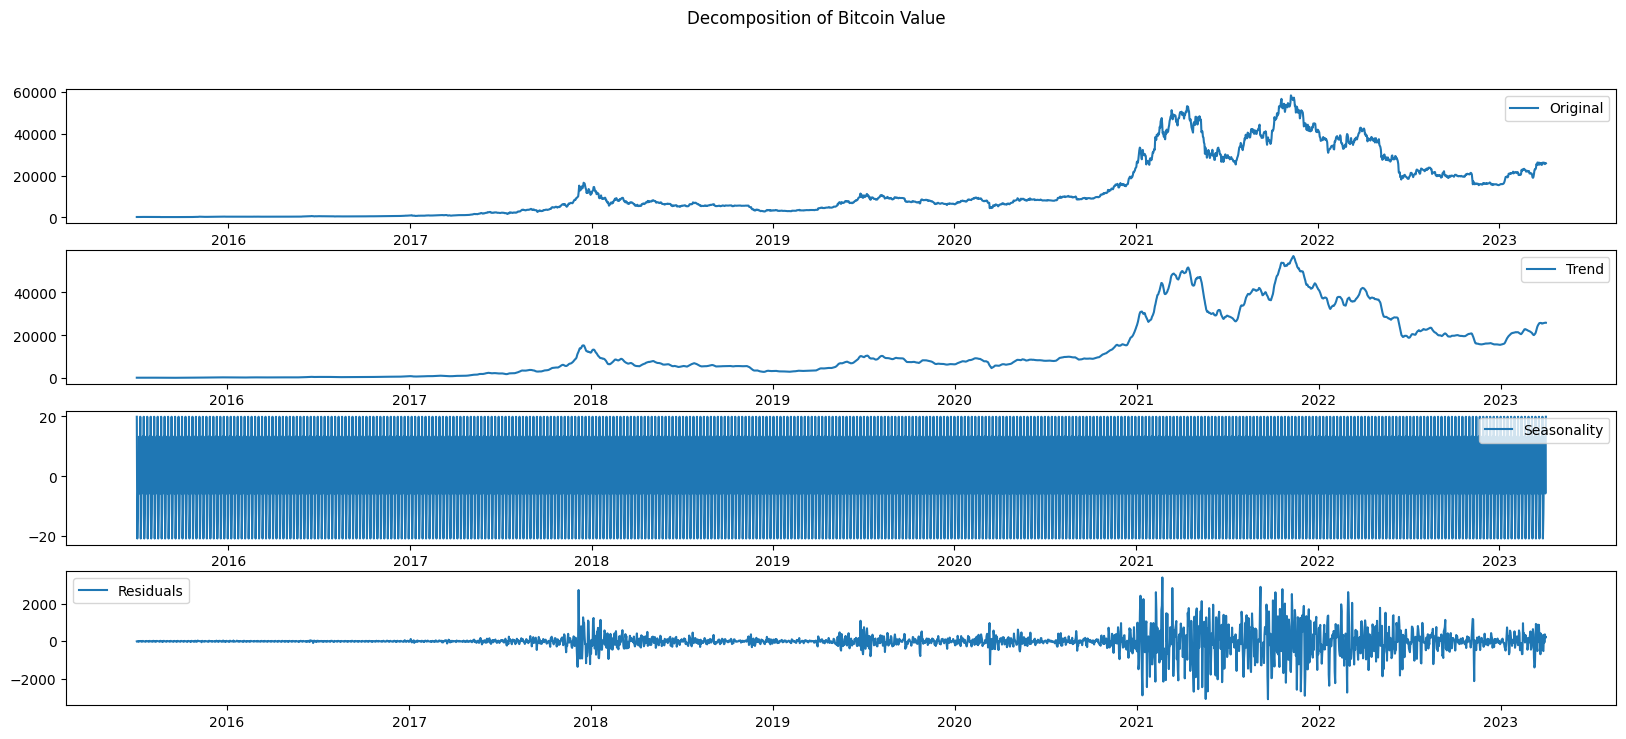

In [115]:
fig = plt.figure(figsize=(20,8))

plt.subplot(411)
plt.plot(df_daily.BTC, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')

fig.suptitle('Decomposition of Bitcoin Value')
plt.show()

In [118]:
from statsmodels.tsa.stattools import adfuller

In [119]:
def test_stationarity(column):
    result = adfuller(column)
    p_value = result[1]

    if p_value < 0.05:
        print("The time series is stationary.")
    else:
        print("The time series is non-stationary.")

In [120]:
test_stationarity(df_daily.BTC)

The time series is non-stationary.


In [121]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot

In [122]:
pyplot.figure(figsize=(20,8))
pyplot.subplot(211)
plot_acf(df_daily.BTC, ax=pyplot.gca(),lags=40)
pyplot.subplot(212)
plot_pacf(df_daily.BTC, ax=pyplot.gca(), lags=50)
pyplot.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


In [132]:
X_train_TS_v1 = df_daily.iloc[:2817]
X_test_TS_v1 = df_daily.iloc[-30:]

In [123]:
import itertools

In [146]:
Qs = range(0, 5)
qs = range(0, 5)
Ps = range(0, 6)
ps = range(0, 6)
D = 1
d = 1
parameters = list(itertools.product(ps, qs, Ps, Qs))

results = []
best_aic = float("inf")
warnings.filterwarnings('ignore')

for param in parameters:
  try:
    model_arima = sm.tsa.ARIMA(X_train_TS_v1.BTC, order=(param[0], d, param[1]), enforce_stationarity=False,
                            enforce_invertibility=False).fit()
  except ValueError:
    continue

  aic = model_arima.aic

  if aic < best_aic:
    best_model = model_arima
    best_aic = aic
    best_param = param

  results.append([param, model_arima.aic])

In [147]:
predicted_values = best_model.predict(start=len(X_train_TS_v1), end=len(X_train_TS_v1) + len(X_test_TS_v1) - 1)

In [148]:
mae = mean_absolute_error(X_test_TS_v1['BTC'], predicted_values)
mse = mean_squared_error(X_test_TS_v1['BTC'], predicted_values)

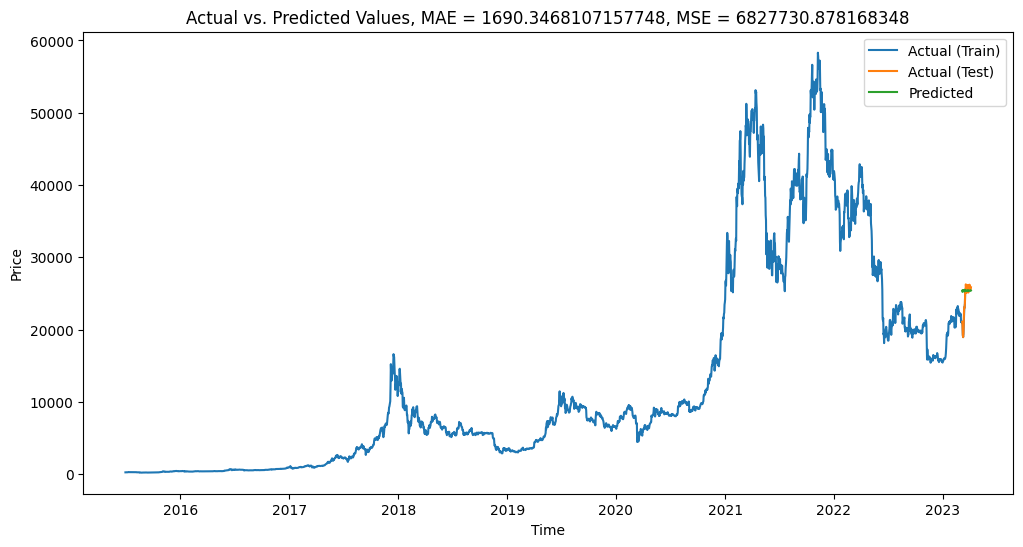

In [149]:
plt.figure(figsize=(12, 6))
plt.plot(X_train_TS_v1['BTC'], label='Actual (Train)')
plt.plot(X_test_TS_v1.index, X_test_TS_v1['BTC'], label='Actual (Test)')
plt.plot(X_test_TS_v1.index, predicted_values, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Price')
plt.title(f'Actual vs. Predicted Values, MAE = {mae}, MSE = {mse}')
plt.legend()
plt.show()

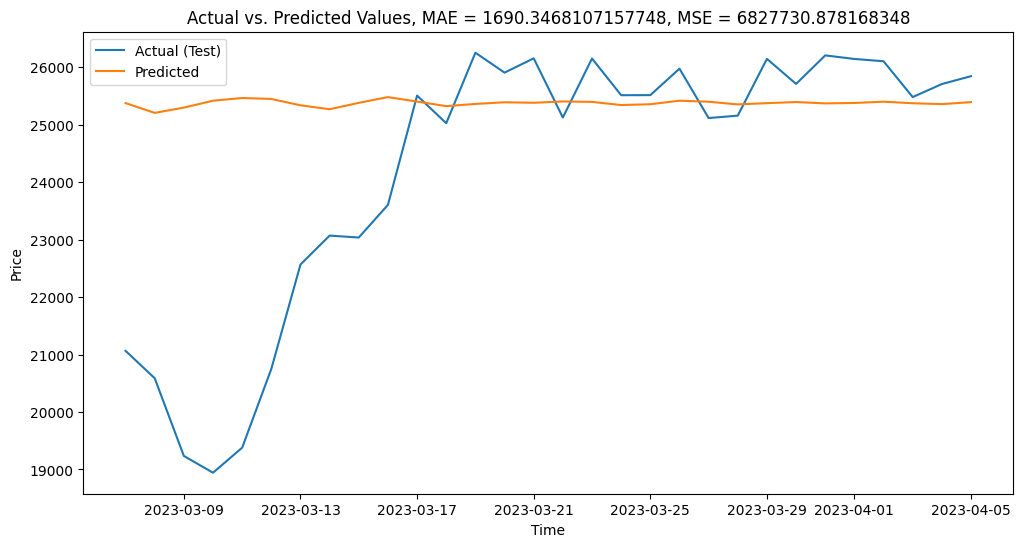

In [150]:
plt.figure(figsize=(12, 6))
plt.plot(X_test_TS_v1.index, X_test_TS_v1['BTC'], label='Actual (Test)')
plt.plot(X_test_TS_v1.index, predicted_values, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Price')
plt.title(f'Actual vs. Predicted Values, MAE = {mae}, MSE = {mse}')
plt.legend()
plt.show()

In [151]:
result_table = pd.DataFrame(results)
result_table.columns = ['parameters', 'aic']
print(result_table.sort_values(by = 'aic', ascending=True).head())
print(best_model.summary())

       parameters           aic
899  (5, 4, 5, 4)  44844.501541
898  (5, 4, 5, 3)  44844.501541
870  (5, 4, 0, 0)  44844.501541
871  (5, 4, 0, 1)  44844.501541
872  (5, 4, 0, 2)  44844.501541
                               SARIMAX Results                                
Dep. Variable:                    BTC   No. Observations:                 2817
Model:                 ARIMA(5, 1, 4)   Log Likelihood              -22412.251
Date:                Sun, 09 Jul 2023   AIC                          44844.502
Time:                        19:25:43   BIC                          44903.914
Sample:                    07-01-2015   HQIC                         44865.943
                         - 03-17-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1

In [152]:
display(f'MAE = {mae}', f'MSE = {mse}')

'MAE = 1690.3468107157748'

'MSE = 6827730.878168348'